#### AutoEncoders Results
#### AE-VAE-VQVAE-VQVAE2
#### Dataset: MNIST | INET100 | Kolmogorov

In [1]:
# Connect Google Drive
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/Colab Notebooks/Colab Notebooks/autoencoders

%pwd

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/.shortcut-targets-by-id/1UMow24kXYpDLYgShcir7-CB3ZYQsgEih/Colab Notebooks/autoencoders


'/content/gdrive/.shortcut-targets-by-id/1UMow24kXYpDLYgShcir7-CB3ZYQsgEih/Colab Notebooks/autoencoders'

In [ ]:
#Part-1: Mnist Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

BASE_MNIST = Path("./best_models/output_mnist")

MODEL_DIRS_MNIST = {
    "AuE":   BASE_MNIST / "output_mnist_ae",
    "VAE":   BASE_MNIST / "output_mnist_vae",
    "VQVAE": BASE_MNIST / "output_mnist_vqvae",
    "VQVA2": BASE_MNIST / "output_mnist_vqvae2",
}

def load_mnist_metrics():
    dfs = []
    for model_name, mdir in MODEL_DIRS_MNIST.items():
        csv_path = mdir / "metrics_all.csv"
        if not csv_path.exists():
            print(f"WARNING: metrics_all.csv not found for {model_name} at {csv_path}")
            continue
        df = pd.read_csv(csv_path)
        if "model" not in df.columns:
            df["model"] = model_name
        dfs.append(df)
    if not dfs:
        raise RuntimeError("No metrics files found – check paths.")
    metrics = pd.concat(dfs, ignore_index=True)
    return metrics

metrics_mnist = load_mnist_metrics()


# quick check
display(metrics_mnist.head(10))
#display(metrics_mnist.tail(10))
print("\nCounts per model & scenario:")
display(metrics_mnist.groupby(["model", "scenario"])["relL1_mean"].count())

run_name  \
0  aue_b_split_50_tn0.0_vn0.0_ts0.0_fp32_adam_202...   
1  aue_b_split_60_tn0.0_vn0.0_ts0.0_fp32_adam_202...   
2  aue_b_split_70_tn0.0_vn0.0_ts0.0_fp32_adam_202...   
3  aue_c_test_noise_70_tn0.0_vn0.0_ts1.0_fp32_ada...   
4  aue_c_test_noise_70_tn0.0_vn0.0_ts5.0_fp32_ada...   
5  aue_c_test_noise_70_tn0.0_vn0.0_ts10.0_fp32_ad...   
6  aue_d_train_and_test_noise_70_tn1.0_vn0.0_ts1....   
7  aue_d_train_and_test_noise_70_tn5.0_vn0.0_ts5....   
8  aue_d_train_and_test_noise_70_tn10.0_vn0.0_ts1...   
9  aue_b_split_50_tn0.0_vn0.0_ts0.0_fp32_soap_202...   

                                            run_path model  \
0  /home/krajnish/autoencoders/output_mnist_ae/au...   AuE   
1  /home/krajnish/autoencoders/output_mnist_ae/au...   AuE   
2  /home/krajnish/autoencoders/output_mnist_ae/au...   AuE   
3  /home/krajnish/autoencoders/output_mnist_ae/au...   AuE   
4  /home/krajnish/autoencoders/output_mnist_ae/au...   AuE   
5  /home/krajnish/autoencoders/output_mnist_ae/au...   AuE   
6  /home/krajnish/autoencoders/output_mnist_ae/au...   AuE   
7  /home/krajnish/autoencoders/output_mnist_ae/au...   AuE   
8  /home/krajnish/autoencoders/output_mnist_ae/au...   AuE   
9  /home/krajnish/autoencoders/output_mnist_ae/au...   AuE   

                 scenario sc  train_frac  val_frac  train_noise_pct  \
0                 b_split  b         0.5       0.5              0.0   
1                 b_split  b         0.6       0.4              0.0   
2                 b_split  b         0.7       0.3              0.0   
3            c_test_noise  c         0.7       0.3              0.0   
4            c_test_noise  c         0.7       0.3              0.0   
5            c_test_noise  c         0.7       0.3              0.0   
6  d_train_and_test_noise  d         0.7       0.3              1.0   
7  d_train_and_test_noise  d         0.7       0.3              5.0   
8  d_train_and_test_noise  d         0.7       0.3             10.0   
9                 b_split  b         0.5       0.5              0.0   

   val_noise_pct  test_noise_pct  recon_huber_mean  aux_loss_mean  \
0            0.0             0.0          0.000266            0.0   
1            0.0             0.0          0.000278            0.0   
2            0.0             0.0          0.000275            0.0   
3            0.0             1.0          0.000190            0.0   
4            0.0             5.0          0.000385            0.0   
5            0.0            10.0          0.001050            0.0   
6            0.0             1.0          0.000243            0.0   
7            0.0             5.0          0.000446            0.0   
8            0.0            10.0          0.000801            0.0   
9            0.0             0.0          0.000001            0.0   

   total_loss_mean  relL1_mean  relL2_mean  train_size  val_size  test_size  \
0         0.000266    0.009893    0.022842       30000     30000      10000   
1         0.000278    0.010172    0.023417       36000     24000      10000   
2         0.000275    0.010071    0.023237       42000     18000      10000   
3         0.000190    0.009707    0.019520       42000     18000      10000   
4         0.000385    0.012356    0.028350       42000     18000      10000   
5         0.001050    0.019311    0.047086       42000     18000      10000   
6         0.000243    0.010020    0.021959       42000     18000      10000   
7         0.000446    0.012422    0.030220       42000     18000      10000   
8         0.000801    0.015693    0.040913       42000     18000      10000   
9         0.000001    0.000510    0.001385       30000     30000      10000   

  precision optimizer  
0      fp32      adam  
1      fp32      adam  
2      fp32      adam  
3      fp32      adam  
4      fp32      adam  
5      fp32      adam  
6      fp32      adam  
7      fp32      adam  
8      fp32      adam  
9      fp32      soap


Counts per model & scenario:


model  scenario              
AuE    b_split                   12
       c_test_noise              12
       d_train_and_test_noise    12
VAE    b_split                   12
       c_test_noise              12
       d_train_and_test_noise    12
VQVA2  b_split                   12
       c_test_noise              12
       d_train_and_test_noise    12
VQVAE  b_split                   12
       c_test_noise              12
       d_train_and_test_noise    12
Name: relL1_mean, dtype: int64

In [3]:
MODEL_ORDER = ["AuE", "VAE", "VQVAE", "VQVA2"]
MODEL_COLORS = {
    "AuE":   "tab:blue",
    "VAE":   "tab:orange",
    "VQVAE": "tab:green",
    "VQVA2": "tab:red",
}

def split_metrics_by_model(df):
    """Return a dict: model_name -> DataFrame filtered for that model."""
    return {m: df[df["model"] == m].copy() for m in df["model"].unique()}

metrics_mnist_by_model = split_metrics_by_model(metrics_mnist)

def human_split_label(train_frac):
    """Convert 0.7 -> '70/30' etc."""
    tv = int(round(float(train_frac) * 100))
    return f"{tv}/{100 - tv}"

In [ ]:
#1. Combined scenario analysis by Rel L1 (Models Evaluation)

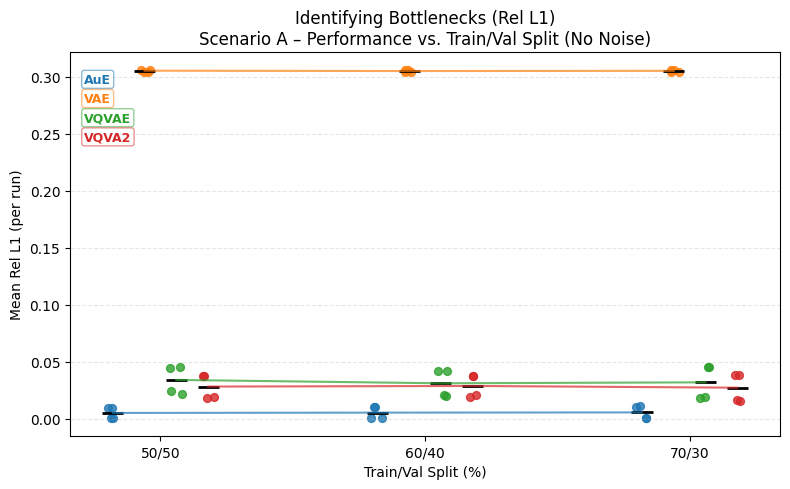

In [4]:
# Scenario A – Rel L1 combined (MNIST)

def plot_scenarioA_relL1_mnist(metrics):
    # Scenario A == 'b_split'
    df = metrics[metrics["scenario"] == "b_split"].copy()
    if df.empty:
        raise ValueError("No rows with scenario == 'b_split' found in metrics_mnist.")

    train_fracs = sorted(df["train_frac"].unique())
    n_splits = len(train_fracs)
    x_centers = np.arange(n_splits)

    offsets = np.linspace(-0.18, 0.18, len(MODEL_ORDER))

    fig, ax = plt.subplots(figsize=(8, 5))

    # For top-left text labels
    label_y_start = 0.92
    label_y_step = 0.05

    for mi, model in enumerate(MODEL_ORDER):
        m_df = df[df["model"] == model]
        if m_df.empty:
            print(f"NOTE: no data for model {model} in scenario b_split – skipping.")
            continue

        color = MODEL_COLORS.get(model, "gray")
        x_line, y_line = [], []

        for si, tf in enumerate(train_fracs):
            sub = m_df[np.isclose(m_df["train_frac"], tf)]
            if sub.empty:
                continue

            x_center = x_centers[si] + offsets[mi]

            # scatter
            xs = x_center + (np.random.rand(len(sub)) - 0.5) * 0.05
            ys = sub["relL1_mean"].values
            ax.scatter(xs, ys,
                       color=color,
                       alpha=0.8, s=32)

            # mean marker
            mean_y = ys.mean()
            ax.hlines(mean_y,
                      x_center - 0.04, x_center + 0.04,
                      colors="k", linewidth=2)

            x_line.append(x_center)
            y_line.append(mean_y)

        # connect means
        if len(x_line) >= 2:
            ax.plot(x_line, y_line,
                    color=color,
                    linewidth=1.5,
                    alpha=0.7)

        # Add top-left label for each model (non-colliding)
        ax.text(
            0.02,                                        # x in axes fraction
            label_y_start - mi * label_y_step,           # y in axes fraction
            model,
            transform=ax.transAxes,
            fontsize=9,
            color=color,
            weight="bold",
            bbox=dict(facecolor="white", edgecolor=color,
                      alpha=0.5, boxstyle="round,pad=0.2")
        )

    # x-ticks
    ax.set_xticks(x_centers)
    ax.set_xticklabels([human_split_label(tf) for tf in train_fracs])

    ax.set_xlabel("Train/Val Split (%)")
    ax.set_ylabel("Mean Rel L1 (per run)")
    ax.set_title("Identifying Bottlenecks (Rel L1)\n"
                 "Scenario A – Performance vs. Train/Val Split (No Noise)")
    ax.grid(True, axis="y", linestyle="--", alpha=0.3)

    plt.tight_layout()
    plt.show()

plot_scenarioA_relL1_mnist(metrics_mnist)

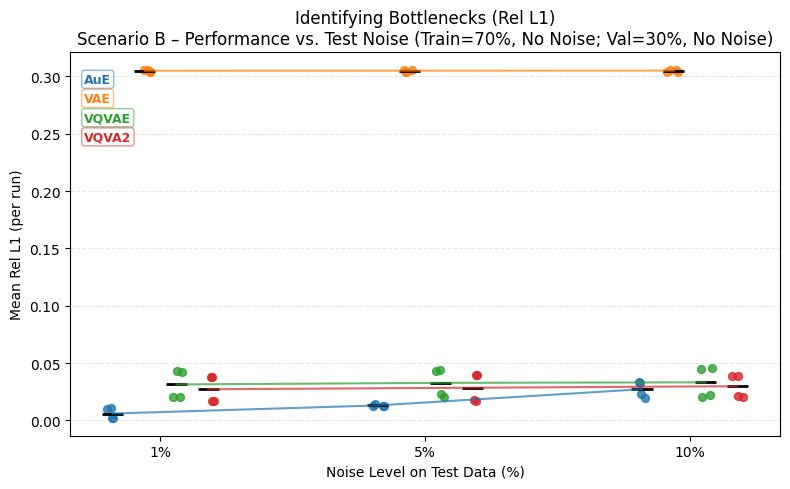

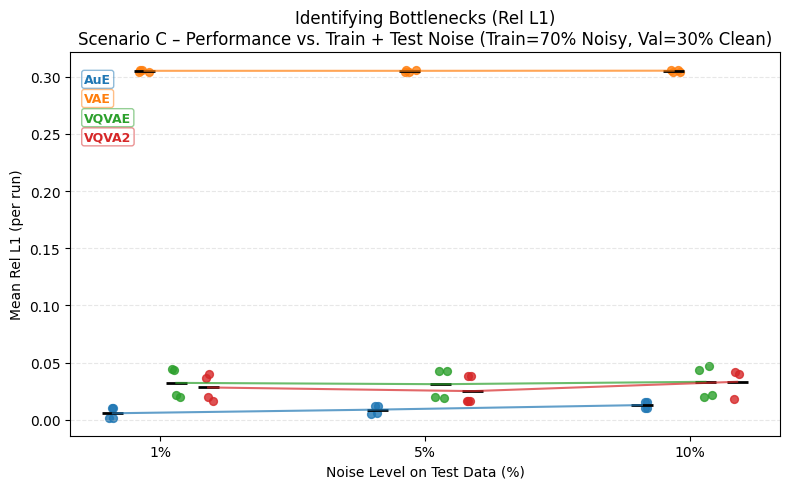

In [5]:
# Scenario B & C – Rel L1 combined (MNIST)

def _plot_noise_scenario_relL1_mnist(metrics, scenario_name, title_suffix):
    """
    Generic helper for noise scenarios (B/C).
    scenario_name: 'c_test_noise' or 'd_train_and_test_noise'
    title_suffix: text describing scenario for the title.
    """
    df = metrics[metrics["scenario"] == scenario_name].copy()
    if df.empty:
        raise ValueError(f"No rows with scenario == '{scenario_name}' found.")

    noise_levels = sorted(df["test_noise_pct"].unique())
    x_centers = np.arange(len(noise_levels))

    offsets = np.linspace(-0.18, 0.18, len(MODEL_ORDER))

    fig, ax = plt.subplots(figsize=(8, 5))

    # Top-left model labels
    label_y_start = 0.92
    label_y_step = 0.05

    for mi, model in enumerate(MODEL_ORDER):
        m_df = df[df["model"] == model]
        if m_df.empty:
            print(f"NOTE: no data for model {model} in scenario {scenario_name} – skipping.")
            continue

        color = MODEL_COLORS.get(model, "gray")
        x_line, y_line = [], []

        for ni, noise in enumerate(noise_levels):
            sub = m_df[np.isclose(m_df["test_noise_pct"], noise)]
            if sub.empty:
                continue

            x_center = x_centers[ni] + offsets[mi]

            xs = x_center + (np.random.rand(len(sub)) - 0.5) * 0.05
            ys = sub["relL1_mean"].values
            ax.scatter(xs, ys,
                       color=color,
                       alpha=0.8, s=32)

            mean_y = ys.mean()
            ax.hlines(mean_y,
                      x_center - 0.04, x_center + 0.04,
                      colors="k", linewidth=2)

            x_line.append(x_center)
            y_line.append(mean_y)

        if len(x_line) >= 2:
            ax.plot(x_line, y_line,
                    color=color,
                    linewidth=1.5,
                    alpha=0.7)

        # Top-left text label per model
        ax.text(
            0.02,
            label_y_start - mi * label_y_step,
            model,
            transform=ax.transAxes,
            fontsize=9,
            color=color,
            weight="bold",
            bbox=dict(facecolor="white", edgecolor=color,
                      alpha=0.5, boxstyle="round,pad=0.2")
        )

    # X-axis: noise %
    ax.set_xticks(x_centers)
    ax.set_xticklabels([f"{int(noise)}%" for noise in noise_levels])

    ax.set_xlabel("Noise Level on Test Data (%)")
    ax.set_ylabel("Mean Rel L1 (per run)")
    ax.set_title(f"Identifying Bottlenecks (Rel L1)\n{title_suffix}")
    ax.grid(True, axis="y", linestyle="--", alpha=0.3)

    plt.tight_layout()
    plt.show()


# Scenario B: test noise only
plot_scenarioB = lambda: _plot_noise_scenario_relL1_mnist(
    metrics_mnist,
    scenario_name="c_test_noise",
    title_suffix="Scenario B – Performance vs. Test Noise (Train=70%, No Noise; Val=30%, No Noise)"
)

# Scenario C: train + test noise
plot_scenarioC = lambda: _plot_noise_scenario_relL1_mnist(
    metrics_mnist,
    scenario_name="d_train_and_test_noise",
    title_suffix="Scenario C – Performance vs. Train + Test Noise (Train=70% Noisy, Val=30% Clean)"
)

plot_scenarioB()
plot_scenarioC()

In [ ]:
#2. Combined scenario analysis by Rel L2 (bottleneck identification)

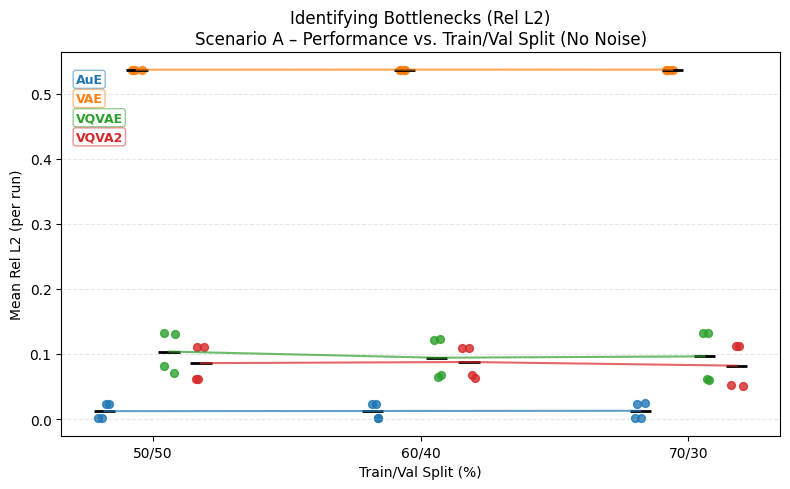

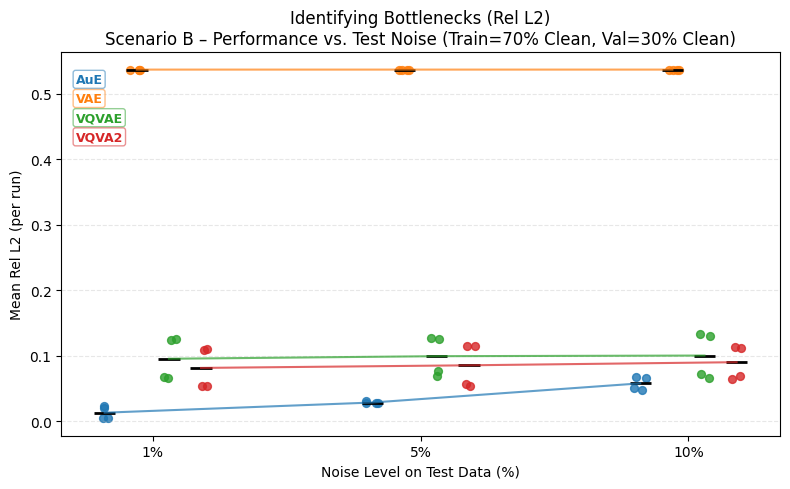

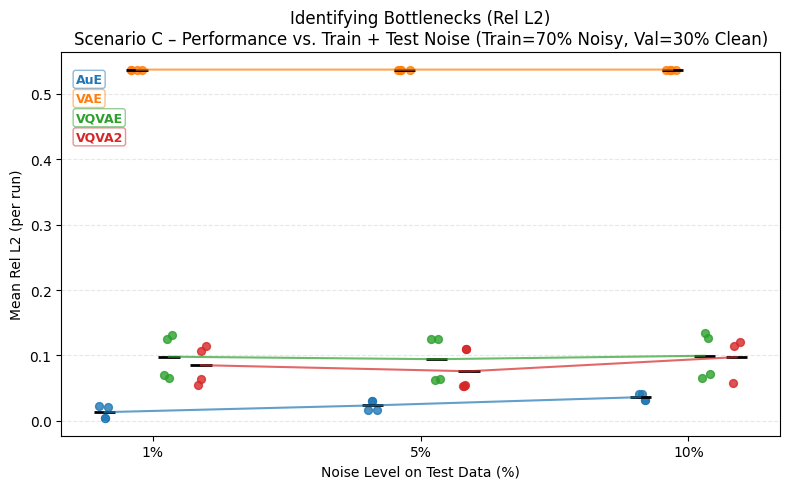

In [6]:
def plot_scenarioA_relL2_mnist(metrics):
    df = metrics[metrics["scenario"] == "b_split"].copy()
    if df.empty:
        raise ValueError("No rows with scenario == 'b_split' found in metrics_mnist.")

    train_fracs = sorted(df["train_frac"].unique())
    n_splits = len(train_fracs)
    x_centers = np.arange(n_splits)

    offsets = np.linspace(-0.18, 0.18, len(MODEL_ORDER))

    fig, ax = plt.subplots(figsize=(8, 5))

    label_y_start = 0.92
    label_y_step = 0.05

    for mi, model in enumerate(MODEL_ORDER):
        m_df = df[df["model"] == model]
        if m_df.empty:
            print(f"NOTE: no data for model {model} in scenario b_split – skipping.")
            continue

        color = MODEL_COLORS.get(model, "gray")
        x_line, y_line = [], []

        for si, tf in enumerate(train_fracs):
            sub = m_df[np.isclose(m_df["train_frac"], tf)]
            if sub.empty:
                continue

            x_center = x_centers[si] + offsets[mi]

            xs = x_center + (np.random.rand(len(sub)) - 0.5) * 0.05
            ys = sub["relL2_mean"].values
            ax.scatter(xs, ys,
                       color=color,
                       alpha=0.8, s=32)

            mean_y = ys.mean()
            ax.hlines(mean_y,
                      x_center - 0.04, x_center + 0.04,
                      colors="k", linewidth=2)

            x_line.append(x_center)
            y_line.append(mean_y)

        if len(x_line) >= 2:
            ax.plot(x_line, y_line,
                    color=color,
                    linewidth=1.5,
                    alpha=0.7)

        ax.text(
            0.02,
            label_y_start - mi * label_y_step,
            model,
            transform=ax.transAxes,
            fontsize=9,
            color=color,
            weight="bold",
            bbox=dict(facecolor="white", edgecolor=color,
                      alpha=0.5, boxstyle="round,pad=0.2")
        )

    ax.set_xticks(x_centers)
    ax.set_xticklabels([human_split_label(tf) for tf in train_fracs])

    ax.set_xlabel("Train/Val Split (%)")
    ax.set_ylabel("Mean Rel L2 (per run)")
    ax.set_title("Identifying Bottlenecks (Rel L2)\n"
                 "Scenario A – Performance vs. Train/Val Split (No Noise)")
    ax.grid(True, axis="y", linestyle="--", alpha=0.3)

    plt.tight_layout()
    plt.show()


def _plot_noise_scenario_relL2_mnist(metrics, scenario_name, title_suffix):
    df = metrics[metrics["scenario"] == scenario_name].copy()
    if df.empty:
        raise ValueError(f"No rows with scenario == '{scenario_name}' found.")

    noise_levels = sorted(df["test_noise_pct"].unique())
    x_centers = np.arange(len(noise_levels))
    offsets = np.linspace(-0.18, 0.18, len(MODEL_ORDER))

    fig, ax = plt.subplots(figsize=(8, 5))

    label_y_start = 0.92
    label_y_step = 0.05

    for mi, model in enumerate(MODEL_ORDER):
        m_df = df[df["model"] == model]
        if m_df.empty:
            print(f"NOTE: no data for model {model} in scenario {scenario_name} – skipping.")
            continue

        color = MODEL_COLORS.get(model, "gray")
        x_line, y_line = [], []

        for ni, noise in enumerate(noise_levels):
            sub = m_df[np.isclose(m_df["test_noise_pct"], noise)]
            if sub.empty:
                continue

            x_center = x_centers[ni] + offsets[mi]

            xs = x_center + (np.random.rand(len(sub)) - 0.5) * 0.05
            ys = sub["relL2_mean"].values
            ax.scatter(xs, ys,
                       color=color,
                       alpha=0.8, s=32)

            mean_y = ys.mean()
            ax.hlines(mean_y,
                      x_center - 0.04, x_center + 0.04,
                      colors="k", linewidth=2)

            x_line.append(x_center)
            y_line.append(mean_y)

        if len(x_line) >= 2:
            ax.plot(x_line, y_line,
                    color=color,
                    linewidth=1.5,
                    alpha=0.7)

        ax.text(
            0.02,
            label_y_start - mi * label_y_step,
            model,
            transform=ax.transAxes,
            fontsize=9,
            color=color,
            weight="bold",
            bbox=dict(facecolor="white", edgecolor=color,
                      alpha=0.5, boxstyle="round,pad=0.2")
        )

    ax.set_xticks(x_centers)
    ax.set_xticklabels([f"{int(noise)}%" for noise in noise_levels])

    ax.set_xlabel("Noise Level on Test Data (%)")
    ax.set_ylabel("Mean Rel L2 (per run)")
    ax.set_title(f"Identifying Bottlenecks (Rel L2)\n{title_suffix}")
    ax.grid(True, axis="y", linestyle="--", alpha=0.3)

    plt.tight_layout()
    plt.show()


def plot_scenarioB_relL2_mnist():
    _plot_noise_scenario_relL2_mnist(
        metrics_mnist,
        scenario_name="c_test_noise",
        title_suffix="Scenario B – Performance vs. Test Noise (Train=70% Clean, Val=30% Clean)"
    )

def plot_scenarioC_relL2_mnist():
    _plot_noise_scenario_relL2_mnist(
        metrics_mnist,
        scenario_name="d_train_and_test_noise",
        title_suffix="Scenario C – Performance vs. Train + Test Noise (Train=70% Noisy, Val=30% Clean)"
    )

plot_scenarioA_relL2_mnist(metrics_mnist)
plot_scenarioB_relL2_mnist()
plot_scenarioC_relL2_mnist()

In [9]:
# Combined scenario analysis by Rel L1/L2 (Tabular Data)

import pandas as pd

def make_compact_table(metrics):
    scenario_specs = [
        dict(
            scenario="b_split",
            x_col="train_frac",
            data="train_frac",
            label_func=human_split_label
        ),
        dict(
            scenario="c_test_noise",
            x_col="test_noise_pct",
            data="test_noise_pct",
            label_func=lambda v: f"{int(v)}%"
        ),
        dict(
            scenario="d_train_and_test_noise",
            x_col="test_noise_pct",
            data="test_noise_pct",
            label_func=lambda v: f"{int(v)}%"
        ),
    ]

    rows = []

    for spec in scenario_specs:
        sc = spec["scenario"]
        df = metrics[metrics["scenario"] == sc].copy()
        if df.empty:
            continue

        agg = (
            df.groupby(["model", spec["x_col"]])
              .agg(
                  relL1mean=("relL1_mean", "mean"),
                  relL2mean=("relL2_mean", "mean"),
              )
              .reset_index()
        )

        agg["scenario"] = sc
        agg["data"] = spec["data"]
        agg["distribution"] = agg[spec["x_col"]].apply(spec["label_func"])

        rows.append(
            agg[[
                "scenario",
                "model",
                "data",
                "distribution",
                "relL1mean",
                "relL2mean"
            ]]
        )

    out = pd.concat(rows, ignore_index=True)

    # Optional ordering
    if "MODEL_ORDER" in globals():
        out["model"] = pd.Categorical(out["model"], categories=MODEL_ORDER, ordered=True)

    scenario_order = ["b_split", "c_test_noise", "d_train_and_test_noise"]
    out["scenario"] = pd.Categorical(out["scenario"], categories=scenario_order, ordered=True)

    out = out.sort_values(
        ["scenario", "model", "distribution"]
    ).reset_index(drop=True)

    return out


compact_table = make_compact_table(metrics_mnist)
display(compact_table)



scenario  model            data distribution  relL1mean  \
0                  b_split    AuE      train_frac        50/50   0.005133   
1                  b_split    AuE      train_frac        60/40   0.005401   
2                  b_split    AuE      train_frac        70/30   0.005591   
3                  b_split    VAE      train_frac        50/50   0.305240   
4                  b_split    VAE      train_frac        60/40   0.304933   
5                  b_split    VAE      train_frac        70/30   0.305106   
6                  b_split  VQVAE      train_frac        50/50   0.034085   
7                  b_split  VQVAE      train_frac        60/40   0.031124   
8                  b_split  VQVAE      train_frac        70/30   0.031975   
9                  b_split  VQVA2      train_frac        50/50   0.028242   
10                 b_split  VQVA2      train_frac        60/40   0.028787   
11                 b_split  VQVA2      train_frac        70/30   0.027276   
12            c_test_noise    AuE  test_noise_pct           1%   0.005946   
13            c_test_noise    AuE  test_noise_pct          10%   0.027151   
14            c_test_noise    AuE  test_noise_pct           5%   0.013001   
15            c_test_noise    VAE  test_noise_pct           1%   0.305028   
16            c_test_noise    VAE  test_noise_pct          10%   0.305140   
17            c_test_noise    VAE  test_noise_pct           5%   0.305076   
18            c_test_noise  VQVAE  test_noise_pct           1%   0.031323   
19            c_test_noise  VQVAE  test_noise_pct          10%   0.033164   
20            c_test_noise  VQVAE  test_noise_pct           5%   0.032702   
21            c_test_noise  VQVA2  test_noise_pct           1%   0.027108   
22            c_test_noise  VQVA2  test_noise_pct          10%   0.029749   
23            c_test_noise  VQVA2  test_noise_pct           5%   0.028451   
24  d_train_and_test_noise    AuE  test_noise_pct           1%   0.005746   
25  d_train_and_test_noise    AuE  test_noise_pct          10%   0.012913   
26  d_train_and_test_noise    AuE  test_noise_pct           5%   0.008948   
27  d_train_and_test_noise    VAE  test_noise_pct           1%   0.305087   
28  d_train_and_test_noise    VAE  test_noise_pct          10%   0.305185   
29  d_train_and_test_noise    VAE  test_noise_pct           5%   0.305071   
30  d_train_and_test_noise  VQVAE  test_noise_pct           1%   0.032315   
31  d_train_and_test_noise  VQVAE  test_noise_pct          10%   0.033249   
32  d_train_and_test_noise  VQVAE  test_noise_pct           5%   0.031171   
33  d_train_and_test_noise  VQVA2  test_noise_pct           1%   0.028318   
34  d_train_and_test_noise  VQVA2  test_noise_pct          10%   0.033276   
35  d_train_and_test_noise  VQVA2  test_noise_pct           5%   0.025111   

    relL2mean  
0    0.012184  
1    0.012405  
2    0.012709  
3    0.536697  
4    0.536833  
5    0.536781  
6    0.103709  
7    0.094222  
8    0.096324  
9    0.085927  
10   0.087639  
11   0.082026  
12   0.013103  
13   0.057894  
14   0.028626  
15   0.536783  
16   0.536786  
17   0.536782  
18   0.095427  
19   0.100311  
20   0.099349  
21   0.081445  
22   0.090199  
23   0.085429  
24   0.013379  
25   0.036302  
26   0.023692  
27   0.536782  
28   0.536780  
29   0.536782  
30   0.098111  
31   0.099556  
32   0.094299  
33   0.085176  
34   0.097487  
35   0.075887

In [7]:
# Best run lookup per model (MNIST)

def get_best_run_row_per_model(metrics, metric_col="total_loss_mean"):
    """
    Returns a dict: model_name -> best-row (as Series),
    where 'best' means minimal metric_col over all runs for that model.
    """
    best_rows = {}
    for model in MODEL_ORDER:
        sub = metrics[metrics["model"] == model]
        if sub.empty:
            print(f"WARNING: no runs found for model {model}")
            continue
        idx = sub[metric_col].idxmin()
        best_rows[model] = sub.loc[idx]
    return best_rows

best_rows_mnist = get_best_run_row_per_model(metrics_mnist)
best_rows_mnist

{'AuE': run_name            aue_b_split_70_tn0.0_vn0.0_ts0.0_fp32_soap_202...
 run_path            /home/krajnish/autoencoders/output_mnist_ae/au...
 model                                                             AuE
 scenario                                                      b_split
 sc                                                                  b
 train_frac                                                        0.7
 val_frac                                                          0.3
 train_noise_pct                                                   0.0
 val_noise_pct                                                     0.0
 test_noise_pct                                                    0.0
 recon_huber_mean                                             0.000001
 aux_loss_mean                                                     0.0
 total_loss_mean                                              0.000001
 relL1_mean                                                    0.00044

In [ ]:
#3. Impact of Optimizer (Adam vs SOAP)

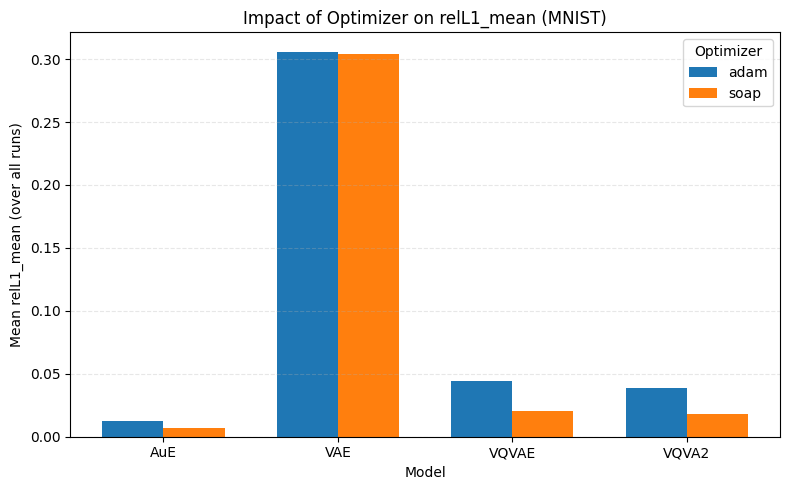

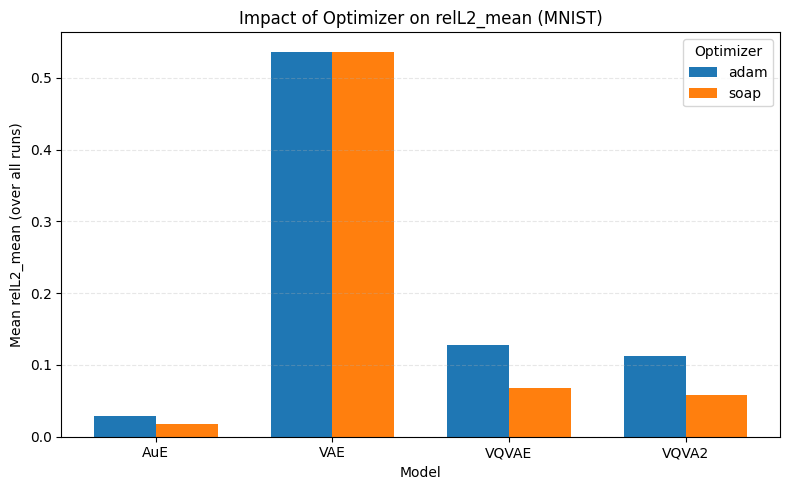

In [10]:
def plot_optimizer_impact_mnist(metrics, metric_col="relL1_mean"):
    """
    Bar chart: mean metric_col per (model, optimizer).
    """
    df = metrics.copy()
    pivot = df.groupby(["model", "optimizer"])[metric_col].mean().unstack()
    pivot = pivot.loc[MODEL_ORDER]

    fig, ax = plt.subplots(figsize=(8, 5))

    x = np.arange(len(pivot.index))
    width = 0.35

    opt_names = list(pivot.columns)
    for i, opt in enumerate(opt_names):
        vals = pivot[opt].values
        ax.bar(x + (i - (len(opt_names)-1)/2)*width,
               vals,
               width=width,
               label=opt)

    ax.set_xticks(x)
    ax.set_xticklabels(pivot.index)
    ax.set_xlabel("Model")
    ax.set_ylabel(f"Mean {metric_col} (over all runs)")
    ax.set_title(f"Impact of Optimizer on {metric_col} (MNIST)")
    ax.grid(True, axis="y", linestyle="--", alpha=0.3)
    ax.legend(title="Optimizer")

    plt.tight_layout()
    plt.show()

# Rel L1
plot_optimizer_impact_mnist(metrics_mnist, metric_col="relL1_mean")

# Rel L2
plot_optimizer_impact_mnist(metrics_mnist, metric_col="relL2_mean")

In [11]:
# Optimizer summary table
def make_optimizer_table(metrics):
    tbl = (
        metrics
        .groupby(["model", "optimizer"])
        .agg(
            relL1mean=("relL1_mean", "mean"),
            relL2mean=("relL2_mean", "mean"),
        )
        .reset_index()
    )

    if "MODEL_ORDER" in globals():
        tbl["model"] = pd.Categorical(
            tbl["model"], categories=MODEL_ORDER, ordered=True
        )

    tbl = tbl.sort_values(["model", "optimizer"]).reset_index(drop=True)
    return tbl


optimizer_table = make_optimizer_table(metrics_mnist)
display(optimizer_table)

model optimizer  relL1mean  relL2mean
0    AuE      adam   0.012659   0.029396
1    AuE      soap   0.007303   0.017336
2    VAE      adam   0.305941   0.536809
3    VAE      soap   0.304251   0.536748
4  VQVAE      adam   0.044047   0.127947
5  VQVAE      soap   0.020643   0.067899
6  VQVA2      adam   0.038651   0.111996
7  VQVA2      soap   0.017855   0.058185

In [ ]:
#5.  Impact of Precision (fp32 vs fp64)

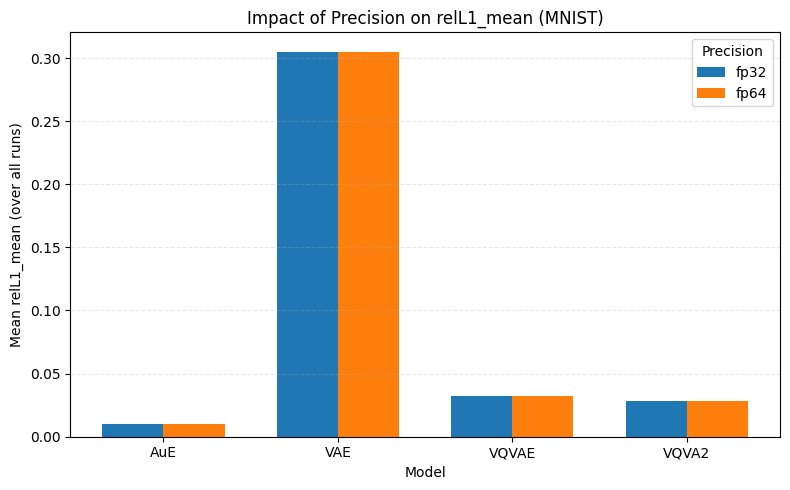

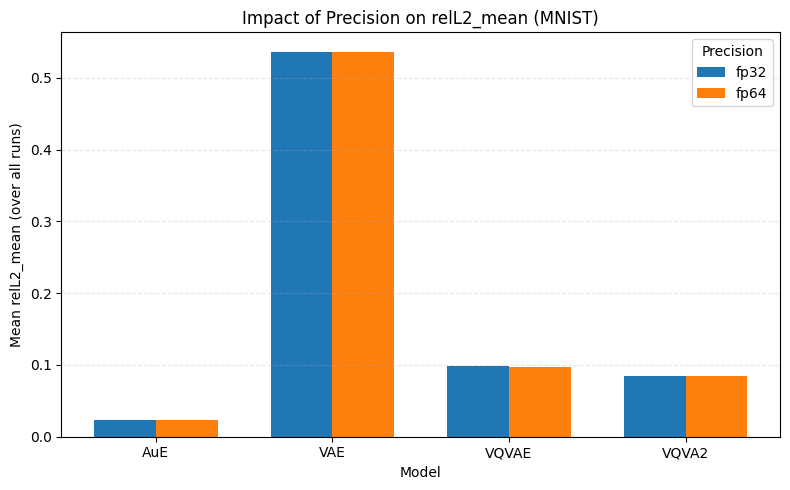

In [12]:
def plot_precision_impact_mnist(metrics, metric_col="relL1_mean"):
    df = metrics.copy()
    pivot = df.groupby(["model", "precision"])[metric_col].mean().unstack()
    pivot = pivot.loc[MODEL_ORDER]

    fig, ax = plt.subplots(figsize=(8, 5))

    x = np.arange(len(pivot.index))
    width = 0.35

    prec_names = list(pivot.columns)
    for i, prec in enumerate(prec_names):
        vals = pivot[prec].values
        ax.bar(x + (i - (len(prec_names)-1)/2)*width,
               vals,
               width=width,
               label=prec)

    ax.set_xticks(x)
    ax.set_xticklabels(pivot.index)
    ax.set_xlabel("Model")
    ax.set_ylabel(f"Mean {metric_col} (over all runs)")
    ax.set_title(f"Impact of Precision on {metric_col} (MNIST)")
    ax.grid(True, axis="y", linestyle="--", alpha=0.3)
    ax.legend(title="Precision")

    plt.tight_layout()
    plt.show()

# Rel L1
plot_precision_impact_mnist(metrics_mnist, metric_col="relL1_mean")

# Rel L2
plot_precision_impact_mnist(metrics_mnist, metric_col="relL2_mean")

In [13]:
# Precision summary table
def make_precision_table(metrics):
    tbl = (
        metrics
        .groupby(["model", "precision"])
        .agg(
            relL1mean=("relL1_mean", "mean"),
            relL2mean=("relL2_mean", "mean"),
        )
        .reset_index()
    )

    if "MODEL_ORDER" in globals():
        tbl["model"] = pd.Categorical(
            tbl["model"], categories=MODEL_ORDER, ordered=True
        )

    tbl = tbl.sort_values(["model", "precision"]).reset_index(drop=True)
    return tbl


precision_table = make_precision_table(metrics_mnist)
display(precision_table)

model precision  relL1mean  relL2mean
0    AuE      fp32   0.009746   0.022954
1    AuE      fp64   0.010216   0.023777
2    VAE      fp32   0.305107   0.536778
3    VAE      fp64   0.305086   0.536778
4  VQVAE      fp32   0.032499   0.098426
5  VQVAE      fp64   0.032191   0.097420
6  VQVA2      fp32   0.028193   0.084953
7  VQVA2      fp64   0.028312   0.085228

In [ ]:
#6. Overall model comparison: best / average / worst

relL1_min  relL1_mean  relL1_max  relL2_min  relL2_mean  relL2_max
model                                                                    
AuE     0.000440    0.009981   0.033116   0.001197    0.023366   0.067131
VAE     0.303955    0.305096   0.306218   0.536668    0.536778   0.536883
VQVAE   0.018037    0.032345   0.046831   0.059330    0.097923   0.134827
VQVA2   0.015461    0.028253   0.041668   0.050403    0.085091   0.120134

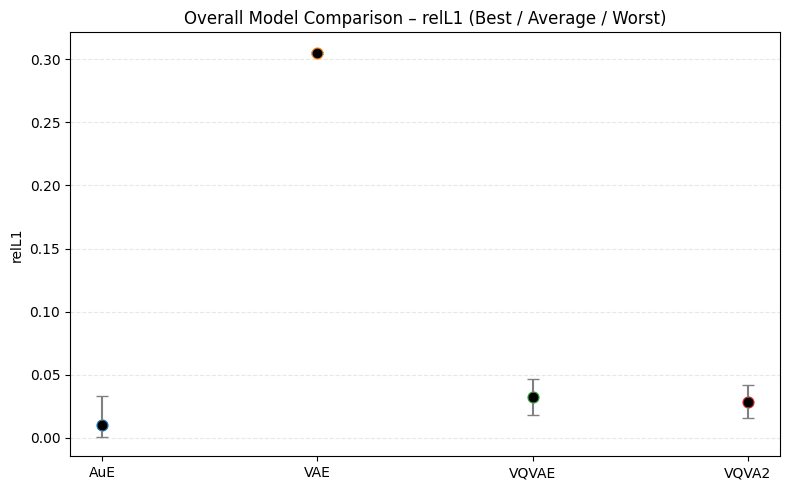

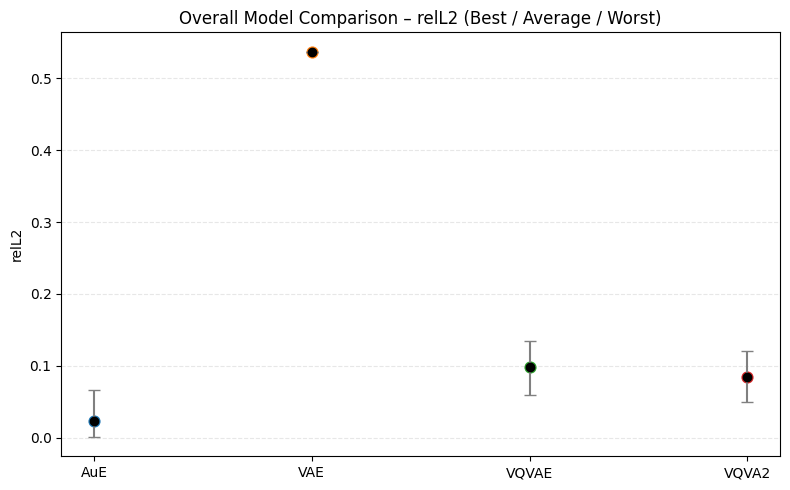

In [14]:
def summarize_models_mnist(metrics):
    rows = []
    for model in MODEL_ORDER:
        sub = metrics[metrics["model"] == model]
        if sub.empty:
            continue
        rows.append({
            "model": model,
            "relL1_min": sub["relL1_mean"].min(),
            "relL1_mean": sub["relL1_mean"].mean(),
            "relL1_max": sub["relL1_mean"].max(),
            "relL2_min": sub["relL2_mean"].min(),
            "relL2_mean": sub["relL2_mean"].mean(),
            "relL2_max": sub["relL2_mean"].max(),
        })
    return pd.DataFrame(rows).set_index("model").loc[MODEL_ORDER]

summary_mnist = summarize_models_mnist(metrics_mnist)
display(summary_mnist)

def plot_overall_model_summary(summary_df, metric="relL1"):
    """
    Summary errorbar chart: mean +/- (min, max) for each model.
    metric: 'relL1' or 'relL2'
    """
    min_col = f"{metric}_min"
    mean_col = f"{metric}_mean"
    max_col = f"{metric}_max"

    df = summary_df.copy()
    means = df[mean_col].values
    mins = df[min_col].values
    maxs = df[max_col].values

    x = np.arange(len(df.index))

    lower_err = means - mins
    upper_err = maxs - means
    yerr = np.vstack([lower_err, upper_err])

    fig, ax = plt.subplots(figsize=(8, 5))
    ax.errorbar(x, means, yerr=yerr,
                fmt="o", ecolor="gray", capsize=4,
                linestyle="none", color="k")

    for i, model in enumerate(df.index):
        ax.scatter(x[i], means[i], color=MODEL_COLORS.get(model, "gray"), s=60)

    ax.set_xticks(x)
    ax.set_xticklabels(df.index)
    ax.set_ylabel(metric)
    ax.set_title(f"Overall Model Comparison – {metric} (Best / Average / Worst)")
    ax.grid(True, axis="y", linestyle="--", alpha=0.3)

    plt.tight_layout()
    plt.show()

# Rel L1 summary
plot_overall_model_summary(summary_mnist, metric="relL1")

# Rel L2 summary
plot_overall_model_summary(summary_mnist, metric="relL2")

In [ ]:
#7. Reconstruction plot

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import struct, gzip
from pathlib import Path
import matplotlib.pyplot as plt

MNIST_ROOT = Path("./datasets/mnist")
BASE_MNIST_OUT = Path("./best_models/output_mnist")

MODEL_DIRS_MNIST = {
    "AuE":   BASE_MNIST_OUT / "output_mnist_ae",
    "VAE":   BASE_MNIST_OUT / "output_mnist_vae",
    "VQVAE": BASE_MNIST_OUT / "output_mnist_vqvae",
    "VQVA2": BASE_MNIST_OUT / "output_mnist_vqvae2",
}

BEST_MODEL_FILES = {
    "AuE":   "best_overall_AuE.pt",
    "VAE":   "best_overall_VAE.pt",
    "VQVAE": "best_overall_VQVAE.pt",
    "VQVA2": "best_overall_VQVA2.pt",
}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

def _open_idx(path: Path):
    return gzip.open(path, "rb") if path.suffix == ".gz" else open(path, "rb")

def parse_idx_images(path: Path):
    with _open_idx(path) as f:
        header = f.read(16)
        if len(header) != 16:
            raise RuntimeError("Malformed IDX header")
        magic, num, rows, cols = struct.unpack(">IIII", header)
        if magic != 2051:
            raise RuntimeError(f"Bad magic {magic}")
        data = np.frombuffer(f.read(), dtype=np.uint8)
    return data.reshape(num, rows, cols)

def find_idx_in_dir(dir_path: Path, candidates):
    for fn in candidates:
        p = dir_path / fn
        if p.exists():
            return p
    for p in dir_path.rglob("*"):
        if p.is_file() and p.name in candidates:
            return p
    return None

test_idx = find_idx_in_dir(
    MNIST_ROOT / "test",
    ["t10k-images.idx3-ubyte", "t10k-images-idx3-ubyte.gz"]
)
if test_idx is None:
    raise RuntimeError("Could not find MNIST test IDX in mnist/test")

TEST_FULL = parse_idx_images(test_idx)  # (10000, 28, 28)
print("Loaded MNIST test:", TEST_FULL.shape)

# ================= ARCHITECTURES =================

class Snake(nn.Module):
    """
    Snake activation: x + (1/a) * sin^2(a x)
    """
    def __init__(self, alpha=1.0):
        super().__init__()
        self.alpha = nn.Parameter(torch.tensor(alpha))

    def forward(self, x):
        a = self.alpha.abs() + 1e-6
        return x + (1.0 / a) * torch.sin(a * x).pow(2)


class EncoderBlock(nn.Module):
    def __init__(self, cin, cout):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(cin, cout, 3, padding=1),
            nn.GroupNorm(num_groups=min(8, cout), num_channels=cout), Snake(),
            nn.Conv2d(cout, cout, 3, padding=1),
            nn.GroupNorm(num_groups=min(8, cout), num_channels=cout), Snake(),
        )

    def forward(self, x):
        return self.net(x)


class DecoderBlock(nn.Module):
    def __init__(self, cin, cout):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(cin, cout, 3, padding=1),
            nn.GroupNorm(num_groups=min(8, cout), num_channels=cout), Snake(),
            nn.Conv2d(cout, cout, 3, padding=1),
            nn.GroupNorm(num_groups=min(8, cout), num_channels=cout), Snake(),
        )

    def forward(self, x):
        return self.net(x)


class AuE(nn.Module):
    """Autoencoder with latent 56x7x7."""
    def __init__(self, ch=56):
        super().__init__()
        self.enc = nn.Sequential(
            EncoderBlock(1, 32),
            nn.Conv2d(32, 64, 4, stride=2, padding=1),  # 28->14
            Snake(),
            EncoderBlock(64, 64),
            nn.Conv2d(64, ch, 4, stride=2, padding=1),  # 14->7 -> latent (ch,7,7)
            Snake(),
        )
        self.dec = nn.Sequential(
            DecoderBlock(ch, 128),
            nn.ConvTranspose2d(128, 64, 2, stride=2),   # 7->14
            Snake(),
            DecoderBlock(64, 64),
            nn.ConvTranspose2d(64, 32, 2, stride=2),    # 14->28
            Snake(),
            nn.Conv2d(32, 1, 1),
            nn.Tanh(),
        )

    def forward(self, x):
        z = self.enc(x)
        xhat = self.dec(z)
        return xhat, {"aux_loss": torch.tensor(0.0, device=x.device)}


class VAE(nn.Module):
    """VAE with latent 56x7x7 (Gaussian per latent cell)."""
    def __init__(self, ch=56):
        super().__init__()
        self.enc = nn.Sequential(
            EncoderBlock(1, 32),
            nn.Conv2d(32, 64, 4, stride=2, padding=1),
            Snake(),
            EncoderBlock(64, 64),
            nn.Conv2d(64, 128, 4, stride=2, padding=1),  # → (128,7,7)
            Snake(),
        )
        self.mu = nn.Conv2d(128, ch, 1)
        self.logvar = nn.Conv2d(128, ch, 1)
        self.dec = nn.Sequential(
            DecoderBlock(ch, 128),
            nn.ConvTranspose2d(128, 64, 2, stride=2),
            Snake(),
            DecoderBlock(64, 64),
            nn.ConvTranspose2d(64, 32, 2, stride=2),
            Snake(),
            nn.Conv2d(32, 1, 1),
            nn.Tanh(),
        )

    def reparam(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        h = self.enc(x)
        mu, logvar = self.mu(h), self.logvar(h)
        z = self.reparam(mu, logvar)
        xhat = self.dec(z)
        kl = -0.5 * (1 + logvar - mu.pow(2) - logvar.exp())
        kl = kl.sum(dim=[1, 2, 3]).mean()
        return xhat, {"aux_loss": kl, "mu": mu, "logvar": logvar}


class VectorQuantizer(nn.Module):
    def __init__(self, K, D, beta_commit=0.25):
        super().__init__()
        self.K = K
        self.D = D
        self.beta = beta_commit
        self.codebook = nn.Embedding(K, D)
        nn.init.uniform_(self.codebook.weight, -1.0 / D, 1.0 / D)

    def forward(self, z_e):
        B, D, H, W = z_e.shape
        z = z_e.permute(0, 2, 3, 1).contiguous().view(-1, D)  # (BHW, D)
        e = self.codebook.weight
        dist = (z.pow(2).sum(1, keepdim=True) + e.pow(2).sum(1) - 2 * z @ e.t())
        idx = torch.argmin(dist, dim=1)
        z_q = self.codebook(idx).view(B, H, W, D).permute(0, 3, 1, 2).contiguous()

        codebook_loss = F.mse_loss(z_q.detach(), z_e)
        commit_loss   = self.beta * F.mse_loss(z_q, z_e.detach())
        vq_loss = codebook_loss + commit_loss

        z_q_st = z_e + (z_q - z_e).detach()

        with torch.no_grad():
            one_hot = F.one_hot(idx, num_classes=self.K).float()
            avg_probs = one_hot.mean(0)
            perplexity = torch.exp(-(avg_probs * (avg_probs + 1e-10).log()).sum())
        return z_q_st, vq_loss, perplexity, idx.view(B, H, W)


class VQVAE(nn.Module):
    """VQ-VAE with latent 56x7x7 (codebook dim = 56)."""
    def __init__(self, K=512, D=56, beta_commit=0.25):
        super().__init__()
        self.encoder = nn.Sequential(
            EncoderBlock(1, 32),
            nn.Conv2d(32, 64, 4, stride=2, padding=1),  # 28→14
            Snake(),
            EncoderBlock(64, 64),
            nn.Conv2d(64, D, 4, stride=2, padding=1),   # 14→7 → (D,7,7)
            Snake(),  # activation after encoder
        )
        self.quant = VectorQuantizer(K, D, beta_commit=beta_commit)
        self.decoder = nn.Sequential(
            DecoderBlock(D, 128),
            nn.ConvTranspose2d(128, 64, 2, stride=2),   # 7→14
            Snake(),
            DecoderBlock(64, 64),
            nn.ConvTranspose2d(64, 32, 2, stride=2),    # 14→28
            Snake(),
            nn.Conv2d(32, 1, 1),
            nn.Tanh(),
        )

    def forward(self, x):
        z_e = self.encoder(x)
        z_q, vq_loss, ppl, idx = self.quant(z_e)
        xhat = self.decoder(z_q)
        aux = {
            "aux_loss": vq_loss,
            "vq_loss": vq_loss,
            "perplexity": ppl,
            "indices": idx,
        }
        return xhat, aux


class VQVA2(nn.Module):
    """Two-level VQ-VAE-2."""
    def __init__(self, K=512, D=56, beta_commit=0.25, top_ch=56):
        super().__init__()
        self.enc_bottom = nn.Sequential(
            EncoderBlock(1, 32),
            nn.Conv2d(32, 64, 4, stride=2, padding=1),   # 28→14
            Snake(),
            EncoderBlock(64, 64),
            nn.Conv2d(64, D, 4, stride=2, padding=1),    # 14→7 → (D,7,7)
            Snake(),
        )
        self.enc_top = nn.Sequential(
            nn.Conv2d(D, 128, 3, padding=1),
            Snake(),
            nn.Conv2d(128, top_ch, 4, stride=2, padding=1),  # 7→4
            Snake(),
        )
        self.quant_top = VectorQuantizer(K, top_ch, beta_commit=beta_commit)
        self.bottom_condition = nn.Sequential(
            nn.Conv2d(D + top_ch, D, 1),
            Snake()
        )
        self.quant_bottom = VectorQuantizer(K, D, beta_commit=beta_commit)
        self.dec = nn.Sequential(
            DecoderBlock(D + top_ch, 128),
            nn.ConvTranspose2d(128, 64, 2, stride=2),   # 7→14
            Snake(),
            DecoderBlock(64, 64),
            nn.ConvTranspose2d(64, 32, 2, stride=2),    # 14→28
            Snake(),
            nn.Conv2d(32, 1, 1),
            nn.Tanh(),
        )

    def forward(self, x):
        zb_e = self.enc_bottom(x)                       # (D,7,7)
        zt_e = self.enc_top(zb_e)                       # (top_ch,4,4)
        zt_q, vq_t, ppl_t, idx_t = self.quant_top(zt_e)
        zt_up = F.interpolate(zt_q, size=zb_e.shape[-2:], mode="nearest")
        zb_cond = self.bottom_condition(torch.cat([zb_e, zt_up], dim=1))
        zb_q, vq_b, ppl_b, idx_b = self.quant_bottom(zb_cond)
        dec_in = torch.cat([zb_q, zt_up], dim=1)
        xhat = self.dec(dec_in)
        aux = {
            "aux_loss": vq_t + vq_b,
            "vq_top": vq_t,
            "vq_bottom": vq_b,
            "perplexity_top": ppl_t,
            "perplexity_bottom": ppl_b,
            "indices_top": idx_t,
            "indices_bottom": idx_b
        }
        return xhat, aux


def build_mnist_model(model_name: str):
    if model_name == "AuE":
        return AuE(ch=56)
    if model_name == "VAE":
        return VAE(ch=56)
    if model_name == "VQVAE":
        return VQVAE(K=512, D=56, beta_commit=0.25)
    if model_name == "VQVA2":
        return VQVA2(K=512, D=56, beta_commit=0.25, top_ch=56)
    raise ValueError(f"Unknown model: {model_name}")

loaded_models = {}

for name, model_dir in MODEL_DIRS_MNIST.items():
    best_file = model_dir / BEST_MODEL_FILES[name]
    if not best_file.exists():
        print(f"WARNING: {best_file} not found, skipping {name}")
        continue

    print(f"Loading {name} from {best_file}")
    state = torch.load(best_file, map_location=device)
    m = build_mnist_model(name).to(device)
    m.load_state_dict(state["model"])
    m.eval()
    loaded_models[name] = m

print("Loaded models:", list(loaded_models.keys()))

Device: cuda
Loaded MNIST test: (10000, 28, 28)
Loading AuE from best_models/output_mnist/output_mnist_ae/best_overall_AuE.pt
Loading VAE from best_models/output_mnist/output_mnist_vae/best_overall_VAE.pt
Loading VQVAE from best_models/output_mnist/output_mnist_vqvae/best_overall_VQVAE.pt
Loading VQVA2 from best_models/output_mnist/output_mnist_vqvae2/best_overall_VQVA2.pt
Loaded models: ['AuE', 'VAE', 'VQVAE', 'VQVA2']


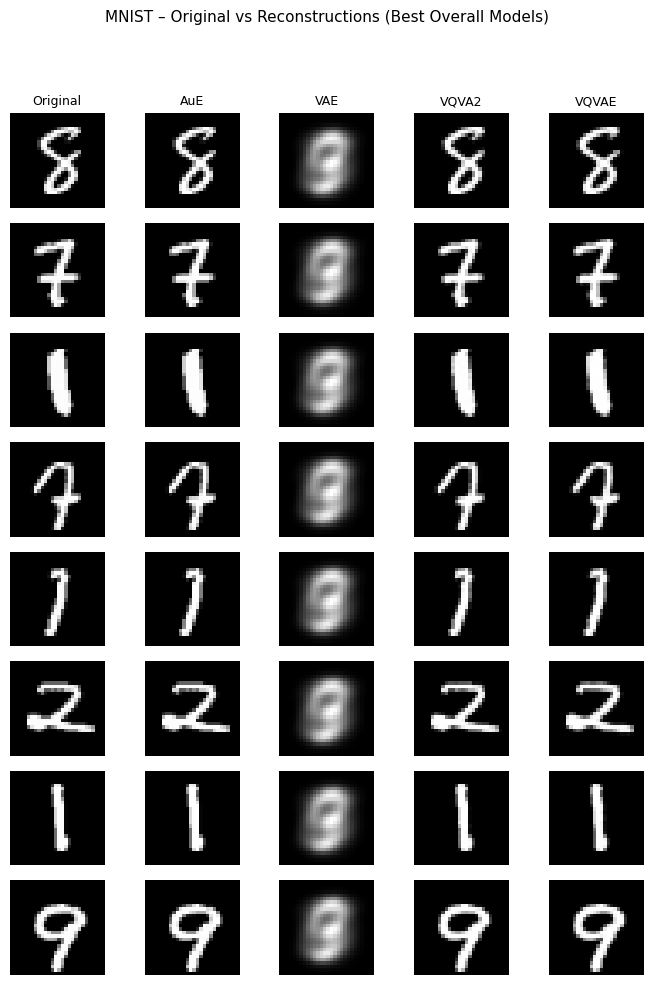

In [13]:
import numpy as np

def mnist_test_batch(indices):
    """
    Get a batch of test images, normalized exactly like training:
    raw [0,255] -> [0,1] -> [-1,1] (since training used Normalize(0.5,0.5)).
    """
    imgs = TEST_FULL[indices]  # (N, 28, 28), uint8
    x = torch.from_numpy(imgs).float() / 255.0     # [0,1]
    x = x.unsqueeze(1)                             # (N,1,28,28)
    x = x * 2.0 - 1.0                              # [-1,1]
    return x.to(device)

def to_display(img_tensor):
    """
    Convert model output [-1,1] to numpy [0,1] for imshow.
    """
    x = img_tensor.detach().cpu().clamp(-1, 1)
    x = 0.5 * (x + 1.0)  # [-1,1] -> [0,1]
    return x.squeeze(0).squeeze(0).numpy()

def visualize_mnist_reconstructions(n_samples=8, seed=0):
    np.random.seed(seed)

    idxs = np.random.choice(TEST_FULL.shape[0], size=n_samples, replace=False)
    x = mnist_test_batch(idxs)

    recons = {}
    with torch.no_grad():
        for name, model in loaded_models.items():
            xhat, _ = model(x)
            recons[name] = xhat

    model_names = sorted(loaded_models.keys())
    n_models = len(model_names)

    fig, axes = plt.subplots(
        n_samples, n_models + 1,
        figsize=(1.4 * (n_models + 1), 1.25 * n_samples)
    )

    if n_samples == 1:
        axes = np.expand_dims(axes, 0)

    for i in range(n_samples):
        # Original
        ax = axes[i, 0]
        orig = TEST_FULL[idxs[i]] / 255.0
        ax.imshow(orig, cmap="gray")
        if i == 0:
            ax.set_title("Original", fontsize=9)
        ax.axis("off")

        # Each model
        for j, name in enumerate(model_names, start=1):
            ax = axes[i, j]
            img = to_display(recons[name][i:i+1])
            ax.imshow(img, cmap="gray")
            if i == 0:
                ax.set_title(name, fontsize=9)
            ax.axis("off")

    plt.suptitle(
        "MNIST – Original vs Reconstructions (Best Overall Models)",
        fontsize=11
    )
    plt.tight_layout(rect=[0, 0, 1, 0.94])
    plt.show()

# Run it
visualize_mnist_reconstructions(n_samples=8, seed=0)

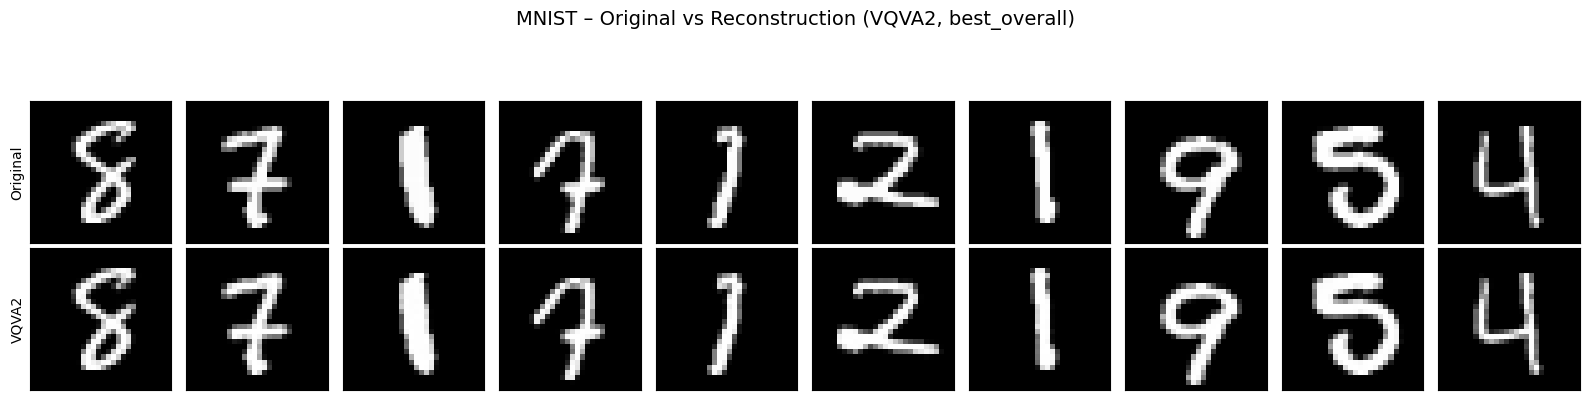

In [14]:
# Reconstruction images with best model (VQVAE2)

def visualize_single_model_mnist(model_name="VQVA2", n_samples=10, seed=0):
    if model_name not in loaded_models:
        raise ValueError(f"Model {model_name} not found in loaded_models: {list(loaded_models.keys())}")

    np.random.seed(seed)
    idxs = np.random.choice(TEST_FULL.shape[0], size=n_samples, replace=False)
    x = mnist_test_batch(idxs)

    model = loaded_models[model_name]
    with torch.no_grad():
        xhat, _ = model(x)

    # Make plot: taller height for clarity
    fig, axes = plt.subplots(
        2, n_samples,
        figsize=(1.6 * n_samples, 4.2)   # ⬅️ more vertical space
    )

    for j in range(n_samples):
        idx = idxs[j]

        # Original
        ax_o = axes[0, j]
        ax_o.imshow(TEST_FULL[idx] / 255.0, cmap="gray")
        if j == 0:
            ax_o.set_ylabel("Original", fontsize=10)
        ax_o.set_xticks([]); ax_o.set_yticks([])

        # Reconstruction
        ax_r = axes[1, j]
        ax_r.imshow(to_display(xhat[j:j+1]), cmap="gray")
        if j == 0:
            ax_r.set_ylabel(model_name, fontsize=10)
        ax_r.set_xticks([]); ax_r.set_yticks([])

    plt.suptitle(
        f"MNIST – Original vs Reconstruction ({model_name}, best_overall)",
        fontsize=14
    )
    plt.tight_layout(rect=[0, 0, 1, 0.92])
    plt.show()

visualize_single_model_mnist("VQVA2", n_samples=10)

In [ ]:
#8. Latent Space Analysis

In [15]:
from pathlib import Path
import numpy as np
import struct, gzip
import torch

# -----------------------------
# MNIST paths
# -----------------------------
mnist_root = Path("./datasets/mnist")
train_dir  = mnist_root / "train"
test_dir   = mnist_root / "test"

print("MNIST root:", mnist_root.resolve())
print("Train dir :", train_dir.resolve())
print("Test dir  :", test_dir.resolve())

def _open_idx(path: Path):
    # handle optional gzip
    return gzip.open(path, "rb") if path.suffix == ".gz" else open(path, "rb")

def parse_idx_images(path: Path):
    with _open_idx(path) as f:
        header = f.read(16)
        if len(header) != 16:
            raise RuntimeError(f"Malformed IDX image header in {path}")
        magic, num, rows, cols = struct.unpack(">IIII", header)
        if magic != 2051:
            raise RuntimeError(f"Bad magic for images in {path} (got {magic}, expected 2051)")
        data = np.frombuffer(f.read(), dtype=np.uint8)
    return data.reshape(num, rows, cols)

def parse_idx_labels(path: Path):
    with _open_idx(path) as f:
        header = f.read(8)
        if len(header) != 8:
            raise RuntimeError(f"Malformed IDX label header in {path}")
        magic, num = struct.unpack(">II", header)
        if magic != 2049:
            raise RuntimeError(f"Bad magic for labels in {path} (got {magic}, expected 2049)")
        data = np.frombuffer(f.read(), dtype=np.uint8)
    return data

def find_idx_in_dir(dir_path: Path, candidates):
    """
    First try direct names in this dir, then search recursively.
    """
    for fn in candidates:
        p = dir_path / fn
        if p.exists():
            return p
    for p in dir_path.rglob("*"):
        if p.is_file() and p.name in candidates:
            return p
    return None

train_img_path = find_idx_in_dir(
    train_dir,
    ["train-images.idx3-ubyte", "train-images-idx3-ubyte", "train-images-idx3-ubyte.gz"],
)
test_img_path = find_idx_in_dir(
    test_dir,
    ["t10k-images.idx3-ubyte", "t10k-images-idx3-ubyte", "t10k-images-idx3-ubyte.gz"],
)

assert train_img_path is not None and test_img_path is not None, (
    "MNIST IDX image files not found.\n"
    f"train_images: {train_img_path}\n"
    f"test_images:  {test_img_path}"
)

print("Found image IDX files:")
print("  train:", train_img_path)
print("  test :", test_img_path)

train_lbl_path = find_idx_in_dir(
    train_dir,
    ["train-labels.idx1-ubyte", "train-labels-idx1-ubyte", "train-labels-idx1-ubyte.gz"],
)
test_lbl_path = find_idx_in_dir(
    test_dir,
    ["t10k-labels.idx1-ubyte", "t10k-labels-idx1-ubyte", "t10k-labels-idx1-ubyte.gz"],
)

if train_lbl_path is None or test_lbl_path is None:
    print("\nWARNING: label IDX files not found. "
          "PCA / reconstruction will work, but classification-based latent tests "
          "(Test1 & Test3) will be skipped unless you add labels.")
else:
    print("Found label IDX files:")
    print("  train:", train_lbl_path)
    print("  test :", test_lbl_path)

TRAIN_IMAGES = parse_idx_images(train_img_path)
TEST_IMAGES  = parse_idx_images(test_img_path)

if train_lbl_path is not None and test_lbl_path is not None:
    TRAIN_LABELS = parse_idx_labels(train_lbl_path)
    TEST_LABELS  = parse_idx_labels(test_lbl_path)
else:
    TRAIN_LABELS = None
    TEST_LABELS  = None

print("\nLoaded MNIST arrays:")
print("  TRAIN_IMAGES:", TRAIN_IMAGES.shape, TRAIN_IMAGES.dtype)
print("  TEST_IMAGES :", TEST_IMAGES.shape, TEST_IMAGES.dtype)
print("  TRAIN_LABELS:", None if TRAIN_LABELS is None else TRAIN_LABELS.shape)
print("  TEST_LABELS :", None if TEST_LABELS is None else TEST_LABELS.shape)

MNIST root: /content/gdrive/.shortcut-targets-by-id/1UMow24kXYpDLYgShcir7-CB3ZYQsgEih/Colab Notebooks/autoencoders/datasets/mnist
Train dir : /content/gdrive/.shortcut-targets-by-id/1UMow24kXYpDLYgShcir7-CB3ZYQsgEih/Colab Notebooks/autoencoders/datasets/mnist/train
Test dir  : /content/gdrive/.shortcut-targets-by-id/1UMow24kXYpDLYgShcir7-CB3ZYQsgEih/Colab Notebooks/autoencoders/datasets/mnist/test
Found image IDX files:
  train: datasets/mnist/train/train-images.idx3-ubyte
  test : datasets/mnist/test/t10k-images.idx3-ubyte
Found label IDX files:
  train: datasets/mnist/train/train-labels.idx1-ubyte
  test : datasets/mnist/test/t10k-labels.idx1-ubyte

Loaded MNIST arrays:
  TRAIN_IMAGES: (60000, 28, 28) uint8
  TEST_IMAGES : (10000, 28, 28) uint8
  TRAIN_LABELS: (60000,)
  TEST_LABELS : (10000,)


In [17]:
import torch
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# ----- labeled image datasets -----

def make_mnist_labeled_loaders(batch_size=256,
                               max_train=None,
                               max_test=None):
    assert TRAIN_LABELS is not None and TEST_LABELS is not None, \
        "Labels not loaded – re-run the MNIST loader cell."

    Xtr = TRAIN_IMAGES
    Ytr = TRAIN_LABELS
    Xte = TEST_IMAGES
    Yte = TEST_LABELS

    if max_train is not None:
        Xtr = Xtr[:max_train]
        Ytr = Ytr[:max_train]
    if max_test is not None:
        Xte = Xte[:max_test]
        Yte = Yte[:max_test]

    def _prep_x(arr):
        x = torch.from_numpy(arr).float().unsqueeze(1) / 255.0
        x = (x - 0.5) / 0.5
        return x

    xtr = _prep_x(Xtr)
    xte = _prep_x(Xte)
    ytr = torch.from_numpy(Ytr).long()
    yte = torch.from_numpy(Yte).long()

    train_ds = TensorDataset(xtr, ytr)
    test_ds  = TensorDataset(xte, yte)

    train_loader = DataLoader(train_ds, batch_size=batch_size,
                              shuffle=True, drop_last=False)
    test_loader  = DataLoader(test_ds,  batch_size=batch_size,
                              shuffle=False, drop_last=False)
    return train_loader, test_loader

@torch.no_grad()
def encode_mnist_batch(model_name, model, xb):
    """Return flattened latent for a batch xb."""
    xb = xb.to(device)

    if model_name == "AuE":
        z = model.enc(xb)

    elif model_name == "VAE":
        h = model.enc(xb)
        mu, logvar = model.mu(h), model.logvar(h)
        z = mu

    elif model_name == "VQVAE":
        z_e = model.encoder(xb)
        z = z_e

    elif model_name == "VQVA2":
        zb_e = model.enc_bottom(xb)
        zt_e = model.enc_top(zb_e)
        zt_q, vq_t, ppl_t, idx_t = model.quant_top(zt_e)
        zt_up = F.interpolate(zt_q, size=zb_e.shape[-2:], mode="nearest")
        zb_cond = model.bottom_condition(torch.cat([zb_e, zt_up], dim=1))
        zb_q, vq_b, ppl_b, idx_b = model.quant_bottom(zb_cond)
        dec_in = torch.cat([zb_q, zt_up], dim=1)
        z = dec_in

    else:
        raise ValueError(f"Unknown model {model_name}")

    return z.detach().view(z.size(0), -1)   # (B, D)

Device: cuda


In [18]:
import torch
import torch.nn as nn
from pathlib import Path

class Snake(nn.Module):
    def __init__(self, alpha=1.0):
        super().__init__()
        self.alpha = nn.Parameter(torch.tensor(alpha, dtype=torch.float32))
    def forward(self, x):
        a = self.alpha.abs() + 1e-6
        return x + (1.0 / a) * torch.sin(a * x).pow(2)

# === AE ===
class AE(nn.Module):
    def __init__(self, latent_ch=56):
        super().__init__()
        self.enc = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1), Snake(),
            nn.Conv2d(32, 64, 4, stride=2, padding=1), Snake(),
            nn.Conv2d(64, latent_ch, 4, stride=2, padding=1), Snake()
        )
        self.dec = nn.Sequential(
            nn.ConvTranspose2d(latent_ch, 64, 2, stride=2), Snake(),
            nn.ConvTranspose2d(64, 32, 2, stride=2), Snake(),
            nn.Conv2d(32, 1, 1), nn.Tanh()
        )

    def forward(self, x):
        z = self.enc(x)
        xhat = self.dec(z)
        return xhat, {"latent": z}

# === VAE ===
class VAE(nn.Module):
    """VAE with latent 56x7x7 (Gaussian per latent cell), matching training-time MNIST VAE."""
    def __init__(self, ch=56):
        super().__init__()
        self.enc = nn.Sequential(
            EncoderBlock(1, 32),
            nn.Conv2d(32, 64, 4, stride=2, padding=1),  # 28 -> 14
            Snake(),
            EncoderBlock(64, 64),
            nn.Conv2d(64, 128, 4, stride=2, padding=1),  # 14 -> 7
            Snake(),
        )
        self.mu     = nn.Conv2d(128, ch, 1)
        self.logvar = nn.Conv2d(128, ch, 1)

        self.dec = nn.Sequential(
            DecoderBlock(ch, 128),
            nn.ConvTranspose2d(128, 64, 2, stride=2),   # 7 -> 14
            Snake(),
            DecoderBlock(64, 64),
            nn.ConvTranspose2d(64, 32, 2, stride=2),    # 14 -> 28
            Snake(),
            nn.Conv2d(32, 1, 1),
            nn.Tanh(),
        )

    def reparam(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        h = self.enc(x)
        mu, logvar = self.mu(h), self.logvar(h)
        z = self.reparam(mu, logvar)
        xhat = self.dec(z)
        kl = -0.5 * (1 + logvar - mu.pow(2) - logvar.exp())
        kl = kl.sum(dim=[1, 2, 3]).mean()
        return xhat, {"aux_loss": kl, "mu": mu, "logvar": logvar}
# === VQVAE (VQVE) ===
class VectorQuantizer(nn.Module):
    def __init__(self, K, D, beta_commit=0.25):
        super().__init__()
        self.K = K
        self.D = D
        self.beta = beta_commit
        self.codebook = nn.Embedding(K, D)
        # Use D for initialization range (this matches your training script)
        nn.init.uniform_(self.codebook.weight, -1.0 / D, 1.0 / D)

    def forward(self, z_e):
        B, D, H, W = z_e.shape
        z = z_e.permute(0, 2, 3, 1).contiguous().view(-1, D)
        e = self.codebook.weight  # (K, D)

        # squared L2 distance between z and all codebook vectors
        dist = (
            z.pow(2).sum(1, keepdim=True)     # (BHW, 1)
            + e.pow(2).sum(1)                # (K,)
            - 2 * z @ e.t()                  # (BHW, K)
        )

        # nearest code index
        idx = torch.argmin(dist, dim=1)      # (BHW,)
        # quantized vectors
        z_q = self.codebook(idx).view(B, H, W, D).permute(0, 3, 1, 2).contiguous()

        # codebook loss
        codebook_loss = F.mse_loss(z_q.detach(), z_e)
        # commitment loss
        commit_loss   = self.beta * F.mse_loss(z_q, z_e.detach())
        vq_loss = codebook_loss + commit_loss

        # straight-through estimator
        z_q_st = z_e + (z_q - z_e).detach()

        # perplexity
        with torch.no_grad():
            one_hot = F.one_hot(idx, num_classes=self.K).float()   # (BHW, K)
            avg_probs = one_hot.mean(0)                            # (K,)
            perplexity = torch.exp(-(avg_probs * (avg_probs + 1e-10).log()).sum())

        return z_q_st, vq_loss, perplexity, idx.view(B, H, W)


class VQVAE(nn.Module):
    """VQ-VAE with latent 56x7x7 (codebook dim = 56), matching MNIST training."""
    def __init__(self, K=512, D=56, beta_commit=0.25):
        super().__init__()
        self.encoder = nn.Sequential(
            EncoderBlock(1, 32),
            nn.Conv2d(32, 64, 4, stride=2, padding=1),  # 28 → 14
            Snake(),
            EncoderBlock(64, 64),
            nn.Conv2d(64, D, 4, stride=2, padding=1),   # 14 → 7  -> (D,7,7)
            Snake(),
        )
        self.quant = VectorQuantizer(K, D, beta_commit=beta_commit)
        self.decoder = nn.Sequential(
            DecoderBlock(D, 128),
            nn.ConvTranspose2d(128, 64, 2, stride=2),   # 7 → 14
            Snake(),
            DecoderBlock(64, 64),
            nn.ConvTranspose2d(64, 32, 2, stride=2),    # 14 → 28
            Snake(),
            nn.Conv2d(32, 1, 1),
            nn.Tanh(),
        )

    def forward(self, x):
        z_e = self.encoder(x)
        z_q, vq_loss, ppl, idx = self.quant(z_e)
        xhat = self.decoder(z_q)
        aux = {
            "aux_loss": vq_loss,
            "vq_loss": vq_loss,
            "perplexity": ppl,
            "indices": idx,
        }
        return xhat, aux


# === VQ-VAE-2 ===
class VQVA2(nn.Module):
    """Two-level VQ-VAE-2 for MNIST (latent 56x7x7 bottom, top 56x4x4)."""
    def __init__(self, K=512, D=56, beta_commit=0.25, top_ch=56):
        super().__init__()
        # ---- Bottom encoder: (D, 7, 7) ----
        self.enc_bottom = nn.Sequential(
            EncoderBlock(1, 32),
            nn.Conv2d(32, 64, 4, stride=2, padding=1),   # 28 → 14
            Snake(),
            EncoderBlock(64, 64),
            nn.Conv2d(64, D, 4, stride=2, padding=1),    # 14 → 7  -> (D,7,7)
            Snake(),  # activation after bottom encoder
        )

        # ---- Top encoder: (top_ch, 4, 4) ----
        self.enc_top = nn.Sequential(
            nn.Conv2d(D, 128, 3, padding=1),
            Snake(),
            nn.Conv2d(128, top_ch, 4, stride=2, padding=1),  # 7 → 4
            Snake(),
        )

        # ---- Quantizers ----
        self.quant_top    = VectorQuantizer(K, top_ch, beta_commit=beta_commit)
        self.bottom_condition = nn.Sequential(
            nn.Conv2d(D + top_ch, D, 1),
            Snake()
        )
        self.quant_bottom = VectorQuantizer(K, D, beta_commit=beta_commit)

        # ---- Decoder
        self.dec = nn.Sequential(
            DecoderBlock(D + top_ch, 128),
            nn.ConvTranspose2d(128, 64, 2, stride=2),   # 7 → 14
            Snake(),
            DecoderBlock(64, 64),
            nn.ConvTranspose2d(64, 32, 2, stride=2),    # 14 → 28
            Snake(),
            nn.Conv2d(32, 1, 1),
            nn.Tanh(),
        )

    def forward(self, x):
        # bottom path
        zb_e = self.enc_bottom(x)                       # (B, D, 7, 7)
        # top path
        zt_e = self.enc_top(zb_e)                       # (B, top_ch, 4, 4)

        zt_q, vq_t, ppl_t, idx_t = self.quant_top(zt_e)

        # upsample top to bottom spatial size
        zt_up = F.interpolate(zt_q, size=zb_e.shape[-2:], mode="nearest")  # (B, top_ch, 7, 7)

        # condition bottom on top
        zb_cond = self.bottom_condition(torch.cat([zb_e, zt_up], dim=1))   # (B, D, 7, 7)

        # bottom quantization
        zb_q, vq_b, ppl_b, idx_b = self.quant_bottom(zb_cond)

        # decoder input: concat bottom+upsampled top
        dec_in = torch.cat([zb_q, zt_up], dim=1)        # (B, D+top_ch, 7, 7)
        xhat = self.dec(dec_in)

        aux = {
            "aux_loss": cfg.VQ_TOP_WEIGHT * vq_t + cfg.VQ_BOTTOM_WEIGHT * vq_b,
            "vq_top": vq_t,
            "vq_bottom": vq_b,
            "perplexity_top": ppl_t,
            "perplexity_bottom": ppl_b,
            "indices_top": idx_t,
            "indices_bottom": idx_b
        }
        return xhat, aux


mnist_output_root = Path("./best_models/output_mnist")
def load_best_mnist_model(model_name: str):
    """
    Load the best MNIST model checkpoint for one of:
      "AuE" / "AE", "VAE", "VQVAE", "VQVA2".
    """

    canonical = {
        "AE":   "AuE",
        "AuE":  "AuE",
        "VAE":  "VAE",
        "VQVAE":"VQVAE",
        "VQVA2":"VQVA2",
    }.get(model_name, None)

    if canonical is None:
        raise ValueError(f"Unknown model {model_name}")

    subfolder_map = {
        "AuE":   "output_mnist_ae",
        "VAE":   "output_mnist_vae",
        "VQVAE": "output_mnist_vqvae",
        "VQVA2": "output_mnist_vqvae2",
    }

    ckpt_name_map = {
        "AuE":   "best_overall_AuE.pt",
        "VAE":   "best_overall_VAE.pt",
        "VQVAE": "best_overall_VQVAE.pt",
        "VQVA2": "best_overall_VQVA2.pt",
    }

    subdir    = subfolder_map[canonical]
    ckpt_name = ckpt_name_map[canonical]
    ckpt_path = mnist_output_root / subdir / ckpt_name

    if not ckpt_path.exists():
        raise FileNotFoundError(f"Checkpoint not found: {ckpt_path}")

    # Instantiate architecture
    if canonical == "AuE":
        model = AuE()
    elif canonical == "VAE":
        model = VAE()
    elif canonical == "VQVAE":
        model = VQVAE()
    elif canonical == "VQVA2":
        model = VQVA2()
    else:
        raise ValueError(f"Unexpected canonical model {canonical}")

    state = torch.load(ckpt_path, map_location="cpu")

    if isinstance(state, dict):
        if "model" in state:
            sd = state["model"]
        elif "model_state" in state:
            sd = state["model_state"]
        else:
            sd = state
    else:
        sd = state

    model.load_state_dict(sd)
    model.to(device)
    model.eval()
    return model

Digit index j=0, image shape: 28 x 28

Selected mode information:
Mode  0: singular value = 1157.7694, explained variance ratio = 39.273%
Mode  5: singular value = 377.4501, explained variance ratio = 4.174%
Mode 10: singular value = 79.6465, explained variance ratio = 0.186%
Mode 20: singular value = 0.0000, explained variance ratio = 0.000%
(Skipping modes not available due to rank: [40])


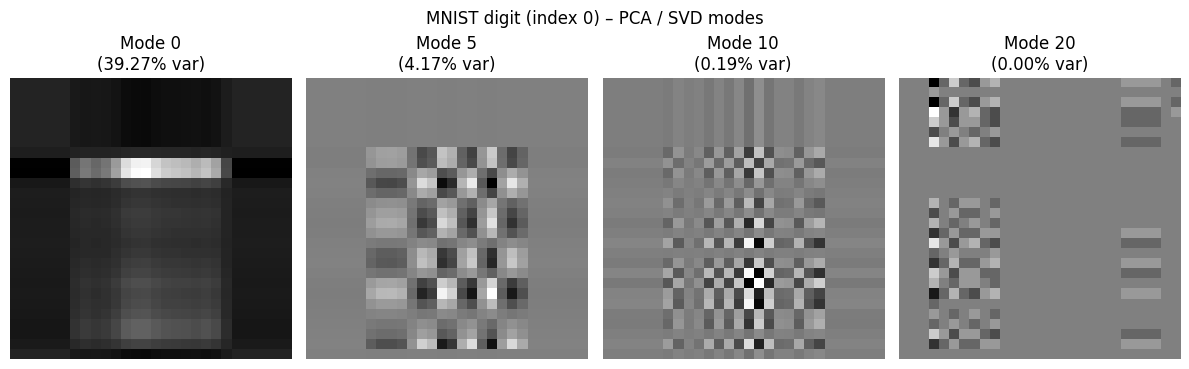

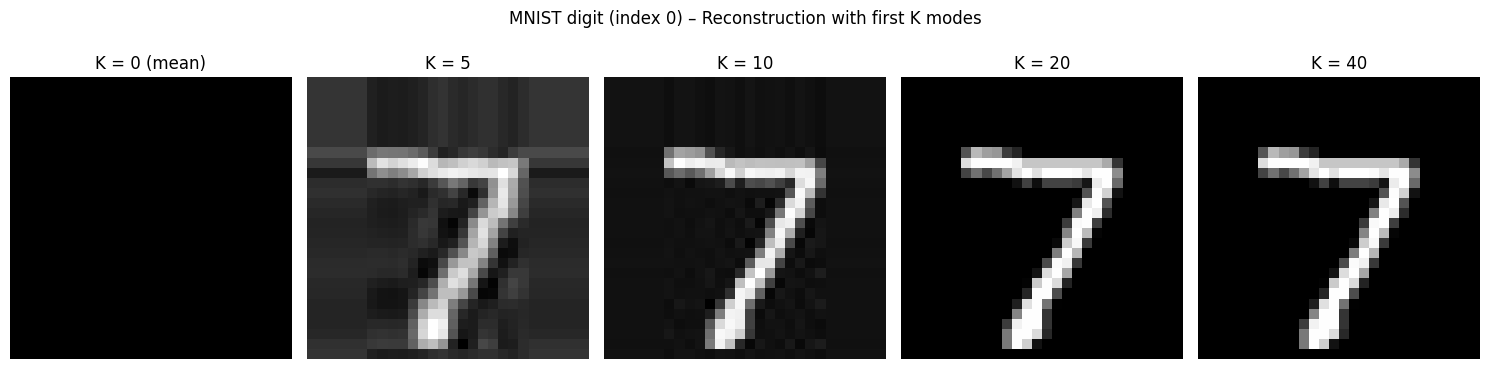

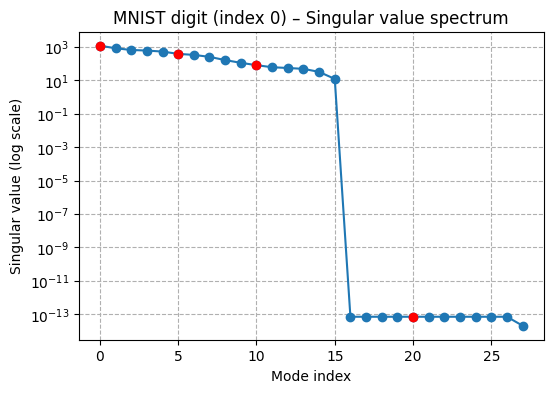

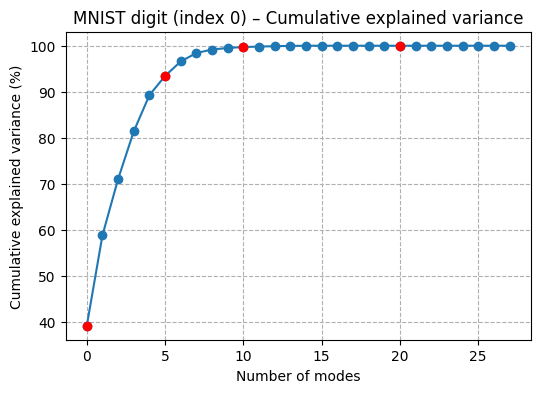

In [19]:
import numpy as np
import matplotlib.pyplot as plt

MODES_TO_ANALYZE = [0, 5, 10, 20, 40]
RECON_KS         = [0, 5, 10, 20, 40]

def mnist_pca_on_digit(j, modes=MODES_TO_ANALYZE, Ks=RECON_KS):
    # -------- 1) Get image and preprocess --------
    img = TEST_FULL[j]                  # shape (28, 28), uint8
    img_array = img.astype(np.float64)  # convert to float

    H, W = img_array.shape
    print(f"Digit index j={j}, image shape: {H} x {W}")

    # mean-center (important for PCA)
    mean_val = img_array.mean()
    X_centered = img_array - mean_val

    # -------- 2) PCA via SVD --------
    # X_centered ≈ U @ diag(S) @ Vt
    U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)

    singular_values_sq = S**2
    total_variance = singular_values_sq.sum()
    explained_variance_ratio = singular_values_sq / total_variance

    # -------- 3) Print info for selected modes --------
    print("\nSelected mode information:")
    num_modes_available = len(S)
    valid_modes = [m for m in modes if m < num_modes_available]
    for m in valid_modes:
        print(
            f"Mode {m:2d}: singular value = {S[m]:.4f}, "
            f"explained variance ratio = {explained_variance_ratio[m]*100:.3f}%"
        )
    if len(valid_modes) < len(modes):
        missing = [m for m in modes if m >= num_modes_available]
        if missing:
            print(f"(Skipping modes not available due to rank: {missing})")

    # -------- 4) Visualize individual modes --------
    if valid_modes:
        plt.figure(figsize=(3 * len(valid_modes), 4))
        for i, m in enumerate(valid_modes):
            mode_img = S[m] * np.outer(U[:, m], Vt[m, :])
            mode_img_display = mode_img + mean_val

            plt.subplot(1, len(valid_modes), i + 1)
            plt.imshow(mode_img_display, cmap="gray")
            plt.title(f"Mode {m}\n({explained_variance_ratio[m]*100:.2f}% var)")
            plt.axis("off")

        plt.suptitle(f"MNIST digit (index {j}) – PCA / SVD modes")
        plt.tight_layout()
        plt.show()

    # -------- 5) Reconstructions using first K modes --------
    def reconstruct_with_k_modes(k: int) -> np.ndarray:
        k = min(k, num_modes_available)
        if k == 0:
            return np.full_like(img_array, mean_val)

        U_k = U[:, :k]
        S_k = S[:k]
        Vt_k = Vt[:k, :]
        X_k = (U_k * S_k) @ Vt_k
        return X_k + mean_val

    plt.figure(figsize=(3 * len(Ks), 4))
    for i, k in enumerate(Ks):
        recon = reconstruct_with_k_modes(k)
        title = "K = 0 (mean)" if k == 0 else f"K = {k}"

        plt.subplot(1, len(Ks), i + 1)
        plt.imshow(recon, cmap="gray")
        plt.title(title)
        plt.axis("off")

    plt.suptitle(f"MNIST digit (index {j}) – Reconstruction with first K modes")
    plt.tight_layout()
    plt.show()

    # -------- 6) Singular value spectrum --------
    plt.figure(figsize=(6, 4))
    plt.semilogy(S, marker="o")
    for m in valid_modes:
        plt.semilogy(m, S[m], "ro")
    plt.xlabel("Mode index")
    plt.ylabel("Singular value (log scale)")
    plt.title(f"MNIST digit (index {j}) – Singular value spectrum")
    plt.grid(True, which="both", ls="--")
    plt.show()

    # -------- 7) Cumulative explained variance --------
    plt.figure(figsize=(6, 4))
    cum_exp = np.cumsum(explained_variance_ratio) * 100
    plt.plot(cum_exp, marker="o")
    for m in valid_modes:
        plt.plot(m, cum_exp[m], "ro")
    plt.xlabel("Number of modes")
    plt.ylabel("Cumulative explained variance (%)")
    plt.title(f"MNIST digit (index {j}) – Cumulative explained variance")
    plt.grid(True, ls="--")
    plt.show()

    return {
        "U": U,
        "S": S,
        "Vt": Vt,
        "explained_variance_ratio": explained_variance_ratio,
        "mean_val": mean_val,
    }

# Example: run PCA analysis on test digit j = 0
results_digit0 = mnist_pca_on_digit(j=0)


=== Test 1: Linear classifier on latent (AuE) ===
Latent dimension D = 2744


/tmp/ipython-input-992843422.py:31: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /pytorch/torch/csrc/utils/tensor_numpy.cpp:206.)
  x = torch.from_numpy(arr).float().unsqueeze(1) / 255.0


Epoch 01: train_acc=80.77%  test_acc=84.58%
Epoch 02: train_acc=89.24%  test_acc=85.06%
Epoch 03: train_acc=89.69%  test_acc=85.70%
Epoch 04: train_acc=90.20%  test_acc=85.48%
Epoch 05: train_acc=91.11%  test_acc=85.56%
Epoch 06: train_acc=91.25%  test_acc=85.58%
Epoch 07: train_acc=91.86%  test_acc=86.58%
Epoch 08: train_acc=91.75%  test_acc=85.78%
Epoch 09: train_acc=91.69%  test_acc=85.12%
Epoch 10: train_acc=91.97%  test_acc=85.86%
Epoch 11: train_acc=91.75%  test_acc=84.76%
Epoch 12: train_acc=92.44%  test_acc=85.22%
Epoch 13: train_acc=92.25%  test_acc=86.12%
Epoch 14: train_acc=92.58%  test_acc=86.06%
Epoch 15: train_acc=92.25%  test_acc=83.32%
Epoch 16: train_acc=92.37%  test_acc=85.88%
Epoch 17: train_acc=92.49%  test_acc=86.46%
Epoch 18: train_acc=93.05%  test_acc=86.40%
Epoch 19: train_acc=93.21%  test_acc=86.14%
Epoch 20: train_acc=93.14%  test_acc=84.76%
Epoch 21: train_acc=93.03%  test_acc=85.96%
Epoch 22: train_acc=93.22%  test_acc=85.22%
Epoch 23: train_acc=93.07%  test

Model  Final_train_acc  Final_test_acc
0    AuE           95.300           85.48
1    VAE           11.405           11.42
2  VQVAE           97.560           93.02
3  VQVA2           95.715           91.42

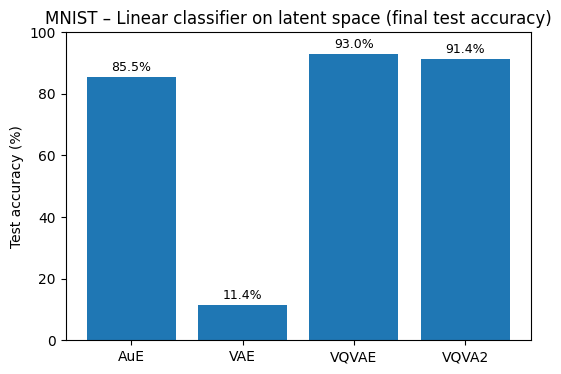

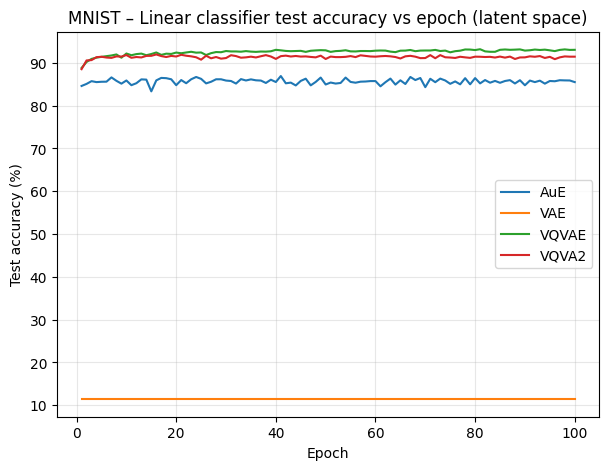

In [20]:
# Test 1 – Linear classifier on latent space (per model)
# simple linear classifier test + table + plots

import torch.nn as nn
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt

class LinearLatentClassifier(nn.Module):
    def __init__(self, d, num_classes=10):
        super().__init__()
        self.fc = nn.Linear(d, num_classes)

    def forward(self, z):
        return self.fc(z)

def train_eval_linear_on_latent(model_name,
                                max_train=20000,
                                max_test=5000,
                                epochs=100,
                                lr=1e-3):
    print(f"\n=== Test 1: Linear classifier on latent ({model_name}) ===")

    # 1) data & model
    train_loader, test_loader = make_mnist_labeled_loaders(
        batch_size=256,
        max_train=max_train,
        max_test=max_test,
    )
    enc = load_best_mnist_model(model_name)
    enc.eval()

    # get latent dim by encoding one batch
    xb0, yb0 = next(iter(train_loader))
    z0 = encode_mnist_batch(model_name, enc, xb0)
    D = z0.shape[1]
    print(f"Latent dimension D = {D}")

    clf = LinearLatentClassifier(D, num_classes=10).to(device)
    opt = torch.optim.Adam(clf.parameters(), lr=lr)
    ce  = nn.CrossEntropyLoss()

    def run_epoch(loader, train=True):
        if train:
            clf.train()
        else:
            clf.eval()
        total_loss, correct, total = 0.0, 0, 0
        for xb, yb in loader:
            xb, yb = xb.to(device), yb.to(device)
            with torch.no_grad():
                z = encode_mnist_batch(model_name, enc, xb)
            if train:
                opt.zero_grad(set_to_none=True)
            logits = clf(z)
            loss = ce(logits, yb)
            if train:
                loss.backward()
                opt.step()
            total_loss += loss.item() * yb.size(0)
            pred = logits.argmax(1)
            correct += (pred == yb).sum().item()
            total += yb.size(0)
        return total_loss / total, correct / total

    history = defaultdict(list)
    for ep in range(1, epochs + 1):
        tr_loss, tr_acc = run_epoch(train_loader, train=True)
        te_loss, te_acc = run_epoch(test_loader, train=False)
        history["train_loss"].append(tr_loss)
        history["train_acc"].append(tr_acc)
        history["test_loss"].append(te_loss)
        history["test_acc"].append(te_acc)
        print(f"Epoch {ep:02d}: "
              f"train_acc={tr_acc*100:5.2f}%  test_acc={te_acc*100:5.2f}%")

    print(f"\nFinal linear latent accuracies for {model_name}: "
          f"train={history['train_acc'][-1]*100:.2f}%  "
          f"test={history['test_acc'][-1]*100:.2f}%")

    # also store final metrics directly for summary
    history["final_train_acc"] = history["train_acc"][-1]
    history["final_test_acc"]  = history["test_acc"][-1]

    return history

# ---------------------------
# Run for all models & summarize
# ---------------------------
linear_results = {}
model_order = ["AuE", "VAE", "VQVAE", "VQVA2"]

for name in model_order:
    linear_results[name] = train_eval_linear_on_latent(name)

# Build a summary table (final accuracies per model)
rows = []
for name in model_order:
    if name not in linear_results:
        continue
    h = linear_results[name]
    rows.append({
        "Model": name,
        "Final_train_acc": h["final_train_acc"] * 100.0,
        "Final_test_acc":  h["final_test_acc"] * 100.0,
    })

if rows:
    df_acc = pd.DataFrame(rows)
    display(df_acc)

    # Bar plot of test accuracy per model
    plt.figure(figsize=(6, 4))
    plt.bar(df_acc["Model"], df_acc["Final_test_acc"])
    plt.ylabel("Test accuracy (%)")
    plt.ylim(0, 100)
    plt.title("MNIST – Linear classifier on latent space (final test accuracy)")
    for i, v in enumerate(df_acc["Final_test_acc"]):
        plt.text(i, v + 1.0, f"{v:.1f}%", ha="center", va="bottom", fontsize=9)
    plt.show()

    # Optional: test accuracy vs epoch curves for all models
    plt.figure(figsize=(7, 5))
    for name in model_order:
        if name not in linear_results:
            continue
        h = linear_results[name]
        epochs_range = range(1, len(h["test_acc"]) + 1)
        plt.plot(epochs_range,
                 [a * 100.0 for a in h["test_acc"]],
                 label=name)
    plt.xlabel("Epoch")
    plt.ylabel("Test accuracy (%)")
    plt.title("MNIST – Linear classifier test accuracy vs epoch (latent space)")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
else:
    print("No results to summarize.")

In [ ]:
#Test2: PCA on latent space


=== Test 2: PCA on latent space – AuE ===
Collected latent matrix: N=20000, D=2744
Latent shape (raw): (2744,)
Inferred latent shape (C,H,W) from D=2744: (56, 7, 7)
Explained variance ratio (first 10 components):
[0.03466761 0.03337754 0.02317039 0.0197641  0.01813158 0.01733998
 0.01549179 0.0149431  0.01400132 0.01333576]


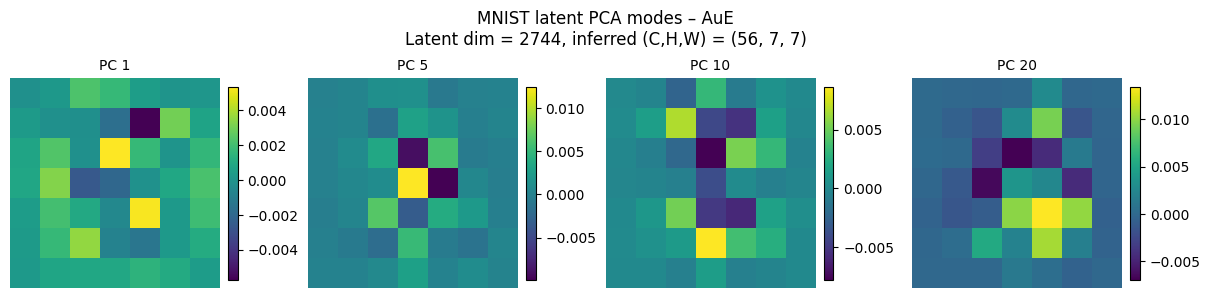


=== Test 2: PCA on latent space – VAE ===
Collected latent matrix: N=20000, D=2744
Latent shape (raw): (2744,)
Inferred latent shape (C,H,W) from D=2744: (56, 7, 7)
Explained variance ratio (first 10 components):
[0.54142976 0.03690715 0.01666336 0.01608022 0.01165477 0.01144943
 0.0111549  0.01092104 0.0100586  0.00880677]


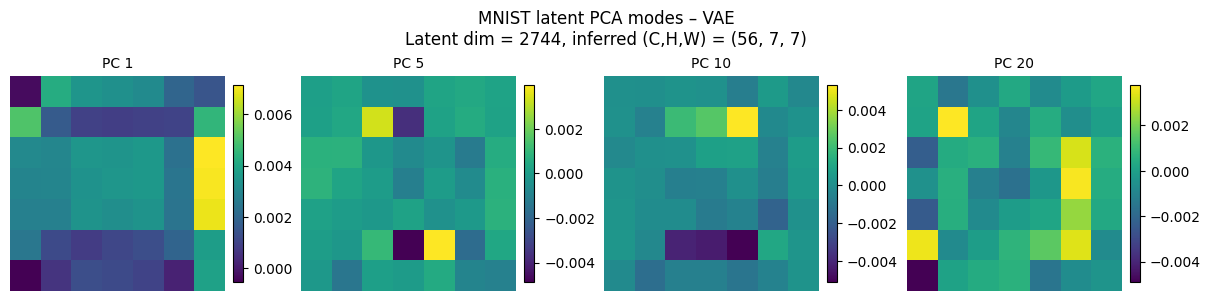


=== Test 2: PCA on latent space – VQVAE ===
Collected latent matrix: N=20000, D=2744
Latent shape (raw): (2744,)
Inferred latent shape (C,H,W) from D=2744: (56, 7, 7)
Explained variance ratio (first 10 components):
[0.12616163 0.10124283 0.08397867 0.05913356 0.04765175 0.0387564
 0.03325227 0.02806324 0.02543457 0.02390224]


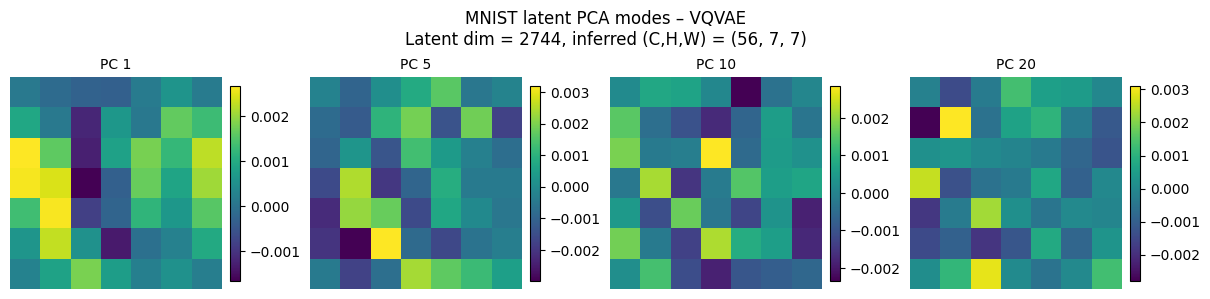


=== Test 2: PCA on latent space – VQVA2 ===
Collected latent matrix: N=20000, D=5488
Latent shape (raw): (5488,)
Inferred latent shape (C,H,W) from D=5488: (112, 7, 7)
Explained variance ratio (first 10 components):
[0.1316511  0.10092166 0.08604209 0.05977327 0.05066805 0.04150147
 0.03802543 0.02937539 0.02852519 0.02634472]


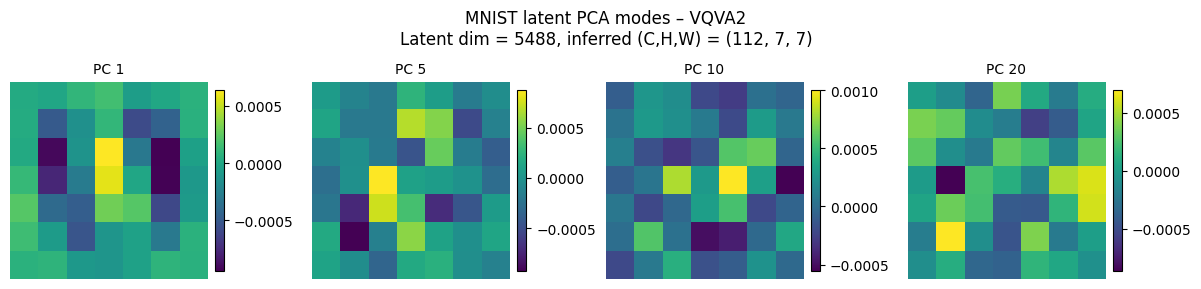

In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

def collect_latent_matrix_mnist(model_name,
                                max_samples=20000,
                                batch_size=256,
                                use_train=True):
    """
    Encodes up to max_samples MNIST images into latent space for a given model.
    Returns:
      Z_flat: (N, D) latent matrix
      latent_shape_raw: shape info before flattening
    """
    # choose loader (train for PCA)
    if use_train:
        train_loader, _ = make_mnist_labeled_loaders(
            batch_size=batch_size,
            max_train=max_samples,
            max_test=0,
        )
        loader = train_loader
    else:
        _, test_loader = make_mnist_labeled_loaders(
            batch_size=batch_size,
            max_train=0,
            max_test=max_samples,
        )
        loader = test_loader

    enc = load_best_mnist_model(model_name)
    enc.eval()

    Z_list = []
    latent_shape_raw = None

    with torch.no_grad():
        for xb, yb in loader:
            xb = xb.to(device)
            z = encode_mnist_batch(model_name, enc, xb)  # could be (B,D) or (B,C,H,W)

            if z.dim() == 2:
                # already flat
                if latent_shape_raw is None:
                    latent_shape_raw = (z.shape[1],)
                Z_list.append(z.cpu())
            else:
                # (B, C, H, W)
                if latent_shape_raw is None:
                    latent_shape_raw = (z.shape[1], z.shape[2], z.shape[3])
                Z_list.append(z.cpu().reshape(z.size(0), -1))

    if not Z_list:
        raise RuntimeError(f"No latent data collected for model {model_name}")

    Z_flat = torch.cat(Z_list, dim=0)  # (N, D)
    return Z_flat.numpy(), latent_shape_raw


def infer_chw_from_flat_D(D, H=7, W=7):
    """
    For MNIST experiments we know latents are based on 7x7 grids.
    Try to reconstruct (C, H, W) from total dimension D.
    """
    HW = H * W
    if D % HW != 0:
        return None
    C = D // HW
    return (C, H, W)


def pca_on_latent_mnist(model_name,
                        max_samples=20000,
                        n_components=20,
                        use_train=True):
    print(f"\n=== Test 2: PCA on latent space – {model_name} ===")
    Z_flat, latent_shape_raw = collect_latent_matrix_mnist(
        model_name,
        max_samples=max_samples,
        batch_size=256,
        use_train=use_train,
    )

    N, D = Z_flat.shape
    print(f"Collected latent matrix: N={N}, D={D}")
    print(f"Latent shape (raw): {latent_shape_raw}")

    latent_shape_3d = None
    if latent_shape_raw is not None and len(latent_shape_raw) == 3:
        latent_shape_3d = latent_shape_raw
    elif latent_shape_raw is not None and len(latent_shape_raw) == 1:
        inferred = infer_chw_from_flat_D(latent_shape_raw[0], H=7, W=7)
        if inferred is not None:
            latent_shape_3d = inferred
            print(f"Inferred latent shape (C,H,W) from D={latent_shape_raw[0]}: {latent_shape_3d}")
        else:
            print("Could not infer (C,H,W) from flat latent dimension.")
    else:
        print("No usable latent shape info to infer (C,H,W).")

    # PCA
    pca = PCA(n_components=min(n_components, D))
    Z_pca = pca.fit_transform(Z_flat)

    print("Explained variance ratio (first 10 components):")
    print(pca.explained_variance_ratio_[:10])

    if latent_shape_3d is None:
        print("Latent shape not 3D (C,H,W); skipping mode image visualization.\n")
        return pca, Z_pca

    C, H, W = latent_shape_3d
    comps = pca.components_  # (n_components, D)

    mode_indices = [0, 4, 9, 19]  # PC1, PC5, PC10, PC20
    mode_indices = [i for i in mode_indices if i < comps.shape[0]]

    fig, axes = plt.subplots(
        1, len(mode_indices),
        figsize=(3 * len(mode_indices), 3),
        constrained_layout=True
    )
    if len(mode_indices) == 1:
        axes = [axes]

    for ax, idx in zip(axes, mode_indices):
        vec = comps[idx]  # shape (D,)
        try:
            mode_chw = vec.reshape(C, H, W)  # (C,H,W)
        except Exception as e:
            print(f"[WARN] Could not reshape PC{idx+1} into (C,H,W): {e}")
            continue

        mode_2d = mode_chw.mean(axis=0)

        im = ax.imshow(mode_2d, origin="lower")
        ax.set_title(f"PC {idx+1}", fontsize=10)
        ax.axis("off")
        fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

    fig.suptitle(
        f"MNIST latent PCA modes – {model_name}\n"
        f"Latent dim = {D}, inferred (C,H,W) = {latent_shape_3d}",
        fontsize=12
    )
    plt.show()

    return pca, Z_pca


# ---- Run Test 2 for all four models ----
pca_results = {}
for name in ["AuE", "VAE", "VQVAE", "VQVA2"]:
    try:
        pca_results[name] = pca_on_latent_mnist(name, max_samples=20000)
    except Exception as e:
        print(f"[WARN] PCA failed for {name}: {e}")


=== Test 2 (PCA) with digit scatter – AuE ===
Collected latent matrix: N=10000, D=2744
Explained variance ratio (first 10 components):
[0.03644999 0.03438239 0.02404895 0.02023471 0.01812785 0.01642679
 0.01586218 0.01524368 0.014123   0.01370786]


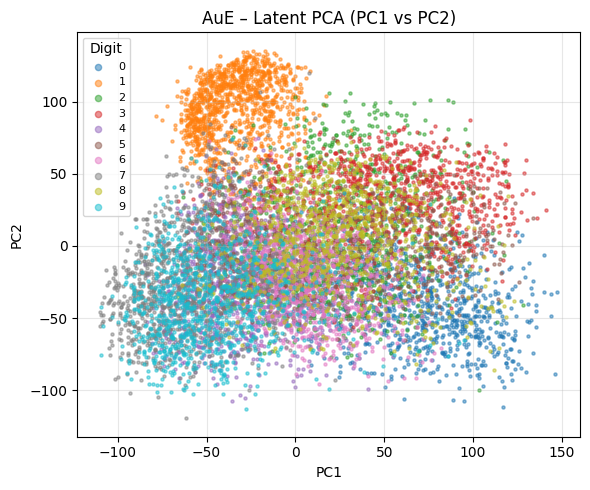


=== Test 2 (PCA) with digit scatter – VAE ===
Collected latent matrix: N=10000, D=2744
Explained variance ratio (first 10 components):
[0.1662473  0.06609395 0.03075086 0.02926072 0.02106487 0.02056224
 0.02024543 0.01986875 0.0182382  0.01653875]


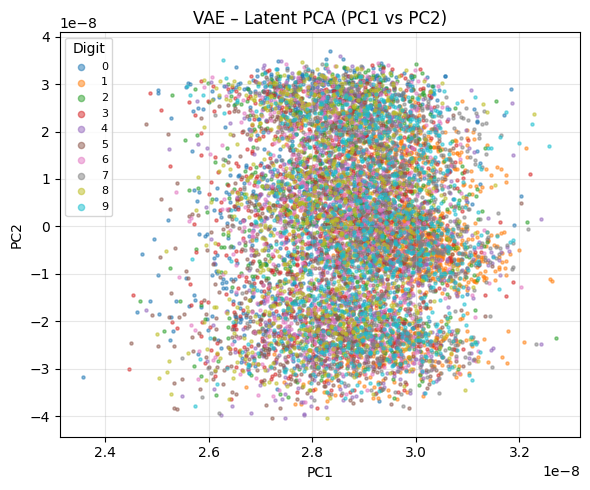


=== Test 2 (PCA) with digit scatter – VQVAE ===
Collected latent matrix: N=10000, D=2744
Explained variance ratio (first 10 components):
[0.1285904  0.09943384 0.08383082 0.0613023  0.04731158 0.0390804
 0.03318958 0.02813573 0.02451202 0.02410211]


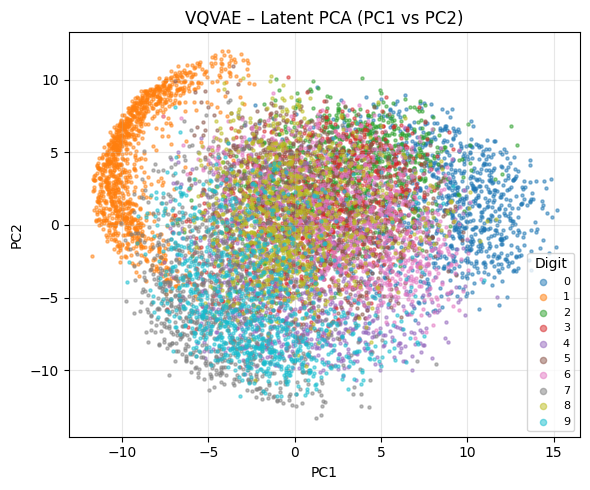


=== Test 2 (PCA) with digit scatter – VQVA2 ===
Collected latent matrix: N=10000, D=5488
Explained variance ratio (first 10 components):
[0.13464628 0.10102803 0.08491506 0.06087331 0.05042385 0.04260616
 0.03759283 0.02940991 0.02761651 0.02598241]


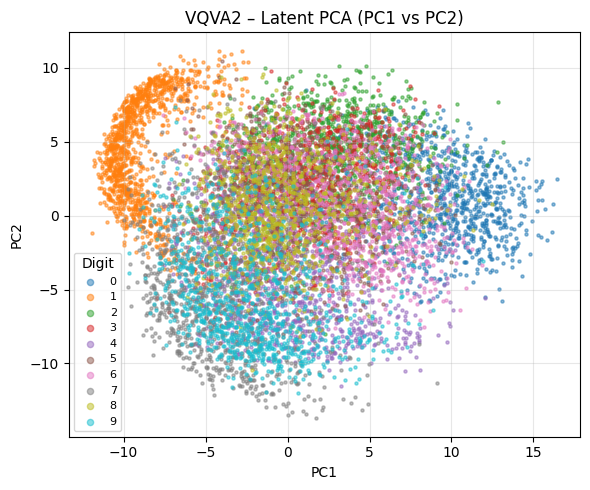

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def pca_latent_with_digits(model_name,
                           max_samples=20000,
                           n_components=20,
                           batch_size=512):
    """
    - Collect latent vectors z for up to max_samples test images.
    - Run PCA.
    - Plot PC1 vs PC2, color-coded by digit label.
    """
    print(f"\n=== Test 2 (PCA) with digit scatter – {model_name} ===")

    train_loader, test_loader = make_mnist_labeled_loaders(
        batch_size=batch_size,
        max_train=max_samples,
        max_test=max_samples,
    )

    enc = load_best_mnist_model(model_name)
    enc.eval()

    Z_list = []
    y_list = []
    total = 0

    with torch.no_grad():
        for xb, yb in test_loader:
            xb = xb.to(device)
            z = encode_mnist_batch(model_name, enc, xb)  # (B, D_flat)
            Z_list.append(z.cpu().numpy())
            y_list.append(yb.numpy())
            total += yb.size(0)
            if total >= max_samples:
                break

    Z = np.concatenate(Z_list, axis=0)
    y = np.concatenate(y_list, axis=0)
    N, D = Z.shape
    print(f"Collected latent matrix: N={N}, D={D}")

    # PCA
    pca = PCA(n_components=n_components, random_state=0)
    Z_pca = pca.fit_transform(Z)
    evr = pca.explained_variance_ratio_
    print("Explained variance ratio (first 10 components):")
    print(evr[:10])

    # Scatter PC1 vs PC2 by digit
    plt.figure(figsize=(6, 5))
    for d in range(10):
        mask = (y == d)
        if not np.any(mask):
            continue
        plt.scatter(
            Z_pca[mask, 0],
            Z_pca[mask, 1],
            s=5,
            alpha=0.5,
            label=str(d),
        )
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title(f"{model_name} – Latent PCA (PC1 vs PC2)")
    plt.legend(title="Digit", fontsize=8, markerscale=2)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    return {
        "Z": Z,
        "y": y,
        "Z_pca": Z_pca,
        "pca": pca,
        "explained_variance_ratio": evr,
    }
pca_results = {}
for name in ["AuE", "VAE", "VQVAE", "VQVA2"]:
    pca_results[name] = pca_latent_with_digits(name)


=== Test 2 (PCA modes 1,5,10,20) – AuE ===
Collected latent matrix: N=10000, D=2744
Explained variance ratio (first 10 components):
[0.03644999 0.03438239 0.02404895 0.02023471 0.01812785 0.01642679
 0.01586218 0.01524368 0.014123   0.01370786]


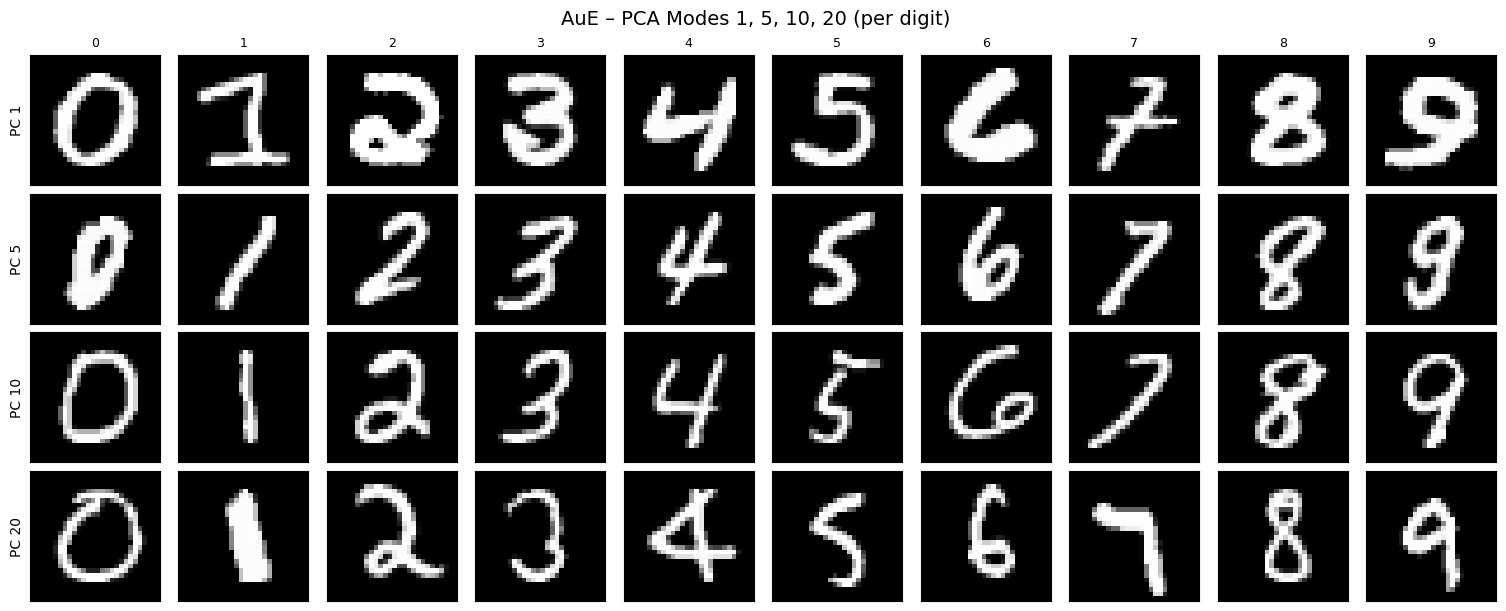


=== Test 2 (PCA modes 1,5,10,20) – VAE ===
Collected latent matrix: N=10000, D=2744
Explained variance ratio (first 10 components):
[0.1662473  0.06609395 0.03075086 0.02926072 0.02106487 0.02056224
 0.02024543 0.01986875 0.0182382  0.01653875]


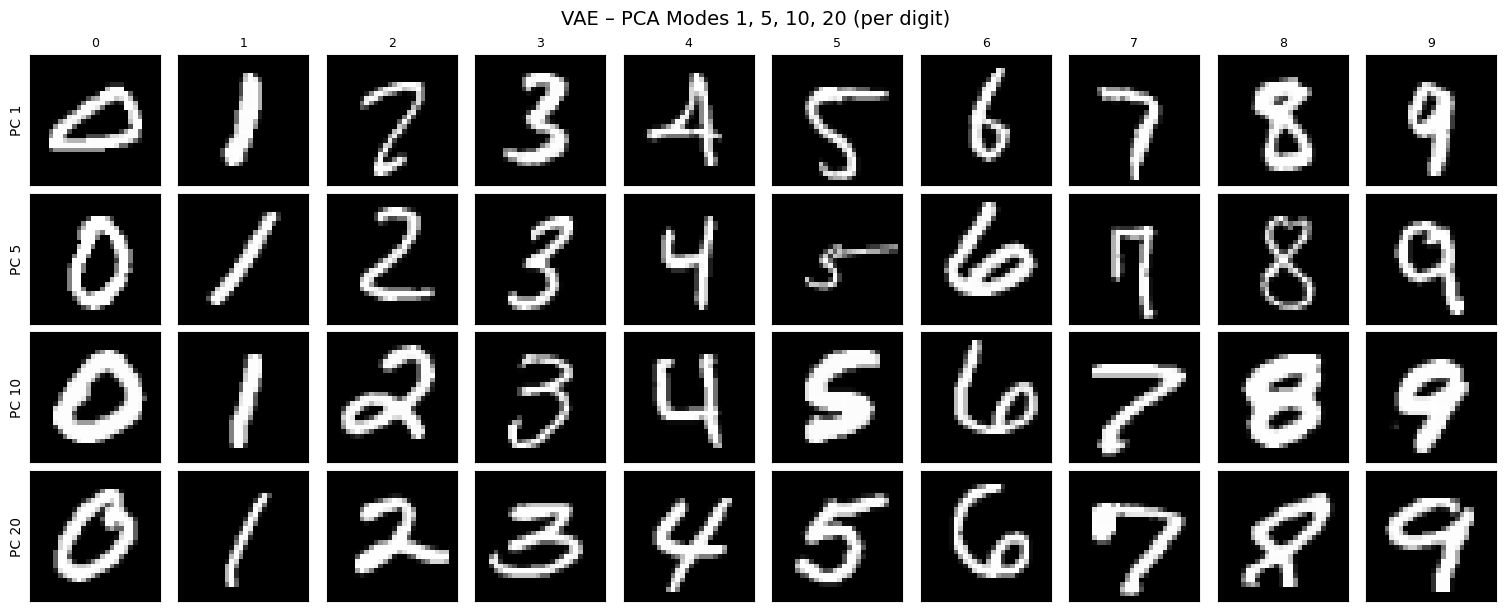


=== Test 2 (PCA modes 1,5,10,20) – VQVAE ===
Collected latent matrix: N=10000, D=2744
Explained variance ratio (first 10 components):
[0.1285904  0.09943384 0.08383082 0.0613023  0.04731158 0.0390804
 0.03318958 0.02813573 0.02451202 0.02410211]


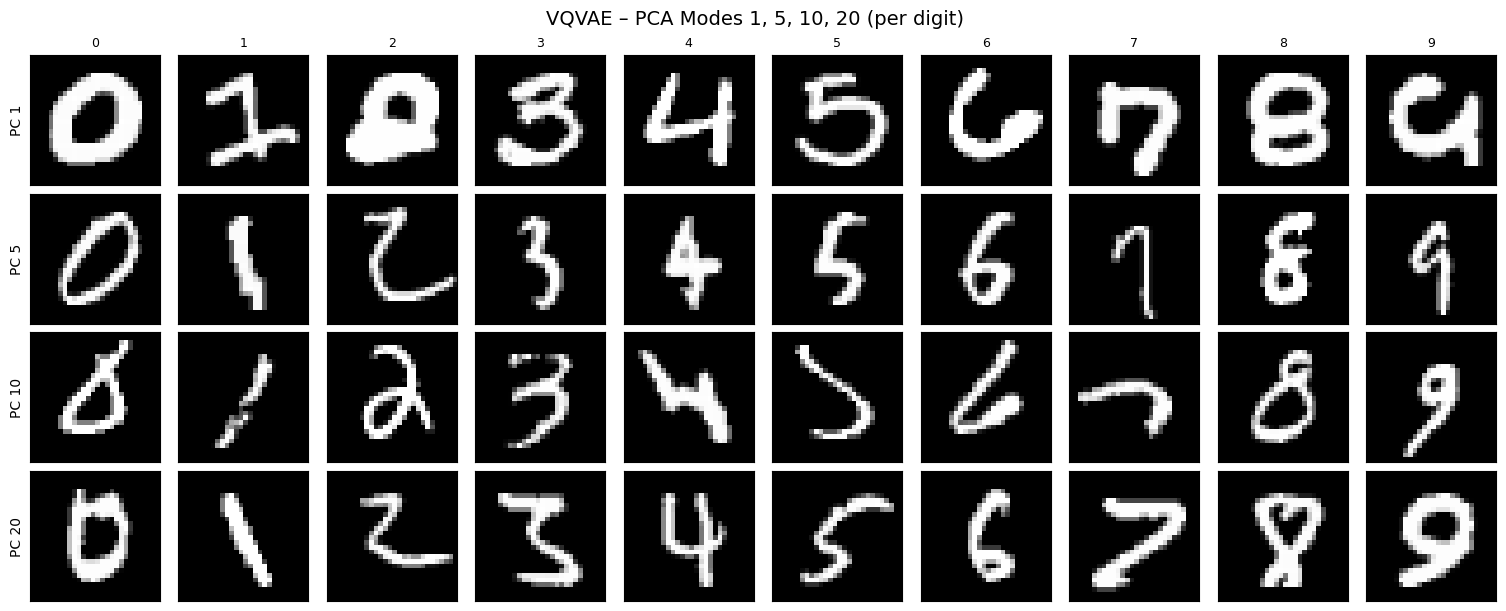


=== Test 2 (PCA modes 1,5,10,20) – VQVA2 ===
Collected latent matrix: N=10000, D=5488
Explained variance ratio (first 10 components):
[0.13464628 0.10102803 0.08491506 0.06087331 0.05042385 0.04260616
 0.03759283 0.02940991 0.02761651 0.02598241]


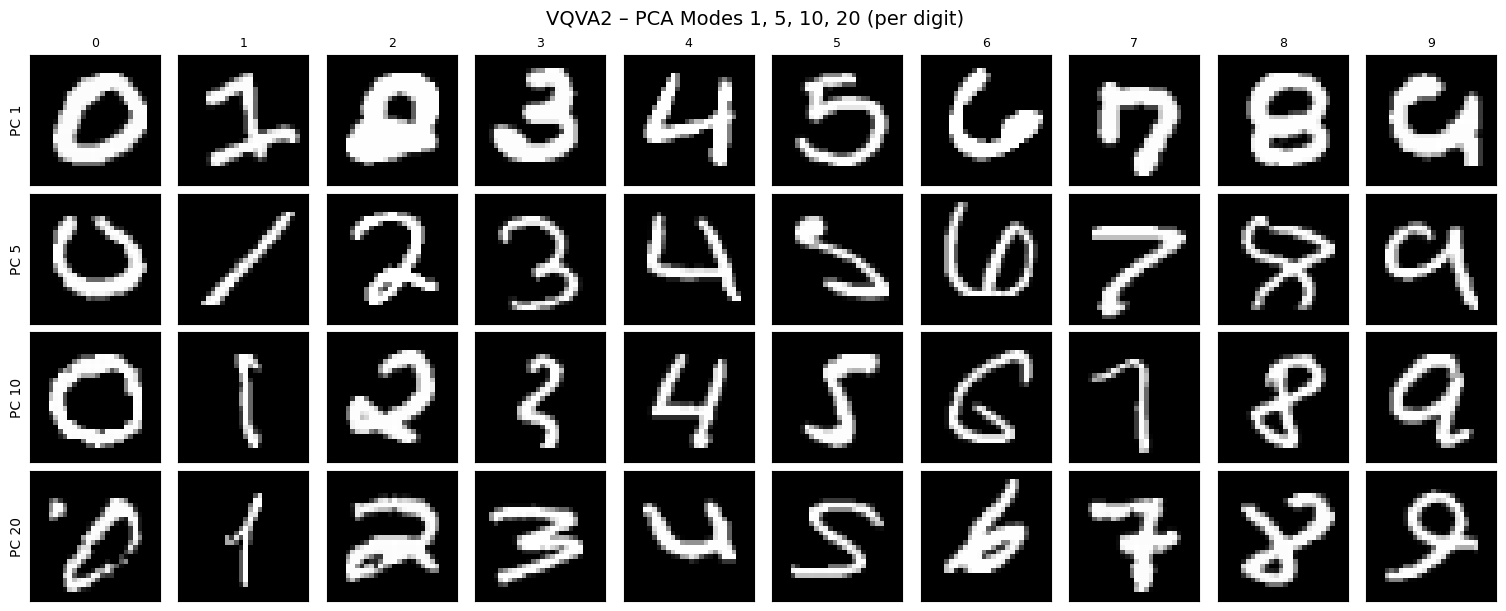

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def pca_latent_modes_with_digits(model_name,
                                 max_samples=20000,
                                 n_components=20,
                                 batch_size=512):
    """
    Test 2: PCA on latent space for MNIST.

    - Collect latent vectors z for up to max_samples test images.
    - Fit PCA with at least 20 components.
    - For PCs 1, 5, 10, 20 (indices 0,4,9,19):
        For each digit 0–9, pick one test image with a large positive
        projection on that PC and show it in a grid.

    Returns: dict with Z, y, Z_pca, pca, explained_variance_ratio.
    """
    print(f"\n=== Test 2 (PCA modes 1,5,10,20) – {model_name} ===")

    train_loader, test_loader = make_mnist_labeled_loaders(
        batch_size=batch_size,
        max_train=max_samples,
        max_test=max_samples,
    )

    enc = load_best_mnist_model(model_name)
    enc.eval()

    Z_list, y_list, img_list = [], [], []
    total = 0

    with torch.no_grad():
        for xb, yb in test_loader:
            xb = xb.to(device)
            z = encode_mnist_batch(model_name, enc, xb)

            Z_list.append(z.cpu().numpy())
            y_list.append(yb.numpy())

            img_list.append(xb.cpu().numpy())

            total += yb.size(0)
            if total >= max_samples:
                break

    Z = np.concatenate(Z_list, axis=0)          # (N, D)
    y = np.concatenate(y_list, axis=0)          # (N,)
    imgs = np.concatenate(img_list, axis=0)     # (N, 1, 28, 28)

    N, D = Z.shape
    print(f"Collected latent matrix: N={N}, D={D}")

    imgs_disp = np.clip(0.5 * imgs + 0.5, 0.0, 1.0)

    # PCA
    n_components = max(n_components, 20)
    pca = PCA(n_components=n_components, random_state=0)
    Z_pca = pca.fit_transform(Z)
    evr = pca.explained_variance_ratio_
    print("Explained variance ratio (first 10 components):")
    print(evr[:10])

    # PCs to inspect: 1, 5, 10, 20
    pc_indices = [0, 4, 9, 19]
    pc_labels  = ["PC 1", "PC 5", "PC 10", "PC 20"]

    fig, axes = plt.subplots(
        nrows=len(pc_indices), ncols=10,
        figsize=(15, 6),
        constrained_layout=True
    )

    if len(pc_indices) == 1:
        axes = axes[np.newaxis, :]

    for row, (pc_idx, pc_label) in enumerate(zip(pc_indices, pc_labels)):
        scores = Z_pca[:, pc_idx]   # (N,)

        for digit in range(10):
            ax = axes[row, digit]
            mask = (y == digit)

            if np.any(mask):
                idx_digit = np.where(mask)[0]
                best_local = idx_digit[np.argmax(scores[mask])]
                img = imgs_disp[best_local, 0]  # (28, 28)
                ax.imshow(img, cmap="gray")
            else:
                ax.axis("off")

            if row == 0:
                ax.set_title(str(digit), fontsize=9)
            ax.set_xticks([])
            ax.set_yticks([])

        axes[row, 0].set_ylabel(pc_label, fontsize=10, rotation=90)

    fig.suptitle(f"{model_name} – PCA Modes 1, 5, 10, 20 (per digit)", fontsize=14)
    plt.show()

    return {
        "Z": Z,
        "y": y,
        "Z_pca": Z_pca,
        "pca": pca,
        "explained_variance_ratio": evr,
    }
pca_mode_results = {}
for name in ["AuE", "VAE", "VQVAE", "VQVA2"]:
    pca_mode_results[name] = pca_latent_modes_with_digits(name)


=== Test 3: MLP classifier on latent (AuE) ===
Latent dimension D = 2744
Epoch 01: train_acc=84.06%  test_acc=90.02%
Epoch 02: train_acc=95.91%  test_acc=91.86%
Epoch 03: train_acc=98.29%  test_acc=93.06%
Epoch 04: train_acc=99.39%  test_acc=93.56%
Epoch 05: train_acc=99.85%  test_acc=93.58%
Epoch 06: train_acc=99.98%  test_acc=94.02%
Epoch 07: train_acc=100.00%  test_acc=93.98%
Epoch 08: train_acc=100.00%  test_acc=94.10%
Epoch 09: train_acc=100.00%  test_acc=94.02%
Epoch 10: train_acc=100.00%  test_acc=94.12%
Epoch 11: train_acc=100.00%  test_acc=94.08%
Epoch 12: train_acc=100.00%  test_acc=94.06%
Epoch 13: train_acc=100.00%  test_acc=94.06%
Epoch 14: train_acc=100.00%  test_acc=94.04%
Epoch 15: train_acc=100.00%  test_acc=94.04%
Epoch 16: train_acc=100.00%  test_acc=94.06%
Epoch 17: train_acc=100.00%  test_acc=94.06%
Epoch 18: train_acc=100.00%  test_acc=94.02%
Epoch 19: train_acc=100.00%  test_acc=94.08%
Epoch 20: train_acc=100.00%  test_acc=94.08%
Epoch 21: train_acc=100.00%  tes

Model  Final_train_acc  Final_test_acc
0    AuE          100.000           94.36
1    VAE           11.405           11.42
2  VQVAE          100.000           96.90
3  VQVA2          100.000           96.40

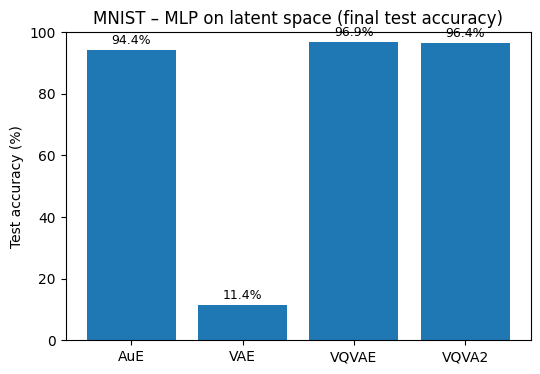

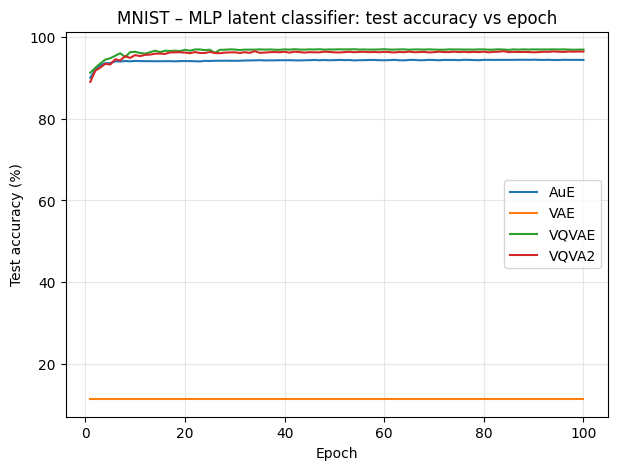

In [25]:
#Test3: Non-linear classifier (shared architecture across models)
#This acts as a downstream task to “grade” the latent space quality.

import torch.nn as nn
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt

class MLPOnLatent(nn.Module):
    def __init__(self, d, num_classes=10, hidden=256):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(d, hidden),
            nn.ReLU(inplace=True),
            nn.Linear(hidden, num_classes),
        )

    def forward(self, z):
        return self.net(z)

def train_eval_mlp_on_latent(model_name,
                             max_train=20000,
                             max_test=5000,
                             epochs=100,
                             lr=1e-3,
                             hidden=256):
    print(f"\n=== Test 3: MLP classifier on latent ({model_name}) ===")

    # 1) data & encoder
    train_loader, test_loader = make_mnist_labeled_loaders(
        batch_size=256,
        max_train=max_train,
        max_test=max_test,
    )
    enc = load_best_mnist_model(model_name)
    enc.eval()

    # determine latent dim
    xb0, yb0 = next(iter(train_loader))
    z0 = encode_mnist_batch(model_name, enc, xb0)
    D = z0.view(z0.size(0), -1).shape[1]
    print(f"Latent dimension D = {D}")

    clf = MLPOnLatent(D, num_classes=10, hidden=hidden).to(device)
    opt = torch.optim.Adam(clf.parameters(), lr=lr)
    ce  = nn.CrossEntropyLoss()

    def run_epoch(loader, train=True):
        if train:
            clf.train()
        else:
            clf.eval()
        total_loss, correct, total = 0.0, 0, 0
        for xb, yb in loader:
            xb, yb = xb.to(device), yb.to(device)
            with torch.no_grad():
                z = encode_mnist_batch(model_name, enc, xb)
                z = z.view(z.size(0), -1)
            if train:
                opt.zero_grad(set_to_none=True)
            logits = clf(z)
            loss = ce(logits, yb)
            if train:
                loss.backward()
                opt.step()
            total_loss += loss.item() * yb.size(0)
            pred = logits.argmax(1)
            correct += (pred == yb).sum().item()
            total += yb.size(0)
        return total_loss / total, correct / total

    history = defaultdict(list)
    for ep in range(1, epochs + 1):
        tr_loss, tr_acc = run_epoch(train_loader, train=True)
        te_loss, te_acc = run_epoch(test_loader, train=False)
        history["train_loss"].append(tr_loss)
        history["train_acc"].append(tr_acc)
        history["test_loss"].append(te_loss)
        history["test_acc"].append(te_acc)
        print(f"Epoch {ep:02d}: "
              f"train_acc={tr_acc*100:5.2f}%  test_acc={te_acc*100:5.2f}%")

    history["final_train_acc"] = history["train_acc"][-1]
    history["final_test_acc"]  = history["test_acc"][-1]

    print(f"\nFinal MLP latent accuracies for {model_name}: "
          f"train={history['final_train_acc']*100:.2f}%  "
          f"test={history['final_test_acc']*100:.2f}%")

    return history

# Run Test 3 for all models & summarize
mlp_results = {}
model_order = ["AuE", "VAE", "VQVAE", "VQVA2"]

for name in model_order:
    try:
        mlp_results[name] = train_eval_mlp_on_latent(name)
    except Exception as e:
        print(f"[WARN] MLP latent classification failed for {name}: {e}")

# Build summary table
rows = []
for name in model_order:
    if name not in mlp_results:
        continue
    h = mlp_results[name]
    rows.append({
        "Model": name,
        "Final_train_acc": h["final_train_acc"] * 100.0,
        "Final_test_acc":  h["final_test_acc"] * 100.0,
    })

if rows:
    df_mlp = pd.DataFrame(rows)
    display(df_mlp)

    plt.figure(figsize=(6, 4))
    plt.bar(df_mlp["Model"], df_mlp["Final_test_acc"])
    plt.ylabel("Test accuracy (%)")
    plt.ylim(0, 100)
    plt.title("MNIST – MLP on latent space (final test accuracy)")
    for i, v in enumerate(df_mlp["Final_test_acc"]):
        plt.text(i, v + 1.0, f"{v:.1f}%", ha="center", va="bottom", fontsize=9)
    plt.show()

    plt.figure(figsize=(7, 5))
    for name in model_order:
        if name not in mlp_results:
            continue
        h = mlp_results[name]
        ep_range = range(1, len(h["test_acc"]) + 1)
        plt.plot(ep_range,
                 [a * 100.0 for a in h["test_acc"]],
                 label=name)
    plt.xlabel("Epoch")
    plt.ylabel("Test accuracy (%)")
    plt.title("MNIST – MLP latent classifier: test accuracy vs epoch")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
else:
    print("No MLP results to summarize.")


=== Test 4: Latent Clustering – AuE ===
[AuE] collected: Z=(5000, 2744), labels=(5000,)
  PCA for clustering: 2744 → 20
  Silhouette score : 0.1102
  Adjusted Rand idx: 0.2453


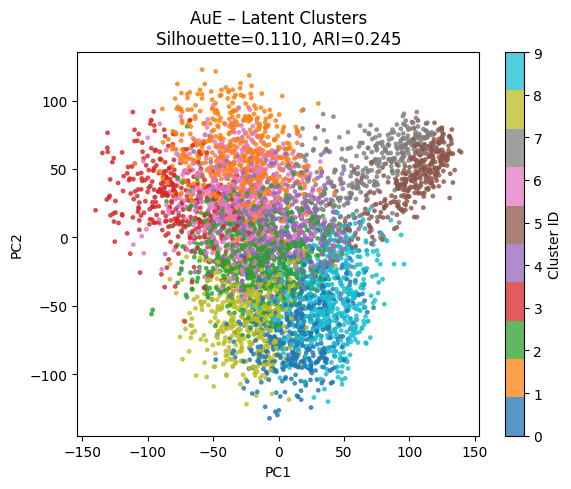


=== Test 4: Latent Clustering – VAE ===
[VAE] collected: Z=(5000, 2744), labels=(5000,)
  PCA for clustering: 2744 → 20
  Silhouette score : 0.0839
  Adjusted Rand idx: 0.0349


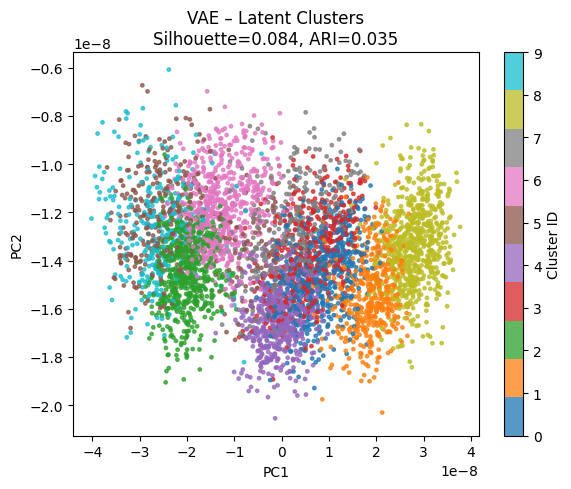


=== Test 4: Latent Clustering – VQVAE ===
[VQVAE] collected: Z=(5000, 2744), labels=(5000,)
  PCA for clustering: 2744 → 20
  Silhouette score : 0.1426
  Adjusted Rand idx: 0.3662


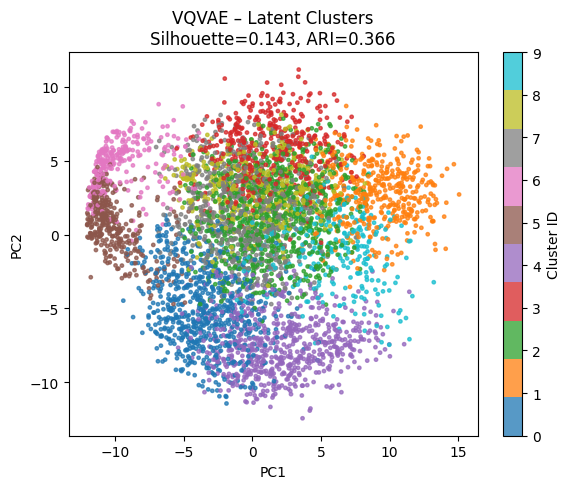


=== Test 4: Latent Clustering – VQVA2 ===
[VQVA2] collected: Z=(5000, 5488), labels=(5000,)
  PCA for clustering: 5488 → 20
  Silhouette score : 0.1479
  Adjusted Rand idx: 0.4368


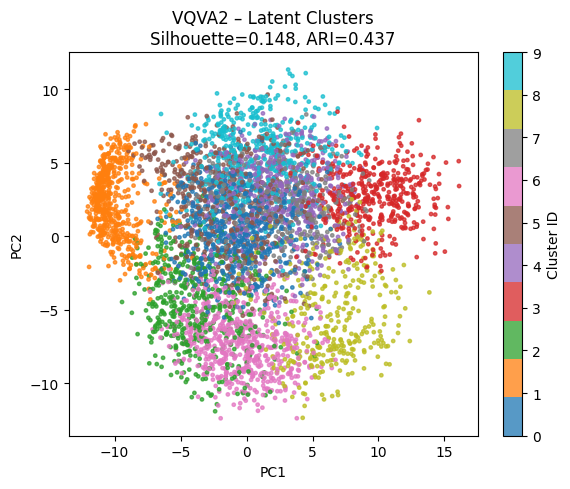

In [26]:
# Test 4 – Latent clustering (MNIST)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

def collect_latent_and_labels(model_name, max_points=5000):
    """
    Encodes up to max_points from the MNIST test set.
    Returns:
      Z  : (N, D) latent matrix
      ys : (N,)   true digit labels
    """
    train_loader, test_loader = make_mnist_labeled_loaders(
        batch_size=256,
        max_train=None,
        max_test=max_points,
    )

    enc = load_best_mnist_model(model_name)
    enc.eval()

    zs, ys = [], []
    with torch.no_grad():
        for xb, yb in test_loader:
            xb = xb.to(device)
            z = encode_mnist_batch(model_name, enc, xb)
            zs.append(z.cpu().numpy())
            ys.append(yb.numpy())

    Z = np.concatenate(zs, axis=0)
    ys = np.concatenate(ys, axis=0)

    print(f"[{model_name}] collected: Z={Z.shape}, labels={ys.shape}")
    return Z, ys


def latent_clustering_test(model_name,
                           max_points=5000,
                           n_clusters=10,
                           pca_dim_for_kmeans=20,
                           random_state=0):
    print(f"\n=== Test 4: Latent Clustering – {model_name} ===")

    Z, ys = collect_latent_and_labels(model_name, max_points=max_points)
    N, D = Z.shape

    if pca_dim_for_kmeans is not None and pca_dim_for_kmeans < D:
        pca_k = PCA(n_components=pca_dim_for_kmeans, random_state=random_state)
        Z_k = pca_k.fit_transform(Z)
        print(f"  PCA for clustering: {D} → {pca_dim_for_kmeans}")
    else:
        Z_k = Z

    # ---- KMeans ----
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=random_state)
    cluster_ids = kmeans.fit_predict(Z_k)

    # ---- Metrics ----
    sil = silhouette_score(Z_k, cluster_ids)
    ari = adjusted_rand_score(ys, cluster_ids)

    print(f"  Silhouette score : {sil:.4f}")
    print(f"  Adjusted Rand idx: {ari:.4f}")

    # ---- 2D PCA scatter plot ----
    pca_2 = PCA(n_components=2, random_state=random_state)
    Z_2 = pca_2.fit_transform(Z)

    plt.figure(figsize=(6,5))
    sc = plt.scatter(Z_2[:,0], Z_2[:,1], c=cluster_ids,
                     s=6, cmap="tab10", alpha=0.75)
    plt.colorbar(sc, label="Cluster ID")
    plt.title(f"{model_name} – Latent Clusters\nSilhouette={sil:.3f}, ARI={ari:.3f}")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.tight_layout()
    plt.show()

    return {
        "Z": Z,
        "labels": ys,
        "cluster_ids": cluster_ids,
        "silhouette": sil,
        "ari": ari,
    }


# ---- Run for all models ----
cluster_results = {}
for name in ["AuE", "VAE", "VQVAE", "VQVA2"]:
    cluster_results[name] = latent_clustering_test(name, max_points=5000)

In [27]:
# Part 2: Imagenet Analysis

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

BASE_INET = Path("./best_models/output_inet")

MODEL_DIRS_INET = {
    "AuE":   BASE_INET / "output_inet_ae",
    "VAE":   BASE_INET / "output_inet_vae",
    "VQVAE": BASE_INET / "output_inet_vqvae",
    "VQVA2": BASE_INET / "output_inet_vqvae2",
}

def load_inet_metrics():
    dfs = []
    for model_name, mdir in MODEL_DIRS_INET.items():
        csv_path = mdir / "metrics_inet100.csv"
        if not csv_path.exists():
            print(f"WARNING: metrics_inet100.csv not found for {model_name} at {csv_path}")
            continue
        df = pd.read_csv(csv_path)
        if "model" not in df.columns:
            df["model"] = model_name
        dfs.append(df)

    if not dfs:
        raise RuntimeError("No metrics files found for ImageNet100 – check paths.")

    metrics = pd.concat(dfs, ignore_index=True)

    metrics["model"] = metrics["model"].replace({"VQVE": "VQVAE"})

    return metrics

metrics_inet = load_inet_metrics()
metrics_inet_by_model = split_metrics_by_model(metrics_inet)

display(metrics_inet.head())
print("\nCounts per model & scenario (ImageNet100):")
display(metrics_inet.groupby(["model", "scenario"])["relL1_mean"].count())

dataset                                           run_name  \
0  inet100  AuE_b_split_tr50_tn0.0_vn0.0_ts0.0_fp32_adam_2...   
1  inet100  AuE_b_split_tr60_tn0.0_vn0.0_ts0.0_fp32_adam_2...   
2  inet100  AuE_b_split_tr70_tn0.0_vn0.0_ts0.0_fp32_adam_2...   
3  inet100  AuE_c_test_noise_tr70_tn0.0_vn0.0_ts1.0_fp32_a...   
4  inet100  AuE_c_test_noise_tr70_tn0.0_vn0.0_ts5.0_fp32_a...   

                                            run_path model      scenario sc  \
0  /home/krajnish/autoencoders/output_inet_ae/AuE...   AuE       b_split  b   
1  /home/krajnish/autoencoders/output_inet_ae/AuE...   AuE       b_split  b   
2  /home/krajnish/autoencoders/output_inet_ae/AuE...   AuE       b_split  b   
3  /home/krajnish/autoencoders/output_inet_ae/AuE...   AuE  c_test_noise  c   
4  /home/krajnish/autoencoders/output_inet_ae/AuE...   AuE  c_test_noise  c   

   train_frac  val_frac  train_noise_pct  val_noise_pct  ...  \
0         0.5       0.5              0.0            0.0  ...   
1         0.6       0.4              0.0            0.0  ...   
2         0.7       0.3              0.0            0.0  ...   
3         0.7       0.3              0.0            0.0  ...   
4         0.7       0.3              0.0            0.0  ...   

   recon_huber_mean  aux_loss_mean  total_loss_mean  relL1_mean  relL2_mean  \
0          0.000149            0.0         0.000149    0.026017    0.033692   
1          0.000109            0.0         0.000109    0.022441    0.028816   
2          0.000143            0.0         0.000143    0.025317    0.032998   
3          0.000184            0.0         0.000184    0.038894    0.043743   
4          0.001158            0.0         0.001158    0.129401    0.134102   

   train_size  val_size  test_size  precision optimizer  
0       65000     65000       5000       fp32      adam  
1       78000     52000       5000       fp32      adam  
2       91000     39000       5000       fp32      adam  
3       91000     39000       5000       fp32      adam  
4       91000     39000       5000       fp32      adam  

[5 rows x 21 columns]


Counts per model & scenario (ImageNet100):


model  scenario              
AuE    b_split                   12
       c_test_noise              12
       d_train_and_test_noise    12
VAE    b_split                   12
       c_test_noise              12
       d_train_and_test_noise    12
VQVA2  b_split                   12
       c_test_noise              12
       d_train_and_test_noise    12
VQVAE  b_split                   12
       c_test_noise              12
       d_train_and_test_noise    12
Name: relL1_mean, dtype: int64

In [ ]:
#1. Combined scenario analysis by Rel L1 (Models Evaluation)

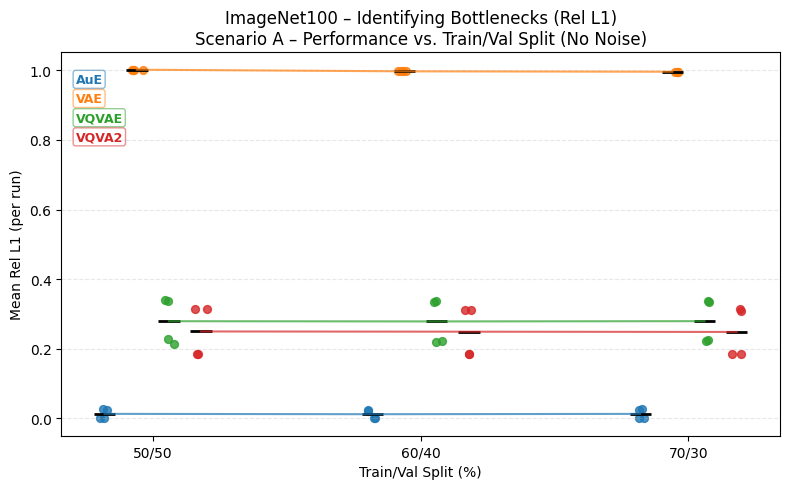

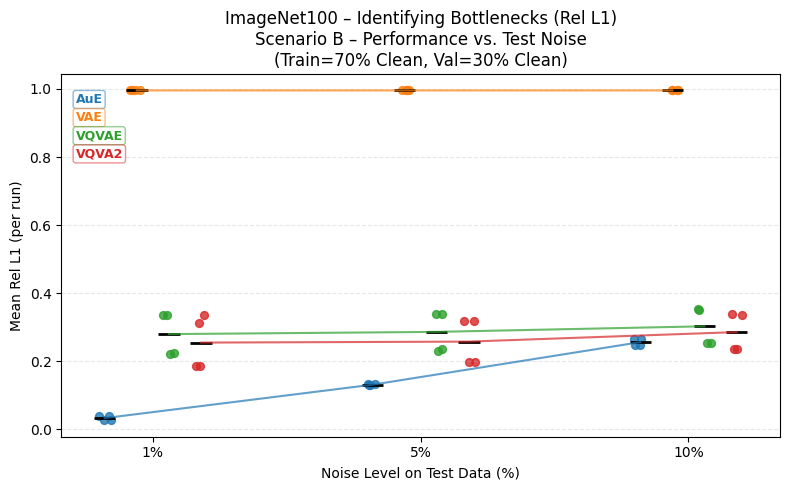

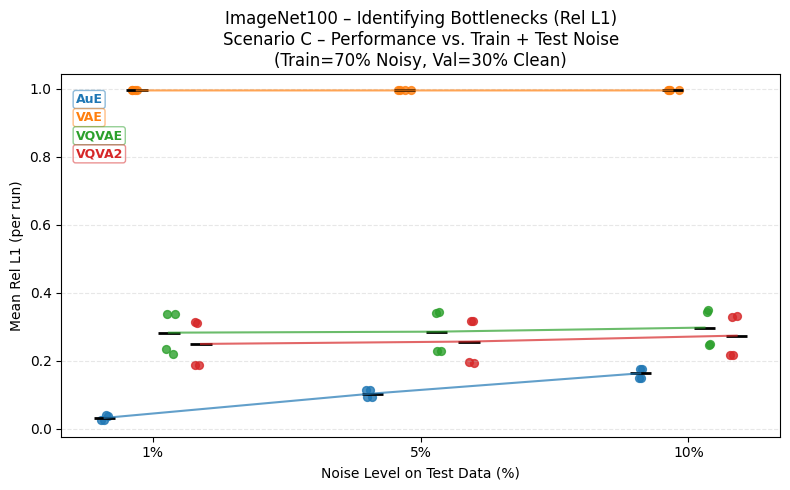

In [16]:
def plot_inet_scenarioA_relL1(metrics):
    df = metrics[metrics["scenario"] == "b_split"].copy()
    if df.empty:
        raise ValueError("No rows with scenario == 'b_split' in ImageNet100 metrics.")

    train_fracs = sorted(df["train_frac"].unique())
    x_centers = np.arange(len(train_fracs))
    offsets = np.linspace(-0.18, 0.18, len(MODEL_ORDER))

    fig, ax = plt.subplots(figsize=(8, 5))

    label_y_start = 0.92
    label_y_step = 0.05

    for mi, model in enumerate(MODEL_ORDER):
        m_df = df[df["model"] == model]
        if m_df.empty:
            print(f"NOTE: no data for model {model} in inet b_split – skipping.")
            continue

        color = MODEL_COLORS.get(model, "gray")
        x_line, y_line = [], []

        for si, tf in enumerate(train_fracs):
            sub = m_df[np.isclose(m_df["train_frac"], tf)]
            if sub.empty:
                continue

            x_center = x_centers[si] + offsets[mi]
            xs = x_center + (np.random.rand(len(sub)) - 0.5) * 0.05
            ys = sub["relL1_mean"].values

            ax.scatter(xs, ys, color=color, alpha=0.8, s=32)

            mean_y = ys.mean()
            ax.hlines(mean_y, x_center-0.04, x_center+0.04, colors="k", linewidth=2)

            x_line.append(x_center)
            y_line.append(mean_y)

        if len(x_line) >= 2:
            ax.plot(x_line, y_line, color=color, linewidth=1.5, alpha=0.7)

        ax.text(
            0.02,
            label_y_start - mi * label_y_step,
            model,
            transform=ax.transAxes,
            fontsize=9,
            color=color,
            weight="bold",
            bbox=dict(facecolor="white", edgecolor=color,
                      alpha=0.5, boxstyle="round,pad=0.2")
        )

    ax.set_xticks(x_centers)
    ax.set_xticklabels([human_split_label(tf) for tf in train_fracs])

    ax.set_xlabel("Train/Val Split (%)")
    ax.set_ylabel("Mean Rel L1 (per run)")
    ax.set_title("ImageNet100 – Identifying Bottlenecks (Rel L1)\n"
                 "Scenario A – Performance vs. Train/Val Split (No Noise)")
    ax.grid(True, axis="y", linestyle="--", alpha=0.3)

    plt.tight_layout()
    plt.show()


def _plot_inet_noise_scenario_relL1(metrics, scenario_name, title_suffix):
    df = metrics[metrics["scenario"] == scenario_name].copy()
    if df.empty:
        raise ValueError(f"No rows with scenario == '{scenario_name}' in ImageNet100 metrics.")

    noise_levels = sorted(df["test_noise_pct"].unique())
    x_centers = np.arange(len(noise_levels))
    offsets = np.linspace(-0.18, 0.18, len(MODEL_ORDER))

    fig, ax = plt.subplots(figsize=(8, 5))

    label_y_start = 0.92
    label_y_step = 0.05

    for mi, model in enumerate(MODEL_ORDER):
        m_df = df[df["model"] == model]
        if m_df.empty:
            print(f"NOTE: no data for model {model} in inet {scenario_name} – skipping.")
            continue

        color = MODEL_COLORS.get(model, "gray")
        x_line, y_line = [], []

        for ni, noise in enumerate(noise_levels):
            sub = m_df[np.isclose(m_df["test_noise_pct"], noise)]
            if sub.empty:
                continue

            x_center = x_centers[ni] + offsets[mi]
            xs = x_center + (np.random.rand(len(sub)) - 0.5) * 0.05
            ys = sub["relL1_mean"].values

            ax.scatter(xs, ys, color=color, alpha=0.8, s=32)
            mean_y = ys.mean()
            ax.hlines(mean_y, x_center-0.04, x_center+0.04, colors="k", linewidth=2)

            x_line.append(x_center)
            y_line.append(mean_y)

        if len(x_line) >= 2:
            ax.plot(x_line, y_line, color=color, linewidth=1.5, alpha=0.7)

        ax.text(
            0.02,
            label_y_start - mi * label_y_step,
            model,
            transform=ax.transAxes,
            fontsize=9,
            color=color,
            weight="bold",
            bbox=dict(facecolor="white", edgecolor=color,
                      alpha=0.5, boxstyle="round,pad=0.2")
        )

    ax.set_xticks(x_centers)
    ax.set_xticklabels([f"{int(n)}%" for n in noise_levels])

    ax.set_xlabel("Noise Level on Test Data (%)")
    ax.set_ylabel("Mean Rel L1 (per run)")
    ax.set_title(f"ImageNet100 – Identifying Bottlenecks (Rel L1)\n{title_suffix}")
    ax.grid(True, axis="y", linestyle="--", alpha=0.3)

    plt.tight_layout()
    plt.show()


def plot_inet_scenarioB_relL1():
    _plot_inet_noise_scenario_relL1(
        metrics_inet,
        scenario_name="c_test_noise",
        title_suffix="Scenario B – Performance vs. Test Noise\n(Train=70% Clean, Val=30% Clean)"
    )

def plot_inet_scenarioC_relL1():
    _plot_inet_noise_scenario_relL1(
        metrics_inet,
        scenario_name="d_train_and_test_noise",
        title_suffix="Scenario C – Performance vs. Train + Test Noise\n(Train=70% Noisy, Val=30% Clean)"
    )

plot_inet_scenarioA_relL1(metrics_inet)
plot_inet_scenarioB_relL1()
plot_inet_scenarioC_relL1()

In [ ]:
#2. Combined scenario analysis by Rel L2 (Models Evaluation)

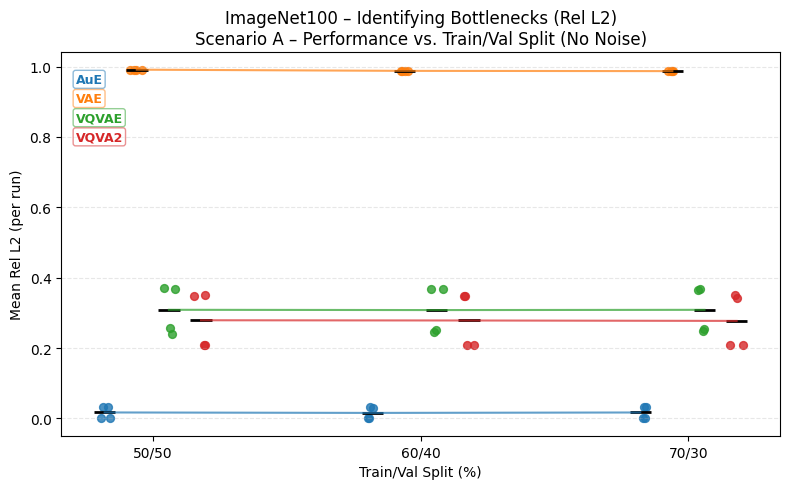

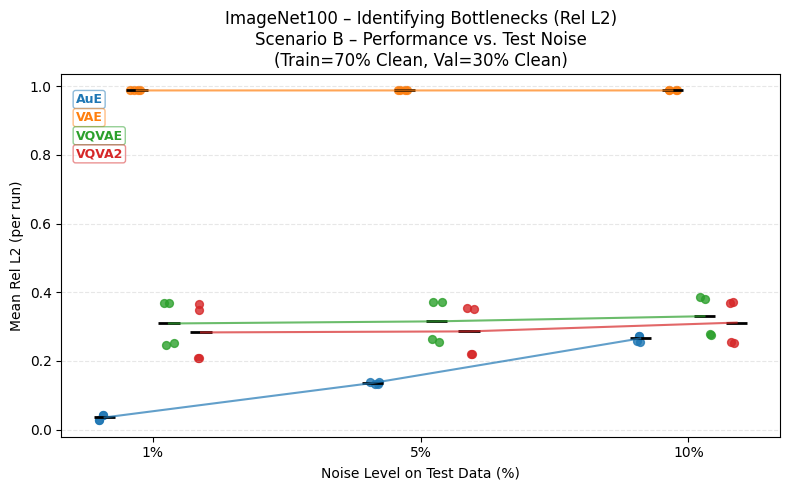

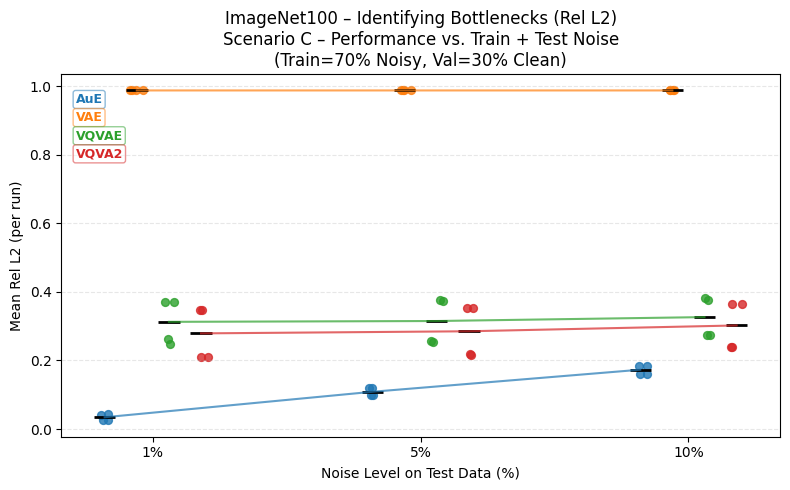

In [30]:
def plot_inet_scenarioA_relL2(metrics):
    df = metrics[metrics["scenario"] == "b_split"].copy()
    if df.empty:
        raise ValueError("No rows with scenario == 'b_split' in ImageNet100 metrics.")

    train_fracs = sorted(df["train_frac"].unique())
    x_centers = np.arange(len(train_fracs))
    offsets = np.linspace(-0.18, 0.18, len(MODEL_ORDER))

    fig, ax = plt.subplots(figsize=(8, 5))

    label_y_start = 0.92
    label_y_step = 0.05

    for mi, model in enumerate(MODEL_ORDER):
        m_df = df[df["model"] == model]
        if m_df.empty:
            print(f"NOTE: no data for model {model} in inet b_split – skipping.")
            continue

        color = MODEL_COLORS.get(model, "gray")
        x_line, y_line = [], []

        for si, tf in enumerate(train_fracs):
            sub = m_df[np.isclose(m_df["train_frac"], tf)]
            if sub.empty:
                continue

            x_center = x_centers[si] + offsets[mi]
            xs = x_center + (np.random.rand(len(sub)) - 0.5) * 0.05
            ys = sub["relL2_mean"].values

            ax.scatter(xs, ys, color=color, alpha=0.8, s=32)
            mean_y = ys.mean()
            ax.hlines(mean_y, x_center-0.04, x_center+0.04, colors="k", linewidth=2)

            x_line.append(x_center)
            y_line.append(mean_y)

        if len(x_line) >= 2:
            ax.plot(x_line, y_line, color=color, linewidth=1.5, alpha=0.7)

        ax.text(
            0.02,
            label_y_start - mi * label_y_step,
            model,
            transform=ax.transAxes,
            fontsize=9,
            color=color,
            weight="bold",
            bbox=dict(facecolor="white", edgecolor=color,
                      alpha=0.5, boxstyle="round,pad=0.2")
        )

    ax.set_xticks(x_centers)
    ax.set_xticklabels([human_split_label(tf) for tf in train_fracs])

    ax.set_xlabel("Train/Val Split (%)")
    ax.set_ylabel("Mean Rel L2 (per run)")
    ax.set_title("ImageNet100 – Identifying Bottlenecks (Rel L2)\n"
                 "Scenario A – Performance vs. Train/Val Split (No Noise)")
    ax.grid(True, axis="y", linestyle="--", alpha=0.3)

    plt.tight_layout()
    plt.show()


def _plot_inet_noise_scenario_relL2(metrics, scenario_name, title_suffix):
    df = metrics[metrics["scenario"] == scenario_name].copy()
    if df.empty:
        raise ValueError(f"No rows with scenario == '{scenario_name}' in ImageNet100 metrics.")

    noise_levels = sorted(df["test_noise_pct"].unique())
    x_centers = np.arange(len(noise_levels))
    offsets = np.linspace(-0.18, 0.18, len(MODEL_ORDER))

    fig, ax = plt.subplots(figsize=(8, 5))

    label_y_start = 0.92
    label_y_step = 0.05

    for mi, model in enumerate(MODEL_ORDER):
        m_df = df[df["model"] == model]
        if m_df.empty:
            print(f"NOTE: no data for model {model} in inet {scenario_name} – skipping.")
            continue

        color = MODEL_COLORS.get(model, "gray")
        x_line, y_line = [], []

        for ni, noise in enumerate(noise_levels):
            sub = m_df[np.isclose(m_df["test_noise_pct"], noise)]
            if sub.empty:
                continue

            x_center = x_centers[ni] + offsets[mi]
            xs = x_center + (np.random.rand(len(sub)) - 0.5) * 0.05
            ys = sub["relL2_mean"].values

            ax.scatter(xs, ys, color=color, alpha=0.8, s=32)
            mean_y = ys.mean()
            ax.hlines(mean_y, x_center-0.04, x_center+0.04, colors="k", linewidth=2)

            x_line.append(x_center)
            y_line.append(mean_y)

        if len(x_line) >= 2:
            ax.plot(x_line, y_line, color=color, linewidth=1.5, alpha=0.7)

        ax.text(
            0.02,
            label_y_start - mi * label_y_step,
            model,
            transform=ax.transAxes,
            fontsize=9,
            color=color,
            weight="bold",
            bbox=dict(facecolor="white", edgecolor=color,
                      alpha=0.5, boxstyle="round,pad=0.2")
        )

    ax.set_xticks(x_centers)
    ax.set_xticklabels([f"{int(n)}%" for n in noise_levels])

    ax.set_xlabel("Noise Level on Test Data (%)")
    ax.set_ylabel("Mean Rel L2 (per run)")
    ax.set_title(f"ImageNet100 – Identifying Bottlenecks (Rel L2)\n{title_suffix}")
    ax.grid(True, axis="y", linestyle="--", alpha=0.3)

    plt.tight_layout()
    plt.show()


def plot_inet_scenarioB_relL2():
    _plot_inet_noise_scenario_relL2(
        metrics_inet,
        scenario_name="c_test_noise",
        title_suffix="Scenario B – Performance vs. Test Noise\n(Train=70% Clean, Val=30% Clean)"
    )

def plot_inet_scenarioC_relL2():
    _plot_inet_noise_scenario_relL2(
        metrics_inet,
        scenario_name="d_train_and_test_noise",
        title_suffix="Scenario C – Performance vs. Train + Test Noise\n(Train=70% Noisy, Val=30% Clean)"
    )

plot_inet_scenarioA_relL2(metrics_inet)
plot_inet_scenarioB_relL2()
plot_inet_scenarioC_relL2()

In [17]:
# ImageNet100: Single combined table (all scenarios)

import pandas as pd

def make_compact_table_inet(metrics):
    scenario_specs = [
        dict(
            scenario="b_split",
            x_col="train_frac",
            data="train_frac",
            label_func=human_split_label
        ),
        dict(
            scenario="c_test_noise",
            x_col="test_noise_pct",
            data="test_noise_pct",
            label_func=lambda v: f"{int(v)}%"
        ),
        dict(
            scenario="d_train_and_test_noise",
            x_col="test_noise_pct",
            data="test_noise_pct",
            label_func=lambda v: f"{int(v)}%"
        ),
    ]

    rows = []

    for spec in scenario_specs:
        sc = spec["scenario"]
        df = metrics[metrics["scenario"] == sc].copy()
        if df.empty:
            print(f"NOTE: no rows found for ImageNet scenario '{sc}'")
            continue

        agg = (
            df.groupby(["model", spec["x_col"]])
              .agg(
                  relL1mean=("relL1_mean", "mean"),
                  relL2mean=("relL2_mean", "mean"),
              )
              .reset_index()
        )

        agg["scenario"] = sc
        agg["data"] = spec["data"]
        agg["distribution"] = agg[spec["x_col"]].apply(spec["label_func"])

        rows.append(
            agg[[
                "scenario",
                "model",
                "data",
                "distribution",
                "relL1mean",
                "relL2mean"
            ]]
        )

    if not rows:
        raise RuntimeError("No ImageNet100 scenario data found.")

    out = pd.concat(rows, ignore_index=True)

    if "MODEL_ORDER" in globals():
        out["model"] = pd.Categorical(
            out["model"], categories=MODEL_ORDER, ordered=True
        )

    scenario_order = ["b_split", "c_test_noise", "d_train_and_test_noise"]
    out["scenario"] = pd.Categorical(
        out["scenario"], categories=scenario_order, ordered=True
    )

    out = out.sort_values(
        ["scenario", "model", "distribution"]
    ).reset_index(drop=True)

    return out


inet_compact_table = make_compact_table_inet(metrics_inet)
display(inet_compact_table)

scenario  model            data distribution  relL1mean  \
0                  b_split    AuE      train_frac        50/50   0.012966   
1                  b_split    AuE      train_frac        60/40   0.011981   
2                  b_split    AuE      train_frac        70/30   0.012893   
3                  b_split    VAE      train_frac        50/50   1.001612   
4                  b_split    VAE      train_frac        60/40   0.996921   
5                  b_split    VAE      train_frac        70/30   0.995762   
6                  b_split  VQVAE      train_frac        50/50   0.279082   
7                  b_split  VQVAE      train_frac        60/40   0.278510   
8                  b_split  VQVAE      train_frac        70/30   0.279226   
9                  b_split  VQVA2      train_frac        50/50   0.249685   
10                 b_split  VQVA2      train_frac        60/40   0.249028   
11                 b_split  VQVA2      train_frac        70/30   0.248238   
12            c_test_noise    AuE  test_noise_pct           1%   0.032750   
13            c_test_noise    AuE  test_noise_pct          10%   0.255986   
14            c_test_noise    AuE  test_noise_pct           5%   0.130953   
15            c_test_noise    VAE  test_noise_pct           1%   0.995779   
16            c_test_noise    VAE  test_noise_pct          10%   0.995765   
17            c_test_noise    VAE  test_noise_pct           5%   0.995769   
18            c_test_noise  VQVAE  test_noise_pct           1%   0.279646   
19            c_test_noise  VQVAE  test_noise_pct          10%   0.302632   
20            c_test_noise  VQVAE  test_noise_pct           5%   0.286192   
21            c_test_noise  VQVA2  test_noise_pct           1%   0.254700   
22            c_test_noise  VQVA2  test_noise_pct          10%   0.285589   
23            c_test_noise  VQVA2  test_noise_pct           5%   0.257607   
24  d_train_and_test_noise    AuE  test_noise_pct           1%   0.031639   
25  d_train_and_test_noise    AuE  test_noise_pct          10%   0.162957   
26  d_train_and_test_noise    AuE  test_noise_pct           5%   0.103304   
27  d_train_and_test_noise    VAE  test_noise_pct           1%   0.995761   
28  d_train_and_test_noise    VAE  test_noise_pct          10%   0.995759   
29  d_train_and_test_noise    VAE  test_noise_pct           5%   0.995764   
30  d_train_and_test_noise  VQVAE  test_noise_pct           1%   0.282593   
31  d_train_and_test_noise  VQVAE  test_noise_pct          10%   0.297583   
32  d_train_and_test_noise  VQVAE  test_noise_pct           5%   0.285550   
33  d_train_and_test_noise  VQVA2  test_noise_pct           1%   0.249457   
34  d_train_and_test_noise  VQVA2  test_noise_pct          10%   0.273885   
35  d_train_and_test_noise  VQVA2  test_noise_pct           5%   0.256424   

    relL2mean  
0    0.016957  
1    0.015627  
2    0.016857  
3    0.991342  
4    0.987970  
5    0.987195  
6    0.308739  
7    0.307969  
8    0.308666  
9    0.279014  
10   0.278350  
11   0.277169  
12   0.035668  
13   0.265589  
14   0.135864  
15   0.987206  
16   0.987197  
17   0.987199  
18   0.309076  
19   0.330221  
20   0.315245  
21   0.283062  
22   0.311648  
23   0.286043  
24   0.034514  
25   0.173071  
26   0.108775  
27   0.987192  
28   0.987193  
29   0.987197  
30   0.312632  
31   0.326466  
32   0.315038  
33   0.278978  
34   0.302117  
35   0.285149

In [ ]:
#3. Impact of Optimizer (Adam vs SOAP)

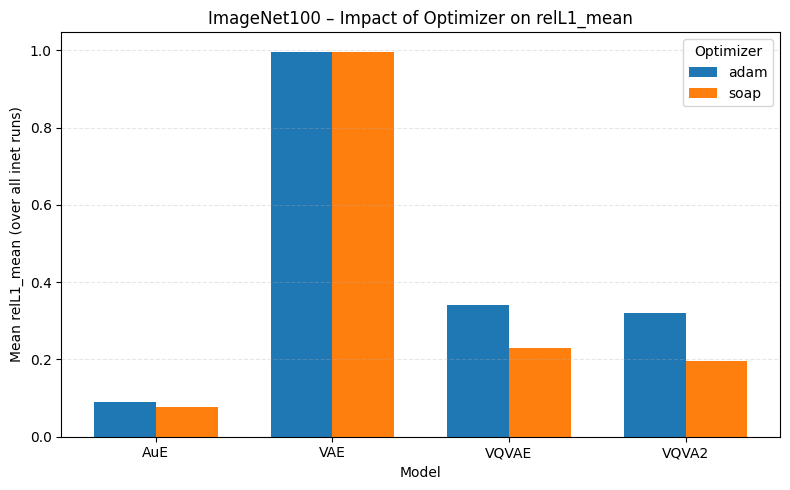

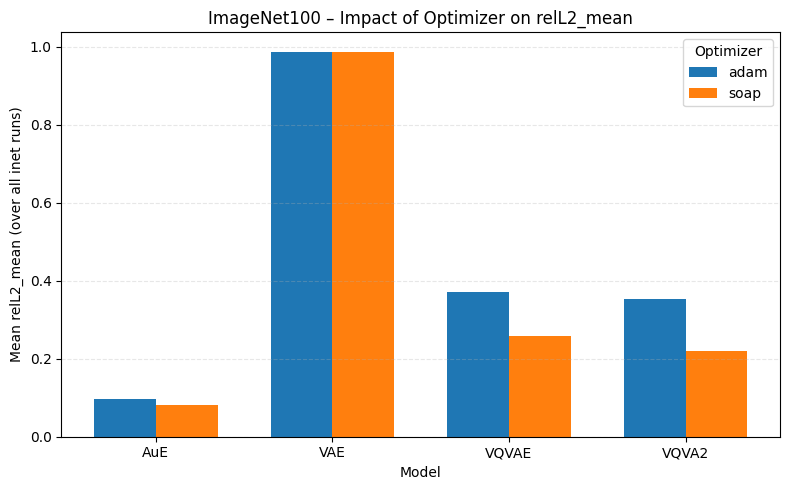

In [18]:
def plot_inet_optimizer_impact(metrics, metric_col="relL1_mean"):
    df = metrics.copy()
    pivot = df.groupby(["model", "optimizer"])[metric_col].mean().unstack()
    pivot = pivot.loc[MODEL_ORDER]

    fig, ax = plt.subplots(figsize=(8, 5))

    x = np.arange(len(pivot.index))
    width = 0.35
    opt_names = list(pivot.columns)

    for i, opt in enumerate(opt_names):
        vals = pivot[opt].values
        ax.bar(x + (i - (len(opt_names)-1)/2)*width,
               vals, width=width, label=opt)

    ax.set_xticks(x)
    ax.set_xticklabels(pivot.index)
    ax.set_xlabel("Model")
    ax.set_ylabel(f"Mean {metric_col} (over all inet runs)")
    ax.set_title(f"ImageNet100 – Impact of Optimizer on {metric_col}")
    ax.grid(True, axis="y", linestyle="--", alpha=0.3)
    ax.legend(title="Optimizer")

    plt.tight_layout()
    plt.show()


def plot_inet_precision_impact(metrics, metric_col="relL1_mean"):
    df = metrics.copy()
    pivot = df.groupby(["model", "precision"])[metric_col].mean().unstack()
    pivot = pivot.loc[MODEL_ORDER]

    fig, ax = plt.subplots(figsize=(8, 5))

    x = np.arange(len(pivot.index))
    width = 0.35
    prec_names = list(pivot.columns)

    for i, prec in enumerate(prec_names):
        vals = pivot[prec].values
        ax.bar(x + (i - (len(prec_names)-1)/2)*width,
               vals, width=width, label=prec)

    ax.set_xticks(x)
    ax.set_xticklabels(pivot.index)
    ax.set_xlabel("Model")
    ax.set_ylabel(f"Mean {metric_col} (over all inet runs)")
    ax.set_title(f"ImageNet100 – Impact of Precision on {metric_col}")
    ax.grid(True, axis="y", linestyle="--", alpha=0.3)
    ax.legend(title="Precision")

    plt.tight_layout()
    plt.show()

# Optimizer impact
plot_inet_optimizer_impact(metrics_inet, metric_col="relL1_mean")
plot_inet_optimizer_impact(metrics_inet, metric_col="relL2_mean")

In [19]:
# ImageNet100: Optimizer summary table
def make_inet_optimizer_table(metrics):
    tbl = (
        metrics
        .groupby(["model", "optimizer"])
        .agg(
            relL1mean=("relL1_mean", "mean"),
            relL2mean=("relL2_mean", "mean"),
        )
        .reset_index()
    )

    if "MODEL_ORDER" in globals():
        tbl["model"] = pd.Categorical(tbl["model"], categories=MODEL_ORDER, ordered=True)

    tbl = tbl.sort_values(["model", "optimizer"]).reset_index(drop=True)
    return tbl

inet_optimizer_table = make_inet_optimizer_table(metrics_inet)
display(inet_optimizer_table)

model optimizer  relL1mean  relL2mean
0    AuE      adam   0.091064   0.097743
1    AuE      soap   0.076809   0.080684
2    VAE      adam   0.996598   0.987805
3    VAE      soap   0.996489   0.987682
4  VQVAE      adam   0.340504   0.372246
5  VQVAE      soap   0.230832   0.257543
6  VQVA2      adam   0.319554   0.354159
7  VQVA2      soap   0.197027   0.219514

In [ ]:
#5.  Impact of Precision (fp32 vs fp64)

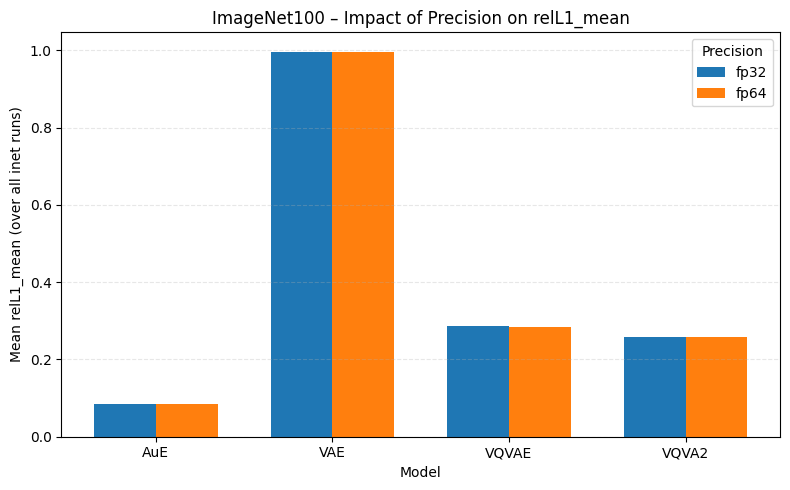

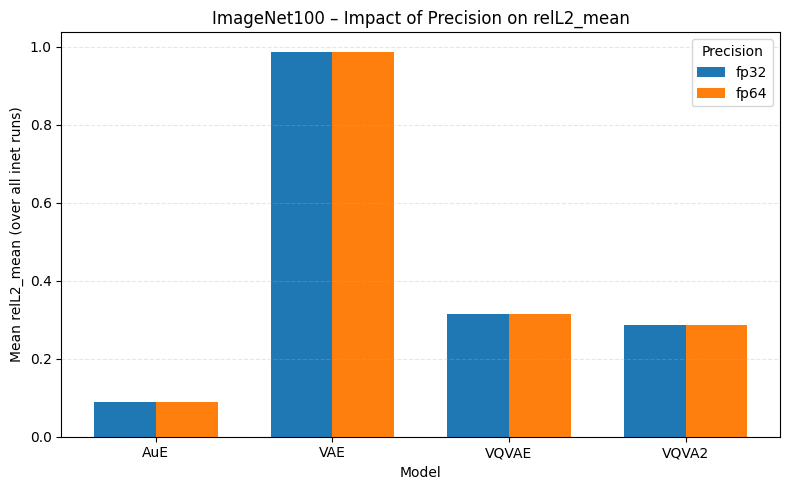

In [20]:
plot_inet_precision_impact(metrics_inet, metric_col="relL1_mean")
plot_inet_precision_impact(metrics_inet, metric_col="relL2_mean")

In [21]:
# ImageNet100: Precision summary table

def make_inet_precision_table(metrics):
    tbl = (
        metrics
        .groupby(["model", "precision"])
        .agg(
            relL1mean=("relL1_mean", "mean"),
            relL2mean=("relL2_mean", "mean"),
        )
        .reset_index()
    )

    if "MODEL_ORDER" in globals():
        tbl["model"] = pd.Categorical(tbl["model"], categories=MODEL_ORDER, ordered=True)

    tbl = tbl.sort_values(["model", "precision"]).reset_index(drop=True)
    return tbl

inet_precision_table = make_inet_precision_table(metrics_inet)
display(inet_precision_table)

model precision  relL1mean  relL2mean
0    AuE      fp32   0.083856   0.089052
1    AuE      fp64   0.084017   0.089375
2    VAE      fp32   0.996543   0.987744
3    VAE      fp64   0.996544   0.987743
4  VQVAE      fp32   0.286652   0.315983
5  VQVAE      fp64   0.284684   0.313807
6  VQVA2      fp32   0.258656   0.287106
7  VQVA2      fp64   0.257925   0.286567

In [ ]:
#6. Overall model comparison: best / average / worst

relL1_min  relL1_mean  relL1_max  relL2_min  relL2_mean  relL2_max
model                                                                    
AuE     0.000244    0.083936   0.263842   0.000352    0.089214   0.273981
VAE     0.995726    0.996544   1.001974   0.987147    0.987743   0.991629
VQVAE   0.212517    0.285668   0.353781   0.238871    0.314895   0.385588
VQVA2   0.184920    0.258290   0.337894   0.207860    0.286837   0.370671

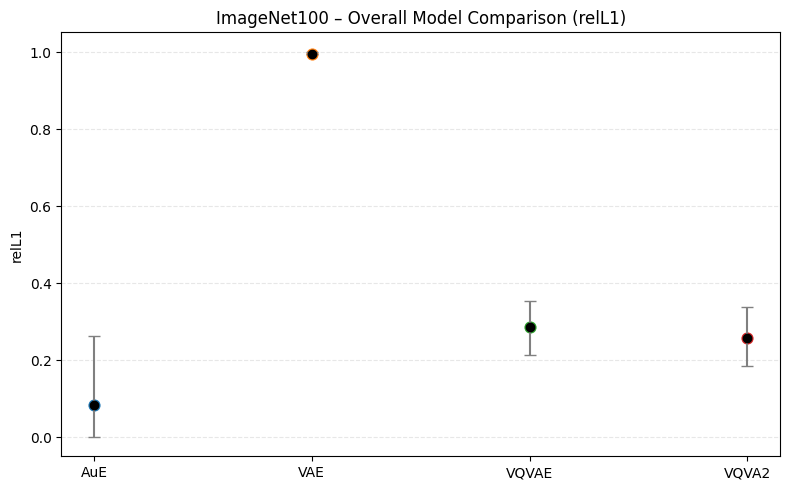

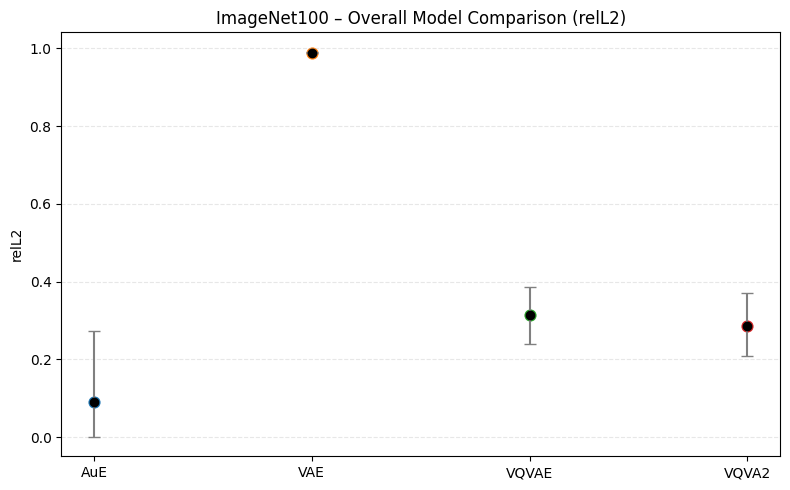

In [22]:
def summarize_models_inet(metrics):
    rows = []
    for model in MODEL_ORDER:
        sub = metrics[metrics["model"] == model]
        if sub.empty:
            continue
        rows.append({
            "model": model,
            "relL1_min": sub["relL1_mean"].min(),
            "relL1_mean": sub["relL1_mean"].mean(),
            "relL1_max": sub["relL1_mean"].max(),
            "relL2_min": sub["relL2_mean"].min(),
            "relL2_mean": sub["relL2_mean"].mean(),
            "relL2_max": sub["relL2_mean"].max(),
        })
    return pd.DataFrame(rows).set_index("model").loc[MODEL_ORDER]

summary_inet = summarize_models_inet(metrics_inet)
display(summary_inet)

def plot_overall_model_summary_inet(summary_df, metric="relL1"):
    min_col = f"{metric}_min"
    mean_col = f"{metric}_mean"
    max_col = f"{metric}_max"

    df = summary_df.copy()
    means = df[mean_col].values
    mins = df[min_col].values
    maxs = df[max_col].values

    x = np.arange(len(df.index))
    lower_err = means - mins
    upper_err = maxs - means
    yerr = np.vstack([lower_err, upper_err])

    fig, ax = plt.subplots(figsize=(8, 5))
    ax.errorbar(x, means, yerr=yerr,
                fmt="o", ecolor="gray", capsize=4,
                linestyle="none", color="k")

    for i, model in enumerate(df.index):
        ax.scatter(x[i], means[i], color=MODEL_COLORS.get(model, "gray"), s=60)

    ax.set_xticks(x)
    ax.set_xticklabels(df.index)
    ax.set_ylabel(metric)
    ax.set_title(f"ImageNet100 – Overall Model Comparison ({metric})")
    ax.grid(True, axis="y", linestyle="--", alpha=0.3)

    plt.tight_layout()
    plt.show()

# Rel L1 summary
plot_overall_model_summary_inet(summary_inet, metric="relL1")

# Rel L2 summary
plot_overall_model_summary_inet(summary_inet, metric="relL2")

In [ ]:
#7. Reconstruction plot

In [35]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

inet_output_root = Path("./best_models/output_inet")
inet_data_root   = Path("./datasets/inet100")

model_cfgs_inet = {
    "AuE": {
        "dir":   inet_output_root / "output_inet_ae",
        "ckpt":  "best_overall_AuE.pt",
        "label": "AE",
    },
    "VAE": {
        "dir":   inet_output_root / "output_inet_vae",
        "ckpt":  "best_overall_VAE.pt",
        "label": "VAE",
    },
    "VQVE": {
        "dir":   inet_output_root / "output_inet_vqvae",
        "ckpt":  "best_overall_VQVE.pt",
        "label": "VQVAE",
    },
    "VQVA2": {
        "dir":   inet_output_root / "output_inet_vqvae2",
        "ckpt":  "best_overall_VQVA2.pt",
        "label": "VQVAE2",
    },
}

train_pt = inet_data_root / "train.pt"
test_pt  = inet_data_root / "test.pt"

if not train_pt.exists() or not test_pt.exists():
    raise FileNotFoundError("Missing train.pt or test.pt in inet100/ folder")

X_train = torch.load(train_pt, map_location="cpu")
X_test  = torch.load(test_pt, map_location="cpu")

print("Loaded ImageNet-100 tensors:")
print("Train:", X_train.shape, "Test:", X_test.shape)

Loaded ImageNet-100 tensors:
Train: torch.Size([130000, 1, 28, 28]) Test: torch.Size([5000, 1, 28, 28])


In [36]:
class Snake(nn.Module):
    """
    Snake activation: x + (1/a) * sin^2(a x)
    """
    def __init__(self, alpha=1.0):
        super().__init__()
        self.alpha = nn.Parameter(torch.tensor(alpha))

    def forward(self, x):
        a = self.alpha.abs() + 1e-6
        return x + (1.0 / a) * torch.sin(a * x).pow(2)


class EncoderBlock(nn.Module):
    def __init__(self, cin, cout):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(cin, cout, 3, padding=1),
            nn.GroupNorm(num_groups=min(8, cout), num_channels=cout), Snake(),
            nn.Conv2d(cout, cout, 3, padding=1),
            nn.GroupNorm(num_groups=min(8, cout), num_channels=cout), Snake(),
        )

    def forward(self, x):
        return self.net(x)


class DecoderBlock(nn.Module):
    def __init__(self, cin, cout):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(cin, cout, 3, padding=1),
            nn.GroupNorm(num_groups=min(8, cout), num_channels=cout), Snake(),
            nn.Conv2d(cout, cout, 3, padding=1),
            nn.GroupNorm(num_groups=min(8, cout), num_channels=cout), Snake(),
        )

    def forward(self, x):
        return self.net(x)


# AE (AuE)
class AuE(nn.Module):
    def __init__(self, ch=56):
        super().__init__()
        self.enc = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1), Snake(),
            nn.Conv2d(32, 64, 4, stride=2, padding=1), Snake(),
            nn.Conv2d(64, ch, 4, stride=2, padding=1), Snake(),   # -> (ch, 7, 7)
        )
        self.dec = nn.Sequential(
            nn.ConvTranspose2d(ch, 64, 2, stride=2), Snake(),
            nn.ConvTranspose2d(64, 32, 2, stride=2), Snake(),
            nn.Conv2d(32, 1, 1),
            nn.Tanh(),
        )

    def forward(self, x):
        z = self.enc(x)
        xhat = self.dec(z)
        return xhat, {}


# VAE
class VAE(nn.Module):
    def __init__(self, ch=56):
        super().__init__()
        self.enc = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1), Snake(),
            nn.Conv2d(32, 64, 4, stride=2, padding=1), Snake(),
        )
        self.mu     = nn.Conv2d(64, ch, 3, padding=1)
        self.logvar = nn.Conv2d(64, ch, 3, padding=1)
        self.dec = nn.Sequential(
            nn.ConvTranspose2d(ch, 64, 2, stride=2), Snake(),
            nn.Conv2d(64, 32, 3, padding=1), Snake(),
            nn.Conv2d(32, 1, 1),
            nn.Tanh(),
        )

    def reparam(self, mu, logv):
        std = (0.5 * logv).exp()
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        h  = self.enc(x)
        mu = self.mu(h)
        lv = self.logvar(h)
        z  = self.reparam(mu, lv)
        xhat = self.dec(z)
        kld = -0.5 * (1 + lv - mu.pow(2) - lv.exp())
        kld = kld.sum(dim=[1, 2, 3]).mean()
        return xhat, {"kld": kld}


# VectorQuantizer (for VQ models)
class VectorQuantizer(nn.Module):
    def __init__(self, K, D, beta=0.25):
        super().__init__()
        self.K, self.D, self.beta = K, D, beta
        self.emb = nn.Embedding(K, D)
        # use D instead of K for init
        self.emb.weight.data.uniform_(-1.0 / D, 1.0 / D)

    def forward(self, z):
        # z: (B, D, H, W)
        zf   = z.permute(0, 2, 3, 1).contiguous()      # (B, H, W, D)
        flat = zf.view(-1, self.D)                     # (BHW, D)
        dist = (flat.pow(2).sum(1, keepdim=True)
                - 2 * flat @ self.emb.weight.t()
                + self.emb.weight.pow(2).sum(1))
        ind  = dist.argmin(1)
        zq   = self.emb(ind).view_as(zf)
        # losses
        commit = self.beta * ((zq - zf.detach())**2).mean()
        codebk = ((zf - zq.detach())**2).mean()
        loss = commit + codebk
        # straight-through
        zq   = zf + (zq - zf).detach()
        return zq.permute(0, 3, 1, 2).contiguous(), loss


# VQVE (single-level VQ-VAE)
class VQVE(nn.Module):
    def __init__(self, ch=56, K=512, beta=0.25):
        super().__init__()
        self.enc = nn.Sequential(
            nn.Conv2d(1, 32, 4, stride=2, padding=1), Snake(),
            nn.Conv2d(32, ch, 4, stride=2, padding=1), Snake(),  # -> (ch, 7,7)
        )
        self.vq  = VectorQuantizer(K, ch, beta)
        self.dec = nn.Sequential(
            nn.ConvTranspose2d(ch, 32, 4, stride=2, padding=1), Snake(),
            nn.ConvTranspose2d(32, 1, 4, stride=2, padding=1), Snake(),
            nn.Tanh(),
        )

    def forward(self, x):
        z = self.enc(x)
        zq, lvq = self.vq(z)
        xhat = self.dec(zq)
        return xhat, {"vq": lvq}


# VQVA2 (two-level VQ-VAE-2)
class VQVA2(nn.Module):
    def __init__(self, ch=56, top_ch=56, K=512, beta=0.25):
        super().__init__()
        # bottom encoder
        self.enc_b = nn.Sequential(
            nn.Conv2d(1, 32, 4, stride=2, padding=1), Snake(),
            nn.Conv2d(32, ch, 4, stride=2, padding=1), Snake(),  # -> (ch, 7,7)
        )
        # top encoder
        self.enc_t = nn.Sequential(
            nn.Conv2d(ch, top_ch, 4, stride=2, padding=1), Snake()  # -> (top_ch, 4,4)
        )
        self.vq_t = VectorQuantizer(K, top_ch, beta)
        self.vq_b = VectorQuantizer(K, ch, beta)
        self.up_t = nn.Sequential(
            nn.ConvTranspose2d(top_ch, ch, 4, stride=2, padding=1), Snake(),
            nn.Conv2d(ch, ch, 3, padding=1), Snake()
        )
        self.dec = nn.Sequential(
            nn.ConvTranspose2d(ch * 2, 64, 4, stride=2, padding=1), Snake(),
            nn.ConvTranspose2d(64, 32, 4, stride=2, padding=1), Snake(),
            nn.Conv2d(32, 1, 1), Snake(),
            nn.Tanh(),
        )

    def forward(self, x):
        zb = self.enc_b(x)
        zt = self.enc_t(zb)
        zqt, lt = self.vq_t(zt)
        up = self.up_t(zqt)

        Hb, Wb = zb.shape[-2:]
        Hu, Wu = up.shape[-2:]
        dh, dw = Hb - Hu, Wb - Wu
        if dh > 0 or dw > 0:
            up = nn.functional.pad(up, (0, max(0, dw), 0, max(0, dh)))
        elif dh < 0 or dw < 0:
            up = up[:, :, :Hb, :Wb]

        zb_input = zb + up
        zqb, lb = self.vq_b(zb_input)
        dec_in = torch.cat([zqb, up], dim=1)
        xhat = self.dec(dec_in)
        return xhat, {"vq_top": lt, "vq_bottom": lb}

In [37]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

def build_inet_model(key):
    if key == "AuE":
        return AuE()
    if key == "VAE":
        return VAE()
    if key == "VQVE":
        return VQVE()
    if key == "VQVA2":
        return VQVA2()
    raise ValueError(f"Unknown model key: {key}")

loaded_models = {}

for key, cfg_entry in model_cfgs_inet.items():
    ckpt_path = cfg_entry["dir"] / cfg_entry["ckpt"]
    if not ckpt_path.exists():
        print(f"Missing checkpoint for {key}: {ckpt_path}")
        continue

    print(f"Loading {key} from {ckpt_path}")
    state = torch.load(ckpt_path, map_location="cpu", weights_only=False)

    model = build_inet_model(key)
    if "model_state" in state:
        model.load_state_dict(state["model_state"])
    elif "model" in state:
        model.load_state_dict(state["model"])
    else:
        model.load_state_dict(state)

    model = model.to(device).float()
    model.eval()
    loaded_models[key] = model

print("Loaded models:", list(loaded_models.keys()))

Using device: cuda
Loading AuE from best_models/output_inet/output_inet_ae/best_overall_AuE.pt
Loading VAE from best_models/output_inet/output_inet_vae/best_overall_VAE.pt
Loading VQVE from best_models/output_inet/output_inet_vqvae/best_overall_VQVE.pt
Loading VQVA2 from best_models/output_inet/output_inet_vqvae2/best_overall_VQVA2.pt
Loaded models: ['AuE', 'VAE', 'VQVE', 'VQVA2']


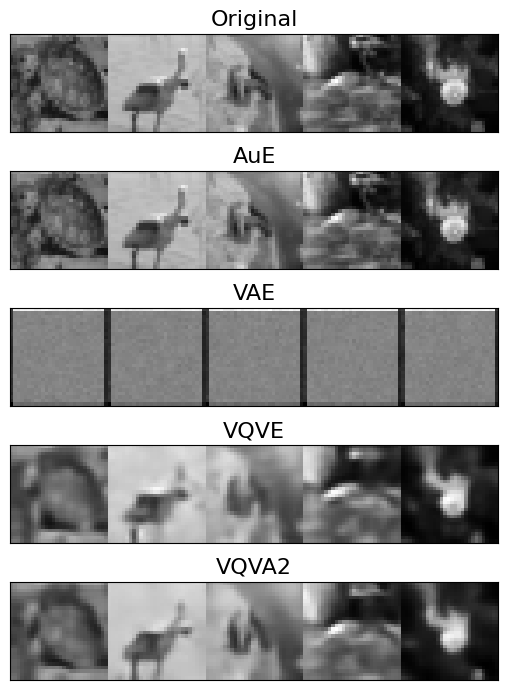

In [38]:
def plot_recons_inet_vertical(n=5):
    if len(loaded_models) == 0:
        print("No models loaded.")
        return

    N = X_test.shape[0]
    n = min(n, N)
    idx = torch.randperm(N)[:n]

    x = X_test[idx].to(device=device, dtype=torch.float32)
    x_cpu = x.cpu()

    recons = {}
    with torch.no_grad():
        for key, model in loaded_models.items():
            y, _ = model(x)
            recons[key] = y.cpu()

    display_order = ["Original", "AuE", "VAE", "VQVE", "VQVA2"]

    fig_height = 1.4 * len(display_order)
    fig, axes = plt.subplots(len(display_order), 1, figsize=(n * 2.0, fig_height))

    if len(display_order) == 1:
        axes = [axes]

    def to_img(t):
        t = (t + 1.0) / 2.0
        return np.clip(t.numpy(), 0.0, 1.0)

    row = 0
    for key in display_order:

        axes[row].set_title(key, fontsize=16)

        axes[row].set_xticks([])
        axes[row].set_yticks([])

        canvas = np.zeros((28, 28 * n))

        if key == "Original":
            block = x_cpu
        else:
            if key not in loaded_models:
                row += 1
                continue
            block = recons[key]

        for i in range(n):
            canvas[:, 28*i:28*(i+1)] = to_img(block[i, 0])

        axes[row].imshow(canvas, cmap="gray")
        row += 1

    plt.tight_layout()
    plt.show()


plot_recons_inet_vertical(n=5)

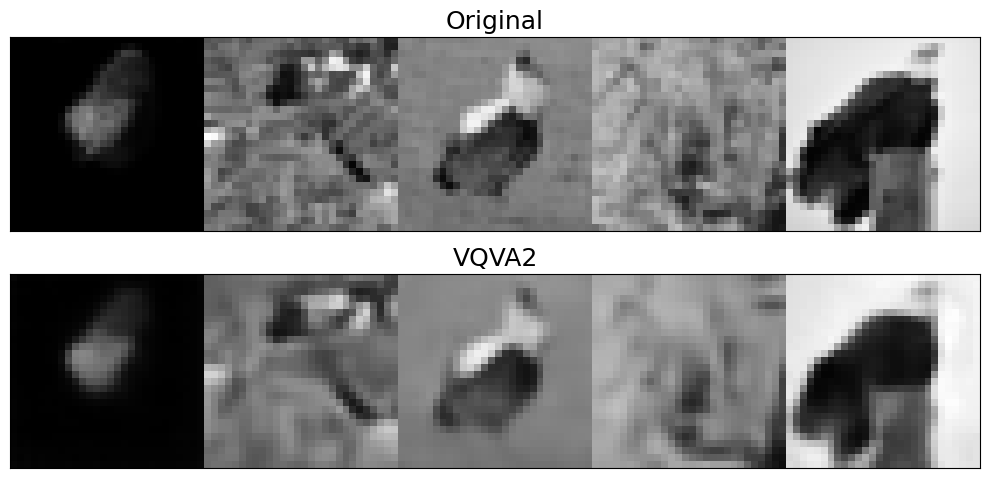

In [39]:
# Reconstruction images with best model (VQVAE2)
def plot_recons_inet_vqva2_only(n=5):
    if "VQVA2" not in loaded_models:
        print("VQVA2 not loaded — check ckpt path or model_cfgs_inet entry.")
        return

    # pick n random samples
    N = X_test.shape[0]
    n = min(n, N)
    idx = torch.randperm(N)[:n]

    x = X_test[idx].to(device=device, dtype=torch.float32)
    x_cpu = x.cpu()

    # run VQVA2 inference
    with torch.no_grad():
        y, _ = loaded_models["VQVA2"](x)
        y_cpu = y.cpu()

    # vertical layout: original row + VQVA2 row
    rows = ["Original", "VQVA2"]

    fig_height = 5
    fig, axes = plt.subplots(len(rows), 1, figsize=(n * 2.0, fig_height))

    if len(rows) == 1:
        axes = [axes]

    def to_img(t):
        t = (t + 1.0) / 2.0
        return np.clip(t.numpy(), 0.0, 1.0)

    row = 0
    for title in rows:

        axes[row].set_title(title, fontsize=18)
        axes[row].set_xticks([])
        axes[row].set_yticks([])

        canvas = np.zeros((28, 28 * n))

        block = x_cpu if title == "Original" else y_cpu

        # Fill horizontal strip
        for i in range(n):
            canvas[:, 28 * i : 28 * (i + 1)] = to_img(block[i, 0])

        axes[row].imshow(canvas, cmap="gray")

        row += 1

    plt.tight_layout()
    plt.show()


plot_recons_inet_vqva2_only(n=5)

In [ ]:
# Part-3: Kolmogorov Analysis

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

BASE_KOLM = Path("./best_models/output_kolmogorov")

MODEL_DIRS_KOLM = {
    "AuE":   BASE_KOLM / "output_kolm_ae",
    "VAE":   BASE_KOLM / "output_kolm_vae",
    "VQVAE": BASE_KOLM / "output_kolm_vqvae",
    "VQVA2": BASE_KOLM / "output_kolm_vqvae2",
}

def load_kolm_metrics():
    dfs = []
    for model_name, mdir in MODEL_DIRS_KOLM.items():
        csv_path = mdir / "metrics_all.csv"
        if not csv_path.exists():
            print(f"WARNING: metrics_all.csv not found for {model_name} at {csv_path}")
            continue
        df = pd.read_csv(csv_path)
        if "model" not in df.columns:
            df["model"] = model_name
        dfs.append(df)
    if not dfs:
        raise RuntimeError("No metrics_all.csv files found for Kolmogorov – check paths.")
    metrics = pd.concat(dfs, ignore_index=True)
    return metrics

metrics_kolm = load_kolm_metrics()
metrics_kolm_by_model = split_metrics_by_model(metrics_kolm)

display(metrics_kolm.head())
print("\nCounts per model & scenario (Kolmogorov):")
display(metrics_kolm.groupby(["model", "scenario"])["relL1_mean"].count())

run_name  \
0  aue_b_split_50_tn0.0_vn0.0_ts0.0_fp32_adam_202...   
1  aue_b_split_60_tn0.0_vn0.0_ts0.0_fp32_adam_202...   
2  aue_b_split_70_tn0.0_vn0.0_ts0.0_fp32_adam_202...   
3  aue_c_test_noise_70_tn0.0_vn0.0_ts1.0_fp32_ada...   
4  aue_c_test_noise_70_tn0.0_vn0.0_ts5.0_fp32_ada...   

                                            run_path model      scenario sc  \
0  /home/krajnish/kolmogorov_data/output_kolm_ae/...   AuE       b_split  b   
1  /home/krajnish/kolmogorov_data/output_kolm_ae/...   AuE       b_split  b   
2  /home/krajnish/kolmogorov_data/output_kolm_ae/...   AuE       b_split  b   
3  /home/krajnish/kolmogorov_data/output_kolm_ae/...   AuE  c_test_noise  c   
4  /home/krajnish/kolmogorov_data/output_kolm_ae/...   AuE  c_test_noise  c   

   train_frac  val_frac  train_noise_pct  val_noise_pct  test_noise_pct  \
0         0.5       0.5              0.0            0.0             0.0   
1         0.6       0.4              0.0            0.0             0.0   
2         0.7       0.3              0.0            0.0             0.0   
3         0.7       0.3              0.0            0.0             1.0   
4         0.7       0.3              0.0            0.0             5.0   

   recon_huber_mean  aux_loss_mean  total_loss_mean  relL1_mean  relL2_mean  \
0          0.000091            0.0         0.000091    0.040153    0.052238   
1          0.000092            0.0         0.000092    0.039866    0.052129   
2          0.000091            0.0         0.000091    0.039817    0.052045   
3          0.000104            0.0         0.000104    0.053640    0.063979   
4          0.000383            0.0         0.000383    0.151592    0.163168   

   train_size  val_size  test_size precision optimizer  
0        5000      2000       2000      fp32      adam  
1        6000      2000       2000      fp32      adam  
2        7000      2000       2000      fp32      adam  
3        7000      2000       2000      fp32      adam  
4        7000      2000       2000      fp32      adam


Counts per model & scenario (Kolmogorov):


model  scenario              
AuE    b_split                   12
       c_test_noise              12
       d_train_and_test_noise    12
VAE    b_split                   12
       c_test_noise              12
       d_train_and_test_noise    12
VQVA2  b_split                   12
       c_test_noise              12
       d_train_and_test_noise    12
VQVAE  b_split                   12
       c_test_noise              12
       d_train_and_test_noise    12
Name: relL1_mean, dtype: int64

In [ ]:
#1. Combined scenario analysis by Rel L1 (bottleneck identification)

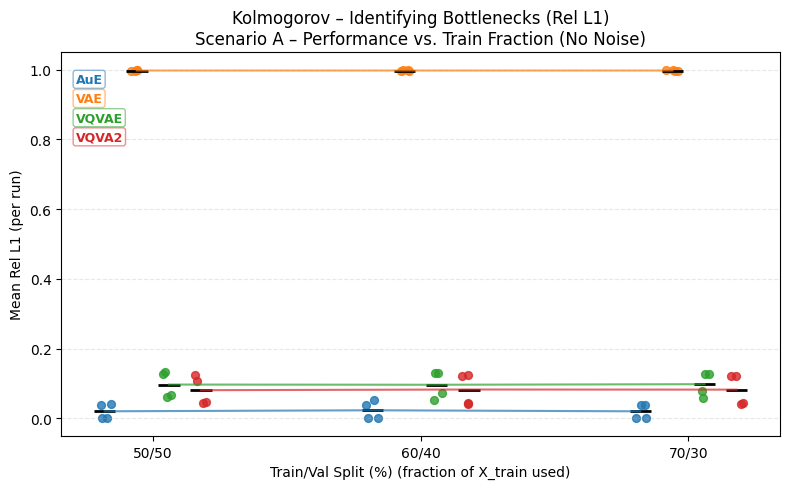

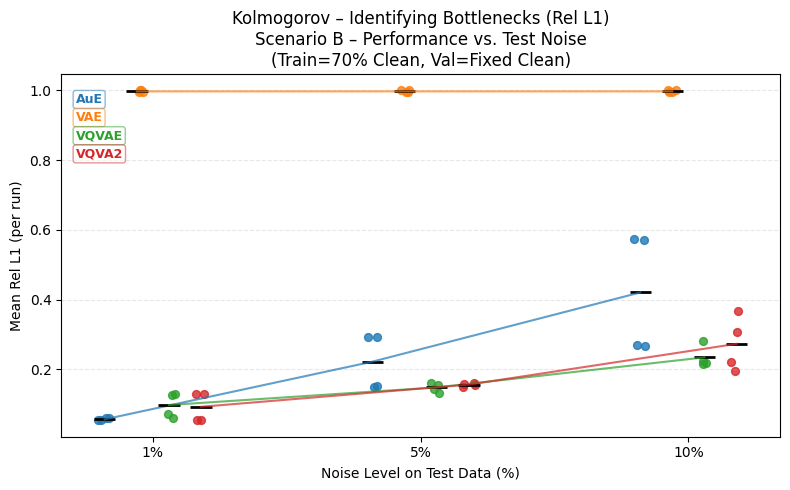

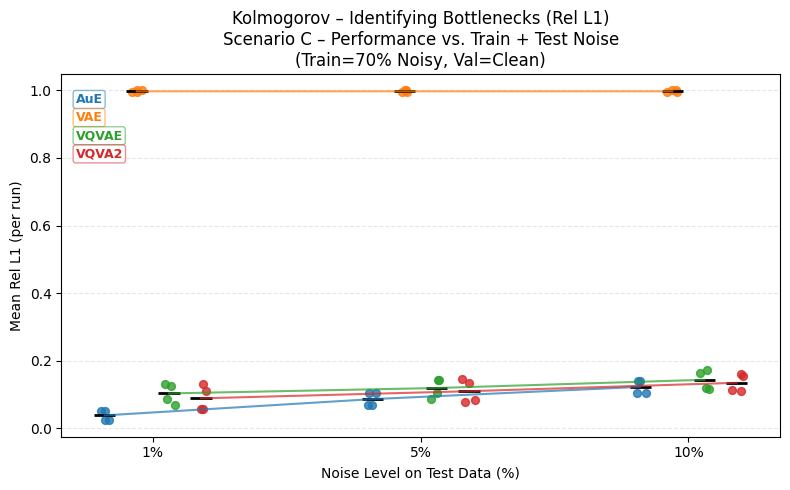

In [25]:

def plot_kolm_scenarioA_relL1(metrics):
    df = metrics[metrics["scenario"] == "b_split"].copy()
    if df.empty:
        raise ValueError("No rows with scenario == 'b_split' in Kolmogorov metrics.")

    train_fracs = sorted(df["train_frac"].unique())
    x_centers = np.arange(len(train_fracs))
    offsets = np.linspace(-0.18, 0.18, len(MODEL_ORDER))

    fig, ax = plt.subplots(figsize=(8, 5))

    label_y_start = 0.92
    label_y_step = 0.05

    for mi, model in enumerate(MODEL_ORDER):
        m_df = df[df["model"] == model]
        if m_df.empty:
            print(f"NOTE: no data for model {model} in kolm b_split – skipping.")
            continue

        color = MODEL_COLORS.get(model, "gray")
        x_line, y_line = [], []

        for si, tf in enumerate(train_fracs):
            sub = m_df[np.isclose(m_df["train_frac"], tf)]
            if sub.empty:
                continue

            x_center = x_centers[si] + offsets[mi]

            xs = x_center + (np.random.rand(len(sub)) - 0.5) * 0.05
            ys = sub["relL1_mean"].values
            ax.scatter(xs, ys, color=color, alpha=0.8, s=32)

            mean_y = ys.mean()
            ax.hlines(mean_y, x_center-0.04, x_center+0.04, colors="k", linewidth=2)

            x_line.append(x_center)
            y_line.append(mean_y)

        if len(x_line) >= 2:
            ax.plot(x_line, y_line, color=color, linewidth=1.5, alpha=0.7)

        ax.text(
            0.02,
            label_y_start - mi * label_y_step,
            model,
            transform=ax.transAxes,
            fontsize=9,
            color=color,
            weight="bold",
            bbox=dict(facecolor="white", edgecolor=color,
                      alpha=0.5, boxstyle="round,pad=0.2")
        )

    ax.set_xticks(x_centers)
    ax.set_xticklabels([human_split_label(tf) for tf in train_fracs])

    ax.set_xlabel("Train/Val Split (%) (fraction of X_train used)")
    ax.set_ylabel("Mean Rel L1 (per run)")
    ax.set_title("Kolmogorov – Identifying Bottlenecks (Rel L1)\n"
                 "Scenario A – Performance vs. Train Fraction (No Noise)")
    ax.grid(True, axis="y", linestyle="--", alpha=0.3)

    plt.tight_layout()
    plt.show()


def _plot_kolm_noise_scenario_relL1(metrics, scenario_name, title_suffix):
    df = metrics[metrics["scenario"] == scenario_name].copy()
    if df.empty:
        raise ValueError(f"No rows with scenario == '{scenario_name}' in Kolmogorov metrics.")

    noise_levels = sorted(df["test_noise_pct"].unique())
    x_centers = np.arange(len(noise_levels))
    offsets = np.linspace(-0.18, 0.18, len(MODEL_ORDER))

    fig, ax = plt.subplots(figsize=(8, 5))

    label_y_start = 0.92
    label_y_step = 0.05

    for mi, model in enumerate(MODEL_ORDER):
        m_df = df[df["model"] == model]
        if m_df.empty:
            print(f"NOTE: no data for model {model} in kolm {scenario_name} – skipping.")
            continue

        color = MODEL_COLORS.get(model, "gray")
        x_line, y_line = [], []

        for ni, noise in enumerate(noise_levels):
            sub = m_df[np.isclose(m_df["test_noise_pct"], noise)]
            if sub.empty:
                continue

            x_center = x_centers[ni] + offsets[mi]

            xs = x_center + (np.random.rand(len(sub)) - 0.5) * 0.05
            ys = sub["relL1_mean"].values
            ax.scatter(xs, ys, color=color, alpha=0.8, s=32)

            mean_y = ys.mean()
            ax.hlines(mean_y, x_center-0.04, x_center+0.04, colors="k", linewidth=2)

            x_line.append(x_center)
            y_line.append(mean_y)

        if len(x_line) >= 2:
            ax.plot(x_line, y_line, color=color, linewidth=1.5, alpha=0.7)

        # top-left label
        ax.text(
            0.02,
            label_y_start - mi * label_y_step,
            model,
            transform=ax.transAxes,
            fontsize=9,
            color=color,
            weight="bold",
            bbox=dict(facecolor="white", edgecolor=color,
                      alpha=0.5, boxstyle="round,pad=0.2")
        )

    ax.set_xticks(x_centers)
    ax.set_xticklabels([f"{int(n)}%" for n in noise_levels])

    ax.set_xlabel("Noise Level on Test Data (%)")
    ax.set_ylabel("Mean Rel L1 (per run)")
    ax.set_title(f"Kolmogorov – Identifying Bottlenecks (Rel L1)\n{title_suffix}")
    ax.grid(True, axis="y", linestyle="--", alpha=0.3)

    plt.tight_layout()
    plt.show()


def plot_kolm_scenarioB_relL1():
    _plot_kolm_noise_scenario_relL1(
        metrics_kolm,
        scenario_name="c_test_noise",
        title_suffix="Scenario B – Performance vs. Test Noise\n(Train=70% Clean, Val=Fixed Clean)"
    )

def plot_kolm_scenarioC_relL1():
    _plot_kolm_noise_scenario_relL1(
        metrics_kolm,
        scenario_name="d_train_and_test_noise",
        title_suffix="Scenario C – Performance vs. Train + Test Noise\n(Train=70% Noisy, Val=Clean)"
    )

plot_kolm_scenarioA_relL1(metrics_kolm)
plot_kolm_scenarioB_relL1()
plot_kolm_scenarioC_relL1()

In [ ]:
#2. Combined scenario analysis by Rel L2 (bottleneck identification)

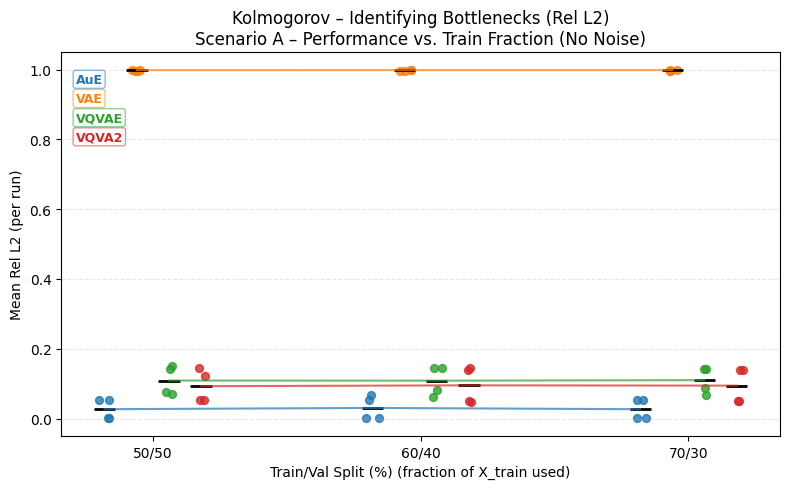

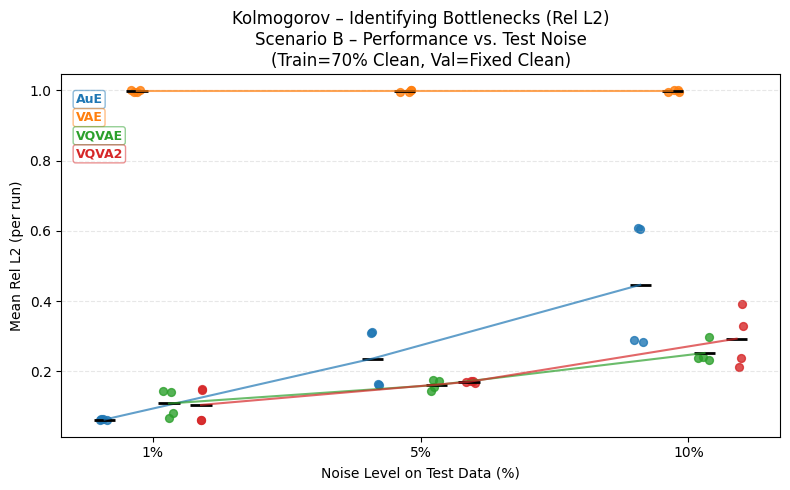

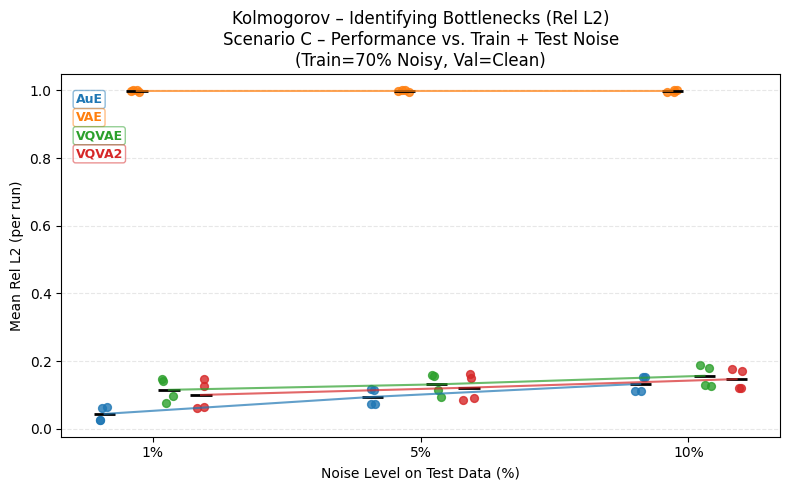

In [26]:
def plot_kolm_scenarioA_relL2(metrics):
    df = metrics[metrics["scenario"] == "b_split"].copy()
    if df.empty:
        raise ValueError("No rows with scenario == 'b_split' in Kolmogorov metrics.")

    train_fracs = sorted(df["train_frac"].unique())
    x_centers = np.arange(len(train_fracs))
    offsets = np.linspace(-0.18, 0.18, len(MODEL_ORDER))

    fig, ax = plt.subplots(figsize=(8, 5))

    label_y_start = 0.92
    label_y_step = 0.05

    for mi, model in enumerate(MODEL_ORDER):
        m_df = df[df["model"] == model]
        if m_df.empty:
            print(f"NOTE: no data for model {model} in kolm b_split – skipping.")
            continue

        color = MODEL_COLORS.get(model, "gray")
        x_line, y_line = [], []

        for si, tf in enumerate(train_fracs):
            sub = m_df[np.isclose(m_df["train_frac"], tf)]
            if sub.empty:
                continue

            x_center = x_centers[si] + offsets[mi]

            xs = x_center + (np.random.rand(len(sub)) - 0.5) * 0.05
            ys = sub["relL2_mean"].values
            ax.scatter(xs, ys, color=color, alpha=0.8, s=32)

            mean_y = ys.mean()
            ax.hlines(mean_y, x_center-0.04, x_center+0.04, colors="k", linewidth=2)

            x_line.append(x_center)
            y_line.append(mean_y)

        if len(x_line) >= 2:
            ax.plot(x_line, y_line, color=color, linewidth=1.5, alpha=0.7)

        ax.text(
            0.02,
            label_y_start - mi * label_y_step,
            model,
            transform=ax.transAxes,
            fontsize=9,
            color=color,
            weight="bold",
            bbox=dict(facecolor="white", edgecolor=color,
                      alpha=0.5, boxstyle="round,pad=0.2")
        )

    ax.set_xticks(x_centers)
    ax.set_xticklabels([human_split_label(tf) for tf in train_fracs])

    ax.set_xlabel("Train/Val Split (%) (fraction of X_train used)")
    ax.set_ylabel("Mean Rel L2 (per run)")
    ax.set_title("Kolmogorov – Identifying Bottlenecks (Rel L2)\n"
                 "Scenario A – Performance vs. Train Fraction (No Noise)")
    ax.grid(True, axis="y", linestyle="--", alpha=0.3)

    plt.tight_layout()
    plt.show()


def _plot_kolm_noise_scenario_relL2(metrics, scenario_name, title_suffix):
    df = metrics[metrics["scenario"] == scenario_name].copy()
    if df.empty:
        raise ValueError(f"No rows with scenario == '{scenario_name}' in Kolmogorov metrics.")

    noise_levels = sorted(df["test_noise_pct"].unique())
    x_centers = np.arange(len(noise_levels))
    offsets = np.linspace(-0.18, 0.18, len(MODEL_ORDER))

    fig, ax = plt.subplots(figsize=(8, 5))

    label_y_start = 0.92
    label_y_step = 0.05

    for mi, model in enumerate(MODEL_ORDER):
        m_df = df[df["model"] == model]
        if m_df.empty:
            print(f"NOTE: no data for model {model} in kolm {scenario_name} – skipping.")
            continue

        color = MODEL_COLORS.get(model, "gray")
        x_line, y_line = [], []

        for ni, noise in enumerate(noise_levels):
            sub = m_df[np.isclose(m_df["test_noise_pct"], noise)]
            if sub.empty:
                continue

            x_center = x_centers[ni] + offsets[mi]

            xs = x_center + (np.random.rand(len(sub)) - 0.5) * 0.05
            ys = sub["relL2_mean"].values
            ax.scatter(xs, ys, color=color, alpha=0.8, s=32)

            mean_y = ys.mean()
            ax.hlines(mean_y, x_center-0.04, x_center+0.04, colors="k", linewidth=2)

            x_line.append(x_center)
            y_line.append(mean_y)

        if len(x_line) >= 2:
            ax.plot(x_line, y_line, color=color, linewidth=1.5, alpha=0.7)

        ax.text(
            0.02,
            label_y_start - mi * label_y_step,
            model,
            transform=ax.transAxes,
            fontsize=9,
            color=color,
            weight="bold",
            bbox=dict(facecolor="white", edgecolor=color,
                      alpha=0.5, boxstyle="round,pad=0.2")
        )

    ax.set_xticks(x_centers)
    ax.set_xticklabels([f"{int(n)}%" for n in noise_levels])

    ax.set_xlabel("Noise Level on Test Data (%)")
    ax.set_ylabel("Mean Rel L2 (per run)")
    ax.set_title(f"Kolmogorov – Identifying Bottlenecks (Rel L2)\n{title_suffix}")
    ax.grid(True, axis="y", linestyle="--", alpha=0.3)

    plt.tight_layout()
    plt.show()


def plot_kolm_scenarioB_relL2():
    _plot_kolm_noise_scenario_relL2(
        metrics_kolm,
        scenario_name="c_test_noise",
        title_suffix="Scenario B – Performance vs. Test Noise\n(Train=70% Clean, Val=Fixed Clean)"
    )

def plot_kolm_scenarioC_relL2():
    _plot_kolm_noise_scenario_relL2(
        metrics_kolm,
        scenario_name="d_train_and_test_noise",
        title_suffix="Scenario C – Performance vs. Train + Test Noise\n(Train=70% Noisy, Val=Clean)"
    )

plot_kolm_scenarioA_relL2(metrics_kolm)
plot_kolm_scenarioB_relL2()
plot_kolm_scenarioC_relL2()

In [27]:
# Kolmogorov: Combined table (all scenarios)

def make_kolm_compact_table(metrics):
    scenario_specs = [
        dict(
            scenario="b_split",
            x_col="train_frac",
            data="train_frac",
            label_func=human_split_label
        ),
        dict(
            scenario="c_test_noise",
            x_col="test_noise_pct",
            data="test_noise_pct",
            label_func=lambda v: f"{int(v)}%"
        ),
        dict(
            scenario="d_train_and_test_noise",
            x_col="test_noise_pct",
            data="test_noise_pct",
            label_func=lambda v: f"{int(v)}%"
        ),
    ]

    rows = []

    for spec in scenario_specs:
        sc = spec["scenario"]
        df = metrics[metrics["scenario"] == sc].copy()
        if df.empty:
            print(f"NOTE: no rows found for Kolmogorov scenario '{sc}'")
            continue

        agg = (
            df.groupby(["model", spec["x_col"]])
              .agg(
                  relL1mean=("relL1_mean", "mean"),
                  relL2mean=("relL2_mean", "mean"),
              )
              .reset_index()
        )

        agg["scenario"] = sc
        agg["data"] = spec["data"]
        agg["distribution"] = agg[spec["x_col"]].apply(spec["label_func"])

        rows.append(
            agg[[
                "scenario",
                "model",
                "data",
                "distribution",
                "relL1mean",
                "relL2mean"
            ]]
        )

    if not rows:
        raise RuntimeError("No Kolmogorov scenario data found.")

    out = pd.concat(rows, ignore_index=True)

    if "MODEL_ORDER" in globals():
        out["model"] = pd.Categorical(out["model"], categories=MODEL_ORDER, ordered=True)

    scenario_order = ["b_split", "c_test_noise", "d_train_and_test_noise"]
    out["scenario"] = pd.Categorical(out["scenario"], categories=scenario_order, ordered=True)

    out = out.sort_values(
        ["scenario", "model", "distribution"]
    ).reset_index(drop=True)

    return out


kolm_combined_table = make_kolm_compact_table(metrics_kolm)
display(kolm_combined_table)

scenario  model            data distribution  relL1mean  \
0                  b_split    AuE      train_frac        50/50   0.020556   
1                  b_split    AuE      train_frac        60/40   0.023444   
2                  b_split    AuE      train_frac        70/30   0.020478   
3                  b_split    VAE      train_frac        50/50   0.997267   
4                  b_split    VAE      train_frac        60/40   0.997277   
5                  b_split    VAE      train_frac        70/30   0.997282   
6                  b_split  VQVAE      train_frac        50/50   0.097189   
7                  b_split  VQVAE      train_frac        60/40   0.096639   
8                  b_split  VQVAE      train_frac        70/30   0.098252   
9                  b_split  VQVA2      train_frac        50/50   0.081022   
10                 b_split  VQVA2      train_frac        60/40   0.083003   
11                 b_split  VQVA2      train_frac        70/30   0.082634   
12            c_test_noise    AuE  test_noise_pct           1%   0.056178   
13            c_test_noise    AuE  test_noise_pct          10%   0.420180   
14            c_test_noise    AuE  test_noise_pct           5%   0.221710   
15            c_test_noise    VAE  test_noise_pct           1%   0.997283   
16            c_test_noise    VAE  test_noise_pct          10%   0.997285   
17            c_test_noise    VAE  test_noise_pct           5%   0.997282   
18            c_test_noise  VQVAE  test_noise_pct           1%   0.097218   
19            c_test_noise  VQVAE  test_noise_pct          10%   0.234017   
20            c_test_noise  VQVAE  test_noise_pct           5%   0.147868   
21            c_test_noise  VQVA2  test_noise_pct           1%   0.092175   
22            c_test_noise  VQVA2  test_noise_pct          10%   0.272829   
23            c_test_noise  VQVA2  test_noise_pct           5%   0.155851   
24  d_train_and_test_noise    AuE  test_noise_pct           1%   0.038043   
25  d_train_and_test_noise    AuE  test_noise_pct          10%   0.122533   
26  d_train_and_test_noise    AuE  test_noise_pct           5%   0.086196   
27  d_train_and_test_noise    VAE  test_noise_pct           1%   0.997283   
28  d_train_and_test_noise    VAE  test_noise_pct          10%   0.997282   
29  d_train_and_test_noise    VAE  test_noise_pct           5%   0.997283   
30  d_train_and_test_noise  VQVAE  test_noise_pct           1%   0.103027   
31  d_train_and_test_noise  VQVAE  test_noise_pct          10%   0.143465   
32  d_train_and_test_noise  VQVAE  test_noise_pct           5%   0.119064   
33  d_train_and_test_noise  VQVA2  test_noise_pct           1%   0.088512   
34  d_train_and_test_noise  VQVA2  test_noise_pct          10%   0.134571   
35  d_train_and_test_noise  VQVA2  test_noise_pct           5%   0.109639   

    relL2mean  
0    0.026754  
1    0.030338  
2    0.026703  
3    0.998366  
4    0.998394  
5    0.998408  
6    0.108959  
7    0.108510  
8    0.110055  
9    0.092650  
10   0.095098  
11   0.094273  
12   0.063193  
13   0.446612  
14   0.236624  
15   0.998409  
16   0.998411  
17   0.998408  
18   0.108893  
19   0.252555  
20   0.161462  
21   0.104821  
22   0.293340  
23   0.170433  
24   0.044218  
25   0.133006  
26   0.094400  
27   0.998410  
28   0.998409  
29   0.998410  
30   0.115264  
31   0.156781  
32   0.131408  
33   0.100203  
34   0.146942  
35   0.121730

In [ ]:
#4. Impact of Optimizer (Adam vs SOAP)

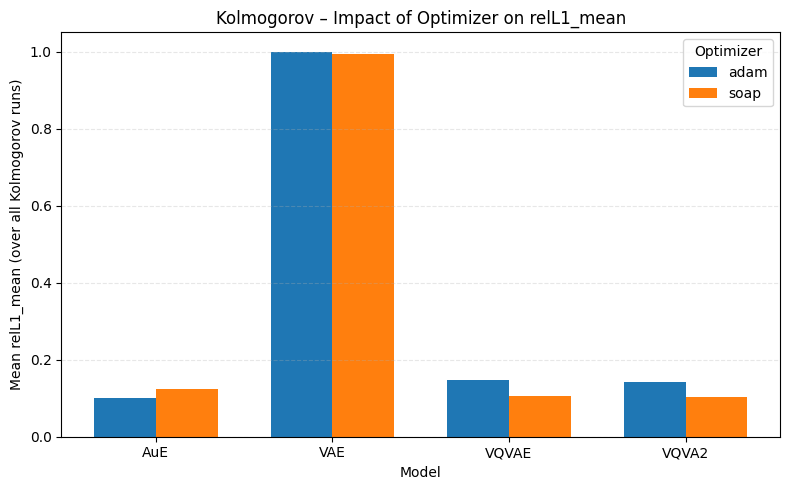

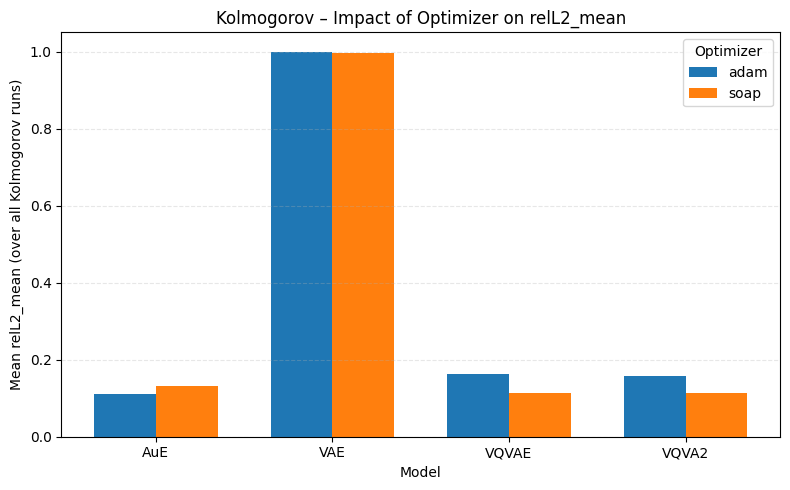

In [28]:
def plot_kolm_optimizer_impact(metrics, metric_col="relL1_mean"):
    df = metrics.copy()
    pivot = df.groupby(["model", "optimizer"])[metric_col].mean().unstack()
    pivot = pivot.loc[MODEL_ORDER]

    fig, ax = plt.subplots(figsize=(8, 5))

    x = np.arange(len(pivot.index))
    width = 0.35
    opt_names = list(pivot.columns)

    for i, opt in enumerate(opt_names):
        vals = pivot[opt].values
        ax.bar(x + (i - (len(opt_names)-1)/2)*width,
               vals, width=width, label=opt)

    ax.set_xticks(x)
    ax.set_xticklabels(pivot.index)
    ax.set_xlabel("Model")
    ax.set_ylabel(f"Mean {metric_col} (over all Kolmogorov runs)")
    ax.set_title(f"Kolmogorov – Impact of Optimizer on {metric_col}")
    ax.grid(True, axis="y", linestyle="--", alpha=0.3)
    ax.legend(title="Optimizer")

    plt.tight_layout()
    plt.show()


def plot_kolm_precision_impact(metrics, metric_col="relL1_mean"):
    df = metrics.copy()
    pivot = df.groupby(["model", "precision"])[metric_col].mean().unstack()
    pivot = pivot.loc[MODEL_ORDER]

    fig, ax = plt.subplots(figsize=(8, 5))

    x = np.arange(len(pivot.index))
    width = 0.35
    prec_names = list(pivot.columns)

    for i, prec in enumerate(prec_names):
        vals = pivot[prec].values
        ax.bar(x + (i - (len(prec_names)-1)/2)*width,
               vals, width=width, label=prec)

    ax.set_xticks(x)
    ax.set_xticklabels(pivot.index)
    ax.set_xlabel("Model")
    ax.set_ylabel(f"Mean {metric_col} (over all Kolmogorov runs)")
    ax.set_title(f"Kolmogorov – Impact of Precision on {metric_col}")
    ax.grid(True, axis="y", linestyle="--", alpha=0.3)
    ax.legend(title="Precision")

    plt.tight_layout()
    plt.show()

# Optimizer impact
plot_kolm_optimizer_impact(metrics_kolm, metric_col="relL1_mean")
plot_kolm_optimizer_impact(metrics_kolm, metric_col="relL2_mean")

In [29]:
# Kolmogorov: Optimizer summary table

def make_kolm_optimizer_table(metrics):
    tbl = (
        metrics
        .groupby(["model", "optimizer"])
        .agg(
            relL1mean=("relL1_mean", "mean"),
            relL2mean=("relL2_mean", "mean"),
        )
        .reset_index()
    )

    if "MODEL_ORDER" in globals():
        tbl["model"] = pd.Categorical(tbl["model"], categories=MODEL_ORDER, ordered=True)

    tbl = tbl.sort_values(["model", "optimizer"]).reset_index(drop=True)
    return tbl

kolm_optimizer_table = make_kolm_optimizer_table(metrics_kolm)
display(kolm_optimizer_table)

model optimizer  relL1mean  relL2mean
0    AuE      adam   0.099517   0.112037
1    AuE      soap   0.124776   0.132818
2    VAE      adam   1.000000   1.000000
3    VAE      soap   0.994561   0.996806
4  VQVAE      adam   0.147972   0.164086
5  VQVAE      soap   0.104637   0.114555
6  VQVA2      adam   0.141071   0.158218
7  VQVA2      soap   0.103426   0.112780

In [ ]:
#5.  Impact of Precision (fp32 vs fp64)

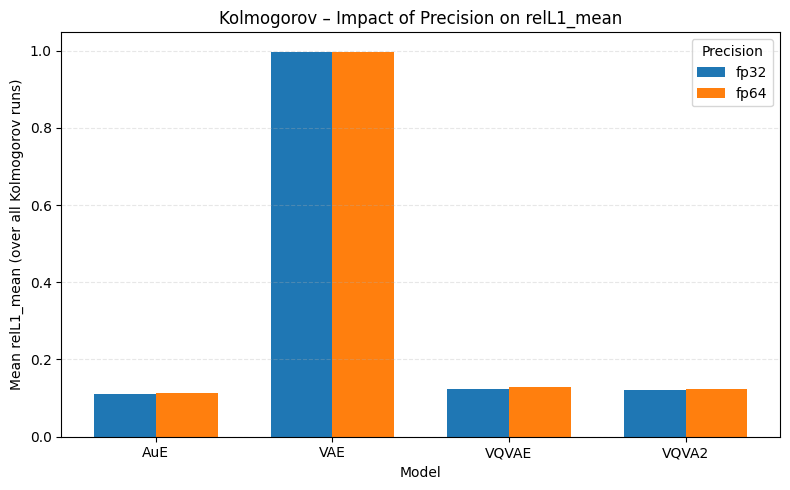

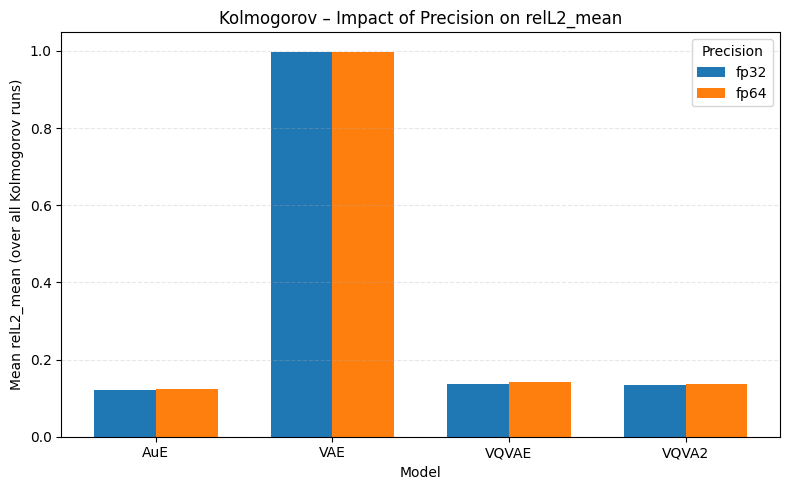

In [30]:
# Precision impact
plot_kolm_precision_impact(metrics_kolm, metric_col="relL1_mean")
plot_kolm_precision_impact(metrics_kolm, metric_col="relL2_mean")

In [31]:
# Kolmogorov: Precision summary table

def make_kolm_precision_table(metrics):
    tbl = (
        metrics
        .groupby(["model", "precision"])
        .agg(
            relL1mean=("relL1_mean", "mean"),
            relL2mean=("relL2_mean", "mean"),
        )
        .reset_index()
    )

    if "MODEL_ORDER" in globals():
        tbl["model"] = pd.Categorical(tbl["model"], categories=MODEL_ORDER, ordered=True)

    tbl = tbl.sort_values(["model", "precision"]).reset_index(drop=True)
    return tbl

kolm_precision_table = make_kolm_precision_table(metrics_kolm)
display(kolm_precision_table)

model precision  relL1mean  relL2mean
0    AuE      fp32   0.111597   0.121754
1    AuE      fp64   0.112696   0.123101
2    VAE      fp32   0.997281   0.998403
3    VAE      fp64   0.997280   0.998403
4  VQVAE      fp32   0.124524   0.137494
5  VQVAE      fp64   0.128085   0.141148
6  VQVA2      fp32   0.120395   0.133496
7  VQVA2      fp64   0.124102   0.137502

In [ ]:
#6. Overall model comparison: best / average / worst

relL1_min  relL1_mean  relL1_max  relL2_min  relL2_mean  relL2_max
model                                                                    
AuE     0.000892    0.112147   0.573935   0.001085    0.122428   0.609078
VAE     0.994533    0.997281   1.000000   0.996732    0.998403   1.000000
VQVAE   0.053931    0.126304   0.279546   0.061030    0.139321   0.298928
VQVA2   0.040659    0.122248   0.367659   0.046637    0.135499   0.391584

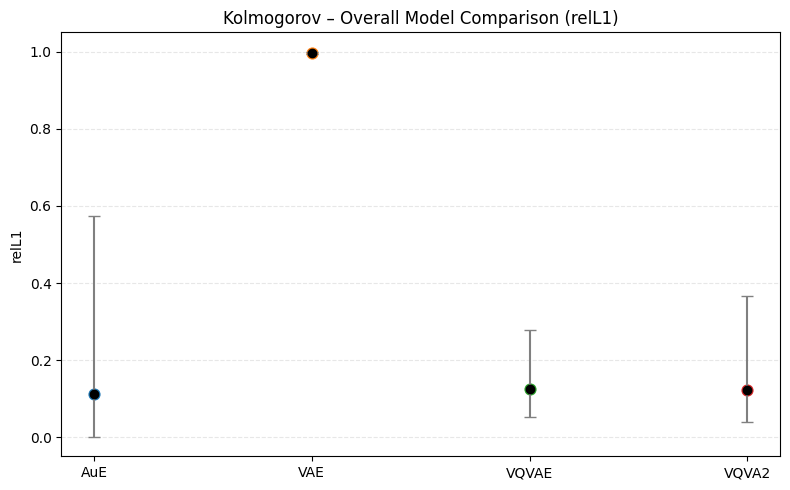

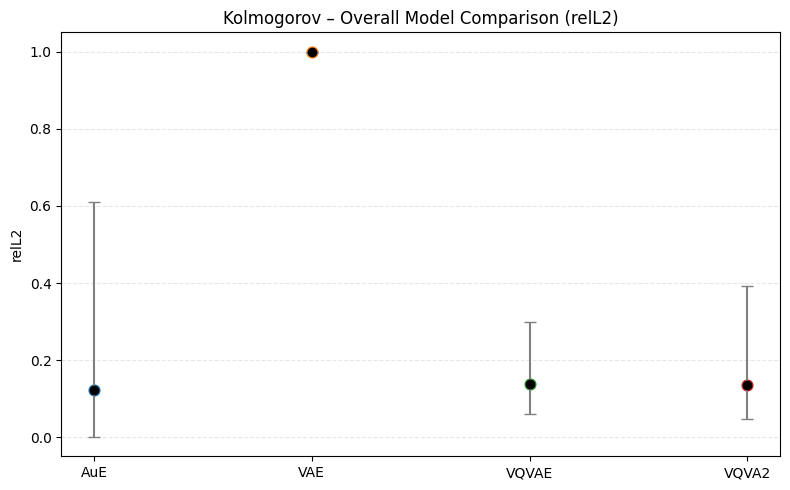

In [32]:
def summarize_models_kolm(metrics):
    rows = []
    for model in MODEL_ORDER:
        sub = metrics[metrics["model"] == model]
        if sub.empty:
            continue
        rows.append({
            "model": model,
            "relL1_min": sub["relL1_mean"].min(),
            "relL1_mean": sub["relL1_mean"].mean(),
            "relL1_max": sub["relL1_mean"].max(),
            "relL2_min": sub["relL2_mean"].min(),
            "relL2_mean": sub["relL2_mean"].mean(),
            "relL2_max": sub["relL2_mean"].max(),
        })
    return pd.DataFrame(rows).set_index("model").loc[MODEL_ORDER]

summary_kolm = summarize_models_kolm(metrics_kolm)
display(summary_kolm)

def plot_overall_model_summary_kolm(summary_df, metric="relL1"):
    min_col = f"{metric}_min"
    mean_col = f"{metric}_mean"
    max_col = f"{metric}_max"

    df = summary_df.copy()
    means = df[mean_col].values
    mins = df[min_col].values
    maxs = df[max_col].values

    x = np.arange(len(df.index))
    lower_err = means - mins
    upper_err = maxs - means
    yerr = np.vstack([lower_err, upper_err])

    fig, ax = plt.subplots(figsize=(8, 5))
    ax.errorbar(x, means, yerr=yerr,
                fmt="o", ecolor="gray", capsize=4,
                linestyle="none", color="k")

    for i, model in enumerate(df.index):
        ax.scatter(x[i], means[i], color=MODEL_COLORS.get(model, "gray"), s=60)

    ax.set_xticks(x)
    ax.set_xticklabels(df.index)
    ax.set_ylabel(metric)
    ax.set_title(f"Kolmogorov – Overall Model Comparison ({metric})")
    ax.grid(True, axis="y", linestyle="--", alpha=0.3)

    plt.tight_layout()
    plt.show()

# Rel L1 summary
plot_overall_model_summary_kolm(summary_kolm, metric="relL1")

# Rel L2 summary
plot_overall_model_summary_kolm(summary_kolm, metric="relL2")

In [35]:
# Scenario master table (mnist, inet and kolmogorov)

def scenario_table_grouped(sc_long):
    idx_cols = ["scenario", "model", "data", "distribution"]

    w1 = sc_long.pivot_table(index=idx_cols, columns="dataset", values="relL1", aggfunc="mean")
    w2 = sc_long.pivot_table(index=idx_cols, columns="dataset", values="relL2", aggfunc="mean")

    w1.columns = pd.MultiIndex.from_product([w1.columns, ["relL1"]])
    w2.columns = pd.MultiIndex.from_product([w2.columns, ["relL2"]])

    wide = pd.concat([w1, w2], axis=1)

    desired_ds = ["mnist", "inet", "kolm"]
    desired_cols = []
    for ds in desired_ds:
        if (ds, "relL1") in wide.columns: desired_cols.append((ds, "relL1"))
        if (ds, "relL2") in wide.columns: desired_cols.append((ds, "relL2"))
    wide = wide[desired_cols]

    wide = wide.reset_index()

    if "MODEL_ORDER" in globals():
        wide["model"] = pd.Categorical(wide["model"], categories=MODEL_ORDER, ordered=True)
    scenario_order = ["b_split", "c_test_noise", "d_train_and_test_noise"]
    wide["scenario"] = pd.Categorical(wide["scenario"], categories=scenario_order, ordered=True)

    wide = wide.sort_values(["scenario", "model", "data", "distribution"]).reset_index(drop=True)
    return wide

scenario_master_table_grouped = scenario_table_grouped(sc_long)
display(scenario_master_table_grouped)

dataset                scenario  model            data distribution     mnist  \
                                                                        relL1   
0                       b_split    AuE      train_frac        50/50  0.005133   
1                       b_split    AuE      train_frac        60/40  0.005401   
2                       b_split    AuE      train_frac        70/30  0.005591   
3                       b_split    VAE      train_frac        50/50  0.305240   
4                       b_split    VAE      train_frac        60/40  0.304933   
5                       b_split    VAE      train_frac        70/30  0.305106   
6                       b_split  VQVAE      train_frac        50/50  0.034085   
7                       b_split  VQVAE      train_frac        60/40  0.031124   
8                       b_split  VQVAE      train_frac        70/30  0.031975   
9                       b_split  VQVA2      train_frac        50/50  0.028242   
10                      b_split  VQVA2      train_frac        60/40  0.028787   
11                      b_split  VQVA2      train_frac        70/30  0.027276   
12                 c_test_noise    AuE  test_noise_pct           1%  0.005946   
13                 c_test_noise    AuE  test_noise_pct          10%  0.027151   
14                 c_test_noise    AuE  test_noise_pct           5%  0.013001   
15                 c_test_noise    VAE  test_noise_pct           1%  0.305028   
16                 c_test_noise    VAE  test_noise_pct          10%  0.305140   
17                 c_test_noise    VAE  test_noise_pct           5%  0.305076   
18                 c_test_noise  VQVAE  test_noise_pct           1%  0.031323   
19                 c_test_noise  VQVAE  test_noise_pct          10%  0.033164   
20                 c_test_noise  VQVAE  test_noise_pct           5%  0.032702   
21                 c_test_noise  VQVA2  test_noise_pct           1%  0.027108   
22                 c_test_noise  VQVA2  test_noise_pct          10%  0.029749   
23                 c_test_noise  VQVA2  test_noise_pct           5%  0.028451   
24       d_train_and_test_noise    AuE  test_noise_pct           1%  0.005746   
25       d_train_and_test_noise    AuE  test_noise_pct          10%  0.012913   
26       d_train_and_test_noise    AuE  test_noise_pct           5%  0.008948   
27       d_train_and_test_noise    VAE  test_noise_pct           1%  0.305087   
28       d_train_and_test_noise    VAE  test_noise_pct          10%  0.305185   
29       d_train_and_test_noise    VAE  test_noise_pct           5%  0.305071   
30       d_train_and_test_noise  VQVAE  test_noise_pct           1%  0.032315   
31       d_train_and_test_noise  VQVAE  test_noise_pct          10%  0.033249   
32       d_train_and_test_noise  VQVAE  test_noise_pct           5%  0.031171   
33       d_train_and_test_noise  VQVA2  test_noise_pct           1%  0.028318   
34       d_train_and_test_noise  VQVA2  test_noise_pct          10%  0.033276   
35       d_train_and_test_noise  VQVA2  test_noise_pct           5%  0.025111   

dataset                inet                kolm            
            relL2     relL1     relL2     relL1     relL2  
0        0.012184  0.012966  0.016957  0.020556  0.026754  
1        0.012405  0.011981  0.015627  0.023444  0.030338  
2        0.012709  0.012893  0.016857  0.020478  0.026703  
3        0.536697  1.001612  0.991342  0.997267  0.998366  
4        0.536833  0.996921  0.987970  0.997277  0.998394  
5        0.536781  0.995762  0.987195  0.997282  0.998408  
6        0.103709  0.279082  0.308739  0.097189  0.108959  
7        0.094222  0.278510  0.307969  0.096639  0.108510  
8        0.096324  0.279226  0.308666  0.098252  0.110055  
9        0.085927  0.249685  0.279014  0.081022  0.092650  
10       0.087639  0.249028  0.278350  0.083003  0.095098  
11       0.082026  0.248238  0.277169  0.082634  0.094273  
12       0.013103  0.032750  0.035668  0.056178  0.063193  
13       0.057894  0.

In [36]:
# Optimizer master table (mnist, inet and komogorov)
def optimizer_table_grouped(opt_long):
    idx_cols = ["model", "optimizer"]

    w1 = opt_long.pivot_table(index=idx_cols, columns="dataset", values="relL1", aggfunc="mean")
    w2 = opt_long.pivot_table(index=idx_cols, columns="dataset", values="relL2", aggfunc="mean")

    w1.columns = pd.MultiIndex.from_product([w1.columns, ["relL1"]])
    w2.columns = pd.MultiIndex.from_product([w2.columns, ["relL2"]])

    wide = pd.concat([w1, w2], axis=1)

    desired_ds = ["mnist", "inet", "kolm"]
    desired_cols = []
    for ds in desired_ds:
        if (ds, "relL1") in wide.columns: desired_cols.append((ds, "relL1"))
        if (ds, "relL2") in wide.columns: desired_cols.append((ds, "relL2"))
    wide = wide[desired_cols]

    wide = wide.reset_index()

    if "MODEL_ORDER" in globals():
        wide["model"] = pd.Categorical(wide["model"], categories=MODEL_ORDER, ordered=True)

    wide = wide.sort_values(["model", "optimizer"]).reset_index(drop=True)
    return wide

optimizer_table_grouped_df = optimizer_table_grouped(opt_long)
display(optimizer_table_grouped_df)

dataset  model optimizer     mnist                inet                kolm  \
                             relL1     relL2     relL1     relL2     relL1   
0          AuE      adam  0.012659  0.029396  0.091064  0.097743  0.099517   
1          AuE      soap  0.007303  0.017336  0.076809  0.080684  0.124776   
2          VAE      adam  0.305941  0.536809  0.996598  0.987805  1.000000   
3          VAE      soap  0.304251  0.536748  0.996489  0.987682  0.994561   
4        VQVAE      adam  0.044047  0.127947  0.340504  0.372246  0.147972   
5        VQVAE      soap  0.020643  0.067899  0.230832  0.257543  0.104637   
6        VQVA2      adam  0.038651  0.111996  0.319554  0.354159  0.141071   
7        VQVA2      soap  0.017855  0.058185  0.197027  0.219514  0.103426   

dataset            
            relL2  
0        0.112037  
1        0.132818  
2        1.000000  
3        0.996806  
4        0.164086  
5        0.114555  
6        0.158218  
7        0.112780

In [37]:
# Precision master table (mnist, inet100 and kolmogorov)

def precision_table_grouped(pre_long):
    idx_cols = ["model", "precision"]

    w1 = pre_long.pivot_table(index=idx_cols, columns="dataset", values="relL1", aggfunc="mean")
    w2 = pre_long.pivot_table(index=idx_cols, columns="dataset", values="relL2", aggfunc="mean")

    w1.columns = pd.MultiIndex.from_product([w1.columns, ["relL1"]])
    w2.columns = pd.MultiIndex.from_product([w2.columns, ["relL2"]])

    wide = pd.concat([w1, w2], axis=1)

    desired_ds = ["mnist", "inet", "kolm"]
    desired_cols = []
    for ds in desired_ds:
        if (ds, "relL1") in wide.columns: desired_cols.append((ds, "relL1"))
        if (ds, "relL2") in wide.columns: desired_cols.append((ds, "relL2"))
    wide = wide[desired_cols]

    wide = wide.reset_index()

    if "MODEL_ORDER" in globals():
        wide["model"] = pd.Categorical(wide["model"], categories=MODEL_ORDER, ordered=True)

    wide = wide.sort_values(["model", "precision"]).reset_index(drop=True)
    return wide

precision_table_grouped_df = precision_table_grouped(pre_long)
display(precision_table_grouped_df)

dataset  model precision     mnist                inet                kolm  \
                             relL1     relL2     relL1     relL2     relL1   
0          AuE      fp32  0.009746  0.022954  0.083856  0.089052  0.111597   
1          AuE      fp64  0.010216  0.023777  0.084017  0.089375  0.112696   
2          VAE      fp32  0.305107  0.536778  0.996543  0.987744  0.997281   
3          VAE      fp64  0.305086  0.536778  0.996544  0.987743  0.997280   
4        VQVAE      fp32  0.032499  0.098426  0.286652  0.315983  0.124524   
5        VQVAE      fp64  0.032191  0.097420  0.284684  0.313807  0.128085   
6        VQVA2      fp32  0.028193  0.084953  0.258656  0.287106  0.120395   
7        VQVA2      fp64  0.028312  0.085228  0.257925  0.286567  0.124102   

dataset            
            relL2  
0        0.121754  
1        0.123101  
2        0.998403  
3        0.998403  
4        0.137494  
5        0.141148  
6        0.133496  
7        0.137502

In [39]:
# Model comparison master table (mnist, inet100 and kolmogorov)

import pandas as pd

def summarize_mean_only(metrics):
    rows = []
    for model in MODEL_ORDER:
        sub = metrics[metrics["model"] == model]
        if sub.empty:
            continue
        rows.append({
            "model": model,
            "relL1_mean": sub["relL1_mean"].mean(),
            "relL2_mean": sub["relL2_mean"].mean(),
        })
    if not rows:
        return pd.DataFrame(columns=["relL1_mean","relL2_mean"]).set_index("model")
    return pd.DataFrame(rows).set_index("model")

def mean_master_table(metrics_dict):
    blocks = []

    for ds, metrics in metrics_dict.items():
        s = summarize_mean_only(metrics)

        if "MODEL_ORDER" in globals():
            s = s.reindex([m for m in MODEL_ORDER if m in s.index])

        s.columns = pd.MultiIndex.from_product([[ds], s.columns])
        blocks.append(s)

    master = pd.concat(blocks, axis=1)

    desired_ds = ["mnist", "inet", "kolm"]
    cols = []
    for ds in desired_ds:
        if ds in master.columns.get_level_values(0):
            if (ds, "relL1_mean") in master.columns:
                cols.append((ds, "relL1_mean"))
            if (ds, "relL2_mean") in master.columns:
                cols.append((ds, "relL2_mean"))

    master = master[cols]
    return master


mean_master = mean_master_table({
    "mnist": metrics_mnist,
    "inet":  metrics_inet,
    "kolm":  metrics_kolm,
})

display(mean_master)

mnist                  inet                  kolm           
      relL1_mean relL2_mean relL1_mean relL2_mean relL1_mean relL2_mean
model                                                                  
AuE     0.009981   0.023366   0.083936   0.089214   0.112147   0.122428
VAE     0.305096   0.536778   0.996544   0.987743   0.997281   0.998403
VQVAE   0.032345   0.097923   0.285668   0.314895   0.126304   0.139321
VQVA2   0.028253   0.085091   0.258290   0.286837   0.122248   0.135499

In [ ]:
#7. Reconstruction plot

In [41]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

kolm_data_root   = Path("./datasets/kolmogorov_samples")
kolm_output_root = Path("./best_models/output_kolmogorov")

X_test_path = kolm_data_root / "X_test.npy"
if not X_test_path.exists():
    raise FileNotFoundError(f"Could not find {X_test_path}")

X_test_np = np.load(X_test_path)
print("X_test shape:", X_test_np.shape, "dtype:", X_test_np.dtype)

X_test_full = torch.from_numpy(X_test_np).float()  # still unscaled (physical values)

DATA_SCALE = 8.0

# Snake activation
class Snake(nn.Module):
    """
    Snake activation: x + (1/a) * sin^2(a x)
    """
    def __init__(self, alpha=1.0):
        super().__init__()
        self.alpha = nn.Parameter(torch.tensor(alpha))

    def forward(self, x):
        a = self.alpha.abs() + 1e-6
        return x + (1.0 / a) * torch.sin(a * x).pow(2)


# Encoder / Decoder Blocks
class EncoderBlock(nn.Module):
    def __init__(self, cin, cout):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(cin, cout, 3, padding=1),
            nn.GroupNorm(num_groups=min(8, cout), num_channels=cout), Snake(),
            nn.Conv2d(cout, cout, 3, padding=1),
            nn.GroupNorm(num_groups=min(8, cout), num_channels=cout), Snake(),
        )

    def forward(self, x):
        return self.net(x)


class DecoderBlock(nn.Module):
    def __init__(self, cin, cout):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(cin, cout, 3, padding=1),
            nn.GroupNorm(num_groups=min(8, cout), num_channels=cout), Snake(),
            nn.Conv2d(cout, cout, 3, padding=1),
            nn.GroupNorm(num_groups=min(8, cout), num_channels=cout), Snake(),
        )

    def forward(self, x):
        return self.net(x)


BOTTLENECK_CH = 56
CODEBOOK_SIZE = 512
COMMIT_BETA   = 0.25
TOP_CH        = 56


# Models (same as training)
class AuE(nn.Module):
    """Autoencoder with latent (ch, 32, 32) for 128x128 input."""
    def __init__(self, ch=BOTTLENECK_CH):
        super().__init__()
        self.enc = nn.Sequential(
            EncoderBlock(1, 32),
            nn.Conv2d(32, 64, 4, stride=2, padding=1),  # 128 -> 64
            Snake(),
            EncoderBlock(64, 64),
            nn.Conv2d(64, ch, 4, stride=2, padding=1),  # 64 -> 32
            Snake(),
        )
        self.dec = nn.Sequential(
            DecoderBlock(ch, 128),
            nn.ConvTranspose2d(128, 64, 2, stride=2),   # 32 -> 64
            Snake(),
            DecoderBlock(64, 64),
            nn.ConvTranspose2d(64, 32, 2, stride=2),    # 64 -> 128
            Snake(),
            nn.Conv2d(32, 1, 1),
            nn.Tanh(),
        )

    def forward(self, x):
        z = self.enc(x)
        xhat = self.dec(z)
        return xhat, {}


class VAE(nn.Module):
    def __init__(self, ch=BOTTLENECK_CH):
        super().__init__()
        self.enc = nn.Sequential(
            EncoderBlock(1, 32),
            nn.Conv2d(32, 64, 4, stride=2, padding=1),  # 128 -> 64
            Snake(),
            EncoderBlock(64, 64),
            nn.Conv2d(64, 128, 4, stride=2, padding=1),  # 64 -> 32
            Snake(),
        )
        self.mu     = nn.Conv2d(128, ch, 1)
        self.logvar = nn.Conv2d(128, ch, 1)
        self.dec = nn.Sequential(
            DecoderBlock(ch, 128),
            nn.ConvTranspose2d(128, 64, 2, stride=2),   # 32 -> 64
            Snake(),
            DecoderBlock(64, 64),
            nn.ConvTranspose2d(64, 32, 2, stride=2),    # 64 -> 128
            Snake(),
            nn.Conv2d(32, 1, 1),
            nn.Tanh(),
        )

    def reparam(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        h = self.enc(x)
        mu, logvar = self.mu(h), self.logvar(h)
        z = self.reparam(mu, logvar)
        xhat = self.dec(z)
        kl = -0.5 * (1 + logvar - mu.pow(2) - logvar.exp())
        kl = kl.sum(dim=[1, 2, 3]).mean()
        return xhat, {"aux_loss": kl}


class VectorQuantizer(nn.Module):
    def __init__(self, K, D, beta_commit=0.25):
        super().__init__()
        self.K = K
        self.D = D
        self.beta = beta_commit
        self.codebook = nn.Embedding(K, D)
        nn.init.uniform_(self.codebook.weight, -1.0 / D, 1.0 / D)

    def forward(self, z_e):
        B, D, H, W = z_e.shape
        z = z_e.permute(0, 2, 3, 1).contiguous().view(-1, D)  # (BHW, D)
        e = self.codebook.weight
        dist = (z.pow(2).sum(1, keepdim=True) + e.pow(2).sum(1) - 2 * z @ e.t())
        idx = torch.argmin(dist, dim=1)
        z_q = self.codebook(idx).view(B, H, W, D).permute(0, 3, 1, 2).contiguous()

        codebook_loss = F.mse_loss(z_q.detach(), z_e)
        commit_loss   = self.beta * F.mse_loss(z_q, z_e.detach())
        vq_loss = codebook_loss + commit_loss

        z_q_st = z_e + (z_q - z_e).detach()
        return z_q_st, vq_loss


class VQVAE(nn.Module):
    """VQ-VAE with latent (D,32,32)."""
    def __init__(self, K=CODEBOOK_SIZE, D=BOTTLENECK_CH, beta_commit=COMMIT_BETA):
        super().__init__()
        self.encoder = nn.Sequential(
            EncoderBlock(1, 32),
            nn.Conv2d(32, 64, 4, stride=2, padding=1),  # 128 -> 64
            Snake(),
            EncoderBlock(64, 64),
            nn.Conv2d(64, D, 4, stride=2, padding=1),   # 64 -> 32
            Snake(),
        )
        self.quant = VectorQuantizer(K, D, beta_commit=beta_commit)
        self.decoder = nn.Sequential(
            DecoderBlock(D, 128),
            nn.ConvTranspose2d(128, 64, 2, stride=2),   # 32 -> 64
            Snake(),
            DecoderBlock(64, 64),
            nn.ConvTranspose2d(64, 32, 2, stride=2),    # 64 -> 128
            Snake(),
            nn.Conv2d(32, 1, 1),
            nn.Tanh(),
        )

    def forward(self, x):
        z_e = self.encoder(x)
        z_q, vq_loss = self.quant(z_e)
        xhat = self.decoder(z_q)
        return xhat, {"aux_loss": vq_loss}


class VQVA2(nn.Module):
    """Two-level VQ-VAE-2."""
    def __init__(self, K=CODEBOOK_SIZE, D=BOTTLENECK_CH,
                 beta_commit=COMMIT_BETA, top_ch=TOP_CH):
        super().__init__()
        self.enc_bottom = nn.Sequential(
            EncoderBlock(1, 32),
            nn.Conv2d(32, 64, 4, stride=2, padding=1),   # 128 -> 64
            Snake(),
            EncoderBlock(64, 64),
            nn.Conv2d(64, D, 4, stride=2, padding=1),    # 64 -> 32
            Snake(),
        )
        self.enc_top = nn.Sequential(
            nn.Conv2d(D, 128, 3, padding=1),
            Snake(),
            nn.Conv2d(128, top_ch, 4, stride=2, padding=1),  # 32 -> 16
            Snake(),
        )
        self.quant_top = VectorQuantizer(K, top_ch, beta_commit=beta_commit)
        self.bottom_condition = nn.Sequential(
            nn.Conv2d(D + top_ch, D, 1),
            Snake()
        )
        self.quant_bottom = VectorQuantizer(K, D, beta_commit=beta_commit)
        self.dec = nn.Sequential(
            DecoderBlock(D + top_ch, 128),
            nn.ConvTranspose2d(128, 64, 2, stride=2),
            Snake(),
            DecoderBlock(64, 64),
            nn.ConvTranspose2d(64, 32, 2, stride=2),
            Snake(),
            nn.Conv2d(32, 1, 1),
            nn.Tanh(),
        )

    def forward(self, x):
        zb_e = self.enc_bottom(x)                       # (D,32,32)
        zt_e = self.enc_top(zb_e)                       # (top_ch,16,16)
        zt_q, vq_t = self.quant_top(zt_e)
        zt_up = F.interpolate(zt_q, size=zb_e.shape[-2:], mode="nearest")
        zb_cond = self.bottom_condition(torch.cat([zb_e, zt_up], dim=1))
        zb_q, vq_b = self.quant_bottom(zb_cond)
        dec_in = torch.cat([zb_q, zt_up], dim=1)
        xhat = self.dec(dec_in)
        return xhat, {"aux_loss": vq_t + vq_b}

Device: cuda
X_test shape: (2000, 1, 128, 128) dtype: float32


In [42]:
model_cfgs_kolm = {
    "AuE": {
        "dir":   kolm_output_root / "output_kolm_ae",
        "ckpt":  "best_overall_AuE.pt",
        "label": "AE",
    },
    "VAE": {
        "dir":   kolm_output_root / "output_kolm_vae",
        "ckpt":  "best_overall_VAE.pt",
        "label": "VAE",
    },
    "VQVAE": {
        "dir":   kolm_output_root / "output_kolm_vqvae",
        "ckpt":  "best_overall_VQVAE.pt",
        "label": "VQVAE",
    },
    "VQVA2": {
        "dir":   kolm_output_root / "output_kolm_vqvae2",
        "ckpt":  "best_overall_VQVA2.pt",
        "label": "VQVA2",
    },
}

def build_kolm_model(name: str):
    if name == "AuE":
        return AuE()
    if name == "VAE":
        return VAE()
    if name == "VQVAE":
        return VQVAE()
    if name == "VQVA2":
        return VQVA2()
    raise ValueError(f"Unknown model: {name}")

loaded_models_kolm = {}

for mname, cfgm in model_cfgs_kolm.items():
    ckpt_path = cfgm["dir"] / cfgm["ckpt"]
    if not ckpt_path.exists():
        print(f"[WARN] Missing checkpoint for {mname}: {ckpt_path}")
        continue

    state = torch.load(ckpt_path, map_location="cpu")

    if isinstance(state, dict):
        if "model" in state:
            sd = state["model"]
        elif "model_state" in state:
            sd = state["model_state"]
        else:
            sd = state
    else:
        sd = state

    model = build_kolm_model(mname).to(device)
    model.load_state_dict(sd, strict=False)
    model.eval()

    loaded_models_kolm[mname] = model
    print(f"[OK] Loaded {mname} from {ckpt_path}")

[OK] Loaded AuE from best_models/output_kolmogorov/output_kolm_ae/best_overall_AuE.pt
[OK] Loaded VAE from best_models/output_kolmogorov/output_kolm_vae/best_overall_VAE.pt
[OK] Loaded VQVAE from best_models/output_kolmogorov/output_kolm_vqvae/best_overall_VQVAE.pt
[OK] Loaded VQVA2 from best_models/output_kolmogorov/output_kolm_vqvae2/best_overall_VQVA2.pt


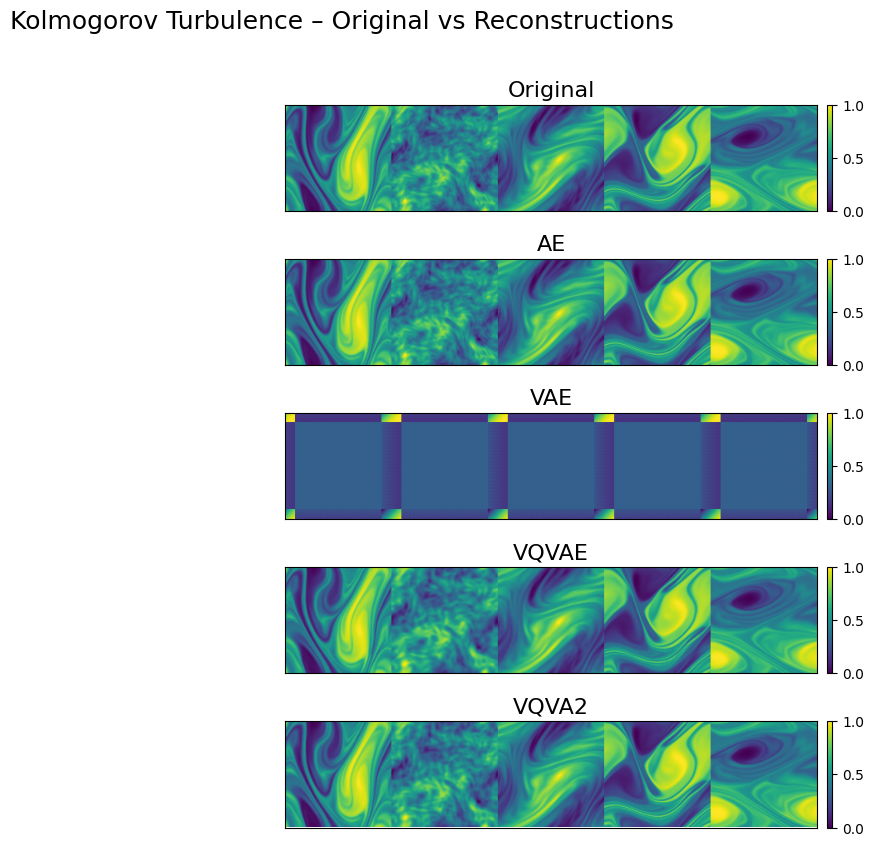

In [43]:
def plot_kolm_recons_all_models(n=5):
    if not loaded_models_kolm:
        print("No Kolmogorov models loaded.")
        return

    N = X_test_full.shape[0]
    n = min(n, N)
    idx = torch.randperm(N)[:n]

    x_phys = X_test_full[idx].to(device)           # physical values
    x_norm = (x_phys / DATA_SCALE).clamp(-1.0, 1.0)

    # collect reconstructions
    with torch.no_grad():
        recons = {}
        for name, model in loaded_models_kolm.items():
            y, _ = model(x_norm)
            recons[name] = y

    x_phys_cpu = x_phys.cpu()
    recons_cpu = {k: v.cpu() for k, v in recons.items()}

    rows = ["Original"] + [cfgm["label"] for k, cfgm in model_cfgs_kolm.items() if k in loaded_models_kolm]
    model_order = [k for k in model_cfgs_kolm.keys() if k in loaded_models_kolm]

    H, W = x_phys_cpu.shape[-2:]

    fig_height = 1.5 * len(rows) + 1
    fig, axes = plt.subplots(len(rows), 1, figsize=(n * 2.2, fig_height))

    if len(rows) == 1:
        axes = [axes]

    def to_img(arr):
        arr = arr.numpy()
        vmin, vmax = arr.min(), arr.max()
        if vmax > vmin:
            arr = (arr - vmin) / (vmax - vmin)
        else:
            arr = np.zeros_like(arr)
        return arr

    axes[0].set_title("Original", fontsize=16)
    axes[0].set_xticks([]); axes[0].set_yticks([])

    canvas = np.zeros((H, W * n))
    for i in range(n):
        canvas[:, W * i : W * (i + 1)] = to_img(x_phys_cpu[i, 0])
    im0 = axes[0].imshow(canvas, cmap="viridis")
    axes[0].figure.colorbar(im0, ax=axes[0], fraction=0.02, pad=0.01)

    row_idx = 1
    for mname in model_order:
        label = model_cfgs_kolm[mname]["label"]
        axes[row_idx].set_title(label, fontsize=16)
        axes[row_idx].set_xticks([]); axes[row_idx].set_yticks([])

        canvas = np.zeros((H, W * n))
        block = recons_cpu[mname] * DATA_SCALE  # back to physical scale
        for i in range(n):
            canvas[:, W * i : W * (i + 1)] = to_img(block[i, 0])

        im = axes[row_idx].imshow(canvas, cmap="viridis")
        axes[row_idx].figure.colorbar(im, ax=axes[row_idx], fraction=0.02, pad=0.01)

        row_idx += 1

    plt.suptitle("Kolmogorov Turbulence – Original vs Reconstructions", fontsize=18, y=0.99)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()


plot_kolm_recons_all_models(n=5)

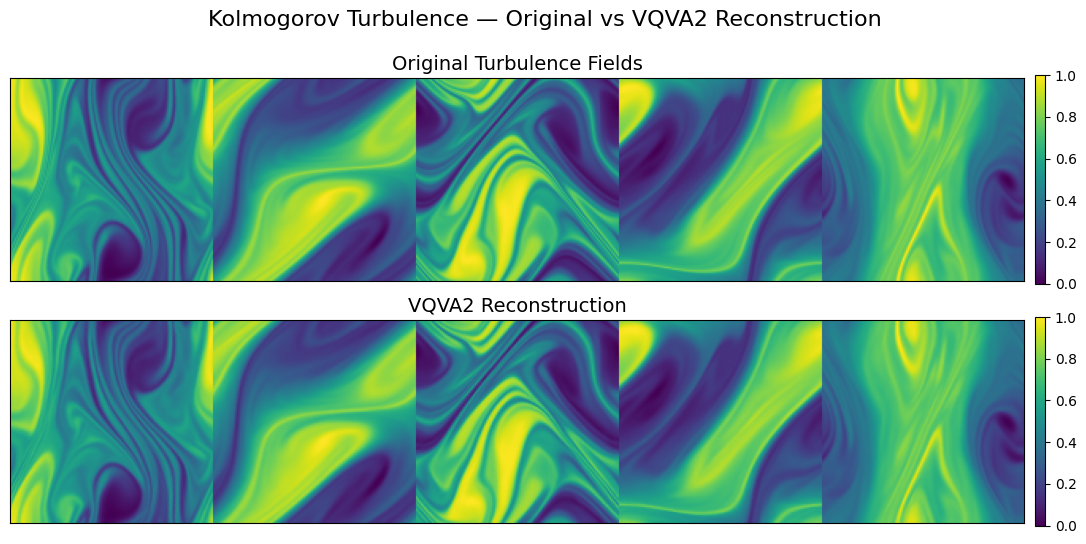

In [44]:
def plot_kolm_vqvae2_only(n=5):
    if "VQVA2" not in loaded_models_kolm:
        print("VQVA2 checkpoint not loaded.")
        return

    model = loaded_models_kolm["VQVA2"]

    N = X_test_full.shape[0]
    n = min(n, N)
    idx = torch.randperm(N)[:n]

    # Input images: physical space
    x_phys = X_test_full[idx].to(device)

    # Normalize as done during training
    x_norm = (x_phys / DATA_SCALE).clamp(-1.0, 1.0)

    # Forward pass
    with torch.no_grad():
        xhat_norm, _ = model(x_norm)

    # Convert back to physical scale
    xhat_phys = xhat_norm * DATA_SCALE

    x_phys  = x_phys.cpu()
    xhat_phys = xhat_phys.cpu()

    H, W = x_phys.shape[-2:]

    fig, axes = plt.subplots(2, 1, figsize=(n * 2.2, 5.5))

    def norm_img(arr):
        arr = arr.numpy()
        vmin, vmax = arr.min(), arr.max()
        if vmax > vmin:
            arr = (arr - vmin) / (vmax - vmin)
        else:
            arr = np.zeros_like(arr)
        return arr

    axes[0].set_title("Original Turbulence Fields", fontsize=14)
    axes[0].set_xticks([]); axes[0].set_yticks([])

    canvas = np.zeros((H, W * n))
    for i in range(n):
        canvas[:, W*i:W*(i+1)] = norm_img(x_phys[i, 0])

    im0 = axes[0].imshow(canvas, cmap="viridis")
    axes[0].figure.colorbar(im0, ax=axes[0], fraction=0.02, pad=0.01)

    axes[1].set_title("VQVA2 Reconstruction", fontsize=14)
    axes[1].set_xticks([]); axes[1].set_yticks([])

    canvas2 = np.zeros((H, W * n))
    for i in range(n):
        canvas2[:, W*i:W*(i+1)] = norm_img(xhat_phys[i, 0])

    im1 = axes[1].imshow(canvas2, cmap="viridis")
    axes[1].figure.colorbar(im1, ax=axes[1], fraction=0.02, pad=0.01)

    plt.suptitle("Kolmogorov Turbulence — Original vs VQVA2 Reconstruction", fontsize=16, y=0.98)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()


plot_kolm_vqvae2_only(n=5)

Raw test array shape: (2000, 1, 128, 128)
Using sample index 0, field 'Y'
Field shape: 128 x 128

Selected mode information:
Mode 0: singular value = 8.8738e+01, explained variance ratio = 55.742%
Mode 2: singular value = 1.2118e+01, explained variance ratio = 1.040%
Mode 5: singular value = 8.4300e+00, explained variance ratio = 0.503%
Mode 10: singular value = 6.6428e+00, explained variance ratio = 0.312%


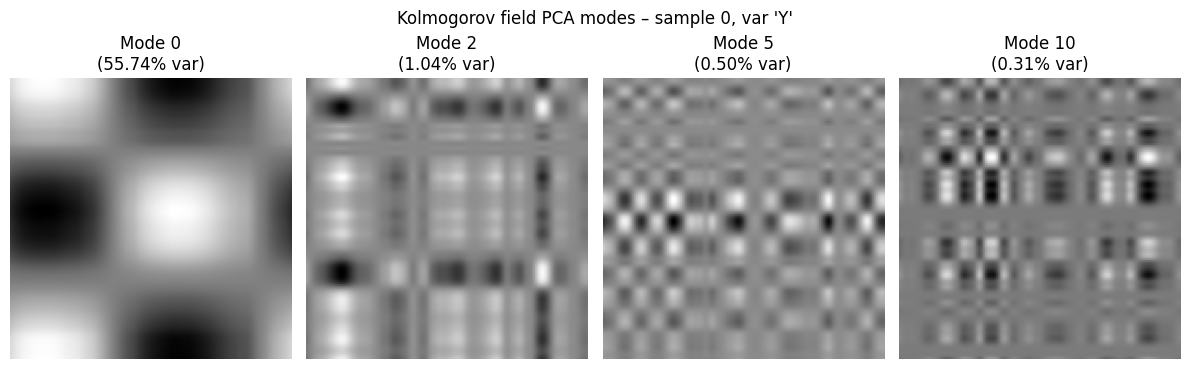

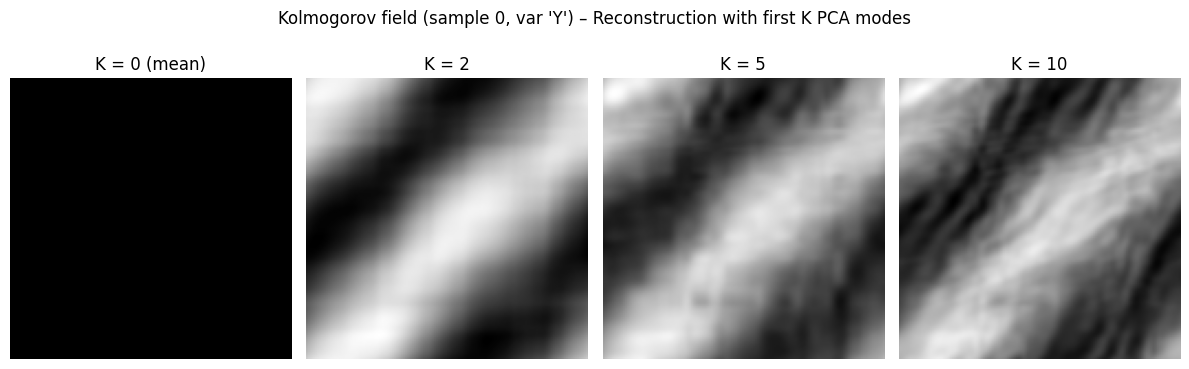

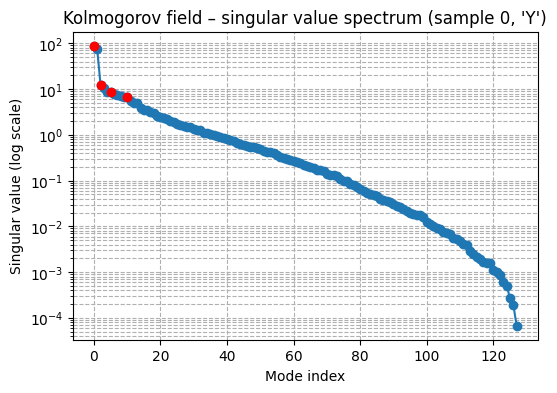

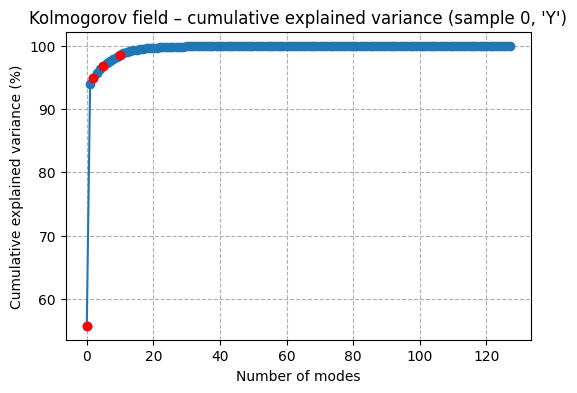

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

DATA_ROOT = Path("./datasets/kolmogorov_samples")
VAR_NAME  = "Y"
TEST_FILE = DATA_ROOT / f"{VAR_NAME}_test.npy"

# PCA modes & recon Ks
MODES_TO_ANALYZE = [0, 2, 5, 10]
RECON_KS         = [0, 2, 5, 10]

sample_index = 0

arr = np.load(TEST_FILE, allow_pickle=True)
print("Raw test array shape:", arr.shape)

if arr.ndim == 4 and arr.shape[1] == 1:
    arr_2d = arr[sample_index, 0]          # (H, W)
elif arr.ndim == 3:
    arr_2d = arr[sample_index]
else:
    raise ValueError(f"Unexpected array shape: {arr.shape}")

H, W = arr_2d.shape
print(f"Using sample index {sample_index}, field '{VAR_NAME}'")
print(f"Field shape: {H} x {W}")

img_array = arr_2d.astype(np.float64)

# 2) Mean-center and SVD (PCA)
mean_val   = img_array.mean()
X_centered = img_array - mean_val
U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)

singular_values_sq       = S**2
total_variance           = singular_values_sq.sum()
explained_variance_ratio = singular_values_sq / total_variance

print("\nSelected mode information:")
num_modes_available = len(S)
valid_modes = [m for m in MODES_TO_ANALYZE if m < num_modes_available]

for m in valid_modes:
    print(
        f"Mode {m}: singular value = {S[m]:.4e}, "
        f"explained variance ratio = {explained_variance_ratio[m]*100:.3f}%"
    )

# 3) Visualize individual PCA modes
if valid_modes:
    plt.figure(figsize=(3 * len(valid_modes), 4))
    for i, m in enumerate(valid_modes):
        mode_img = S[m] * np.outer(U[:, m], Vt[m, :])
        mode_img_display = mode_img + mean_val

        plt.subplot(1, len(valid_modes), i + 1)
        plt.imshow(mode_img_display, cmap="gray")
        plt.title(f"Mode {m}\n({explained_variance_ratio[m]*100:.2f}% var)")
        plt.axis("off")

    plt.suptitle(f"Kolmogorov field PCA modes – sample {sample_index}, var '{VAR_NAME}'")
    plt.tight_layout()
    plt.show()

# 4) Reconstruction with first K modes
def reconstruct_with_k_modes(k: int) -> np.ndarray:
    """Reconstruct the field using the first k PCA/SVD modes."""
    k = min(k, num_modes_available)
    if k == 0:
        return np.full_like(img_array, mean_val)

    U_k  = U[:, :k]
    S_k  = S[:k]
    Vt_k = Vt[:k, :]
    X_k  = (U_k * S_k) @ Vt_k
    return X_k + mean_val

plt.figure(figsize=(3 * len(RECON_KS), 4))
for i, k in enumerate(RECON_KS):
    recon = reconstruct_with_k_modes(k)
    title = "K = 0 (mean)" if k == 0 else f"K = {k}"

    plt.subplot(1, len(RECON_KS), i + 1)
    plt.imshow(recon, cmap="gray")
    plt.title(title)
    plt.axis("off")

plt.suptitle(
    f"Kolmogorov field (sample {sample_index}, var '{VAR_NAME}') – "
    "Reconstruction with first K PCA modes"
)
plt.tight_layout()
plt.show()

# 5) Singular value spectrum & cumulative variance
plt.figure(figsize=(6, 4))
plt.semilogy(S, marker="o")
for m in valid_modes:
    plt.semilogy(m, S[m], "ro")
plt.xlabel("Mode index")
plt.ylabel("Singular value (log scale)")
plt.title(f"Kolmogorov field – singular value spectrum (sample {sample_index}, '{VAR_NAME}')")
plt.grid(True, which="both", ls="--")
plt.show()

plt.figure(figsize=(6, 4))
cum_exp = np.cumsum(explained_variance_ratio) * 100
plt.plot(cum_exp, marker="o")
for m in valid_modes:
    plt.plot(m, cum_exp[m], "ro")
plt.xlabel("Number of modes")
plt.ylabel("Cumulative explained variance (%)")
plt.title(f"Kolmogorov field – cumulative explained variance (sample {sample_index}, '{VAR_NAME}')")
plt.grid(True, ls="--")
plt.show()

In [ ]:
# PCA basis (modes) on Kolmogorov test set

In [46]:
import numpy as np
from pathlib import Path
from sklearn.decomposition import PCA
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

kolm_data_root = Path("./datasets/kolmogorov_samples")
X_train_np = np.load(kolm_data_root / "X_train.npy")  # (N, 1, 128, 128)
X_test_np  = np.load(kolm_data_root / "X_test.npy")   # (N_test, 1, 128, 128)

print("X_train:", X_train_np.shape, X_train_np.dtype)
print("X_test :", X_test_np.shape,  X_test_np.dtype)

H, W = X_train_np.shape[-2], X_train_np.shape[-1]
D = H * W

# Flatten train samples for PCA: (N, D)
X_train_flat = X_train_np.reshape(X_train_np.shape[0], -1).astype(np.float32)

# ---------- PCA ----------
n_components = 32
pca = PCA(n_components=n_components, svd_solver="randomized", whiten=False)
pca.fit(X_train_flat)

print("PCA components:", pca.components_.shape)
print("Explained variance ratio (first 10):", pca.explained_variance_ratio_[:10])

pca_kolm = {
    "components": pca.components_.copy(),          # (k, D)
    "mean":       pca.mean_.copy(),                # (D,)
    "explained_variance_ratio": pca.explained_variance_ratio_.copy()
}

X_test_full = torch.from_numpy(X_test_np).float().to(device)  # (N_test,1,H,W)

X_train: (10000, 1, 128, 128) float32
X_test : (2000, 1, 128, 128) float32
PCA components: (32, 16384)
Explained variance ratio (first 10): [0.1625317  0.15724212 0.15290879 0.14874963 0.09779515 0.01338072
 0.01285828 0.01009752 0.0064885  0.00531043]


In [47]:
# Minimal cfg object for model reconstruction
class CfgMini:
    BOTTLENECK_CH = 56
    CODEBOOK_SIZE = 512
    COMMIT_BETA   = 0.25
    TOP_CH        = 56

cfg = CfgMini()

In [48]:
# Load VQVA2 best checkpoint
from pathlib import Path
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

kolm_output_root = Path("./best_models/output_kolmogorov")
vqvae2_ckpt = kolm_output_root / "output_kolm_vqvae2" / "best_overall_VQVA2.pt"
if not vqvae2_ckpt.exists():
    raise FileNotFoundError(f"Checkpoint not found: {vqvae2_ckpt}")

model_vqva2 = VQVA2(
    K=cfg.CODEBOOK_SIZE,
    D=cfg.BOTTLENECK_CH,
    beta_commit=cfg.COMMIT_BETA,
    top_ch=cfg.TOP_CH,
).to(device)

# Load weights
state = torch.load(vqvae2_ckpt, map_location=device)
model_vqva2.load_state_dict(state["model"])
model_vqva2.eval()

print("Loaded VQVA2 model from:", vqvae2_ckpt)

Loaded VQVA2 model from: best_models/output_kolmogorov/output_kolm_vqvae2/best_overall_VQVA2.pt


In [49]:
DATA_SCALE = 8.0

loaded_models_kolm = {
    "VQVA2": model_vqva2.to(device).eval()
}

def project_onto_kolm_pca(x_tensor, pca_info):
    """
    x_tensor: (N,1,H,W) in *physical* units (same scale as X_train_np)
    returns: torch (N, n_components) of PCA coefficients
    """
    x_np = x_tensor.detach().cpu().numpy().reshape(x_tensor.shape[0], -1)  # (N,D)
    Xc = x_np - pca_info["mean"][None, :]
    comps = pca_info["components"]                      # (k,D)
    coeffs = Xc @ comps.T                               # (N,k)
    return torch.from_numpy(coeffs).float()


def reconstruct_mode_from_coeff(coeff, component, mean_flat):
    """
    coeff: scalar coefficient
    component: (D,)
    mean_flat: (D,)
    returns: flattened reconstruction using only this mode (D,)
    """
    return mean_flat + coeff * component


def compute_avg_mode_images_vqva2_only(
    model_vqva2,
    pca_info,
    X_test_full,
    modes_to_plot=[0, 2, 4],
    n_samples=200
):
    comps = pca_info["components"]      # (k,D)
    mean_flat = pca_info["mean"].reshape(-1)   # (D,)
    H = W = int(np.sqrt(mean_flat.shape[0]))

    # Choose subset
    n_total = X_test_full.shape[0]
    idx = torch.randperm(n_total)[:min(n_samples, n_total)]
    x_phys = X_test_full[idx]   # (n,1,H,W), physical

    results = {"GT": [], "VQVA2": []}
    coeff_gt = project_onto_kolm_pca(x_phys, pca_info)  # (n, k)

    # ----- Model coefficients -----
    model_vqva2.eval()
    with torch.no_grad():
        x_norm = (x_phys / DATA_SCALE).clamp(-1, 1)
        xhat_norm, _ = model_vqva2(x_norm)
        xhat_phys = xhat_norm * DATA_SCALE

    coeff_model = project_onto_kolm_pca(xhat_phys, pca_info)  # (n,k)

    for mode in modes_to_plot:
        comp = comps[mode]   # (D,)

        recs_gt = []
        for i in range(idx.shape[0]):
            rec_flat = reconstruct_mode_from_coeff(float(coeff_gt[i, mode]), comp, mean_flat)
            recs_gt.append(rec_flat.reshape(1, H, W))
        results["GT"].append(np.mean(np.stack(recs_gt), axis=0))

        recs_vq = []
        for i in range(idx.shape[0]):
            rec_flat = reconstruct_mode_from_coeff(float(coeff_model[i, mode]), comp, mean_flat)
            recs_vq.append(rec_flat.reshape(1, H, W))
        results["VQVA2"].append(np.mean(np.stack(recs_vq), axis=0))

    return results

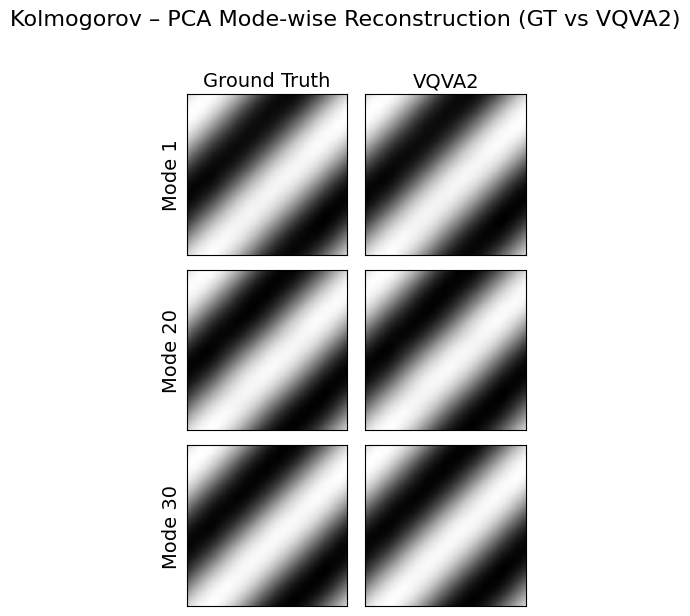

In [50]:
import matplotlib.pyplot as plt

def plot_modewise_pca_gt_vs_vqva2(mode_results,
                                  modes_to_plot=[0,2,4, 6, 8],
                                  cmap="gray"):
    """
    mode_results: output of compute_avg_mode_images_vqva2_only
    """
    rows = len(modes_to_plot)
    cols = 2

    fig, axes = plt.subplots(rows, cols, figsize=(2*cols, 2.0*rows))

    for r, mode in enumerate(modes_to_plot):
        for c, name in enumerate(["GT", "VQVA2"]):
            ax = axes[r, c]
            img = mode_results[name][r][0]

            im = ax.imshow(img, cmap=cmap)
            ax.set_xticks([]); ax.set_yticks([])

            if r == 0:
                ax.set_title("Ground Truth" if name=="GT" else "VQVA2", fontsize=14)

            if c == 0:
                ax.set_ylabel(f"Mode {mode+1}", fontsize=14)

    plt.suptitle("Kolmogorov – PCA Mode-wise Reconstruction (GT vs VQVA2)", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

modes_to_plot = [0, 19, 29]

mode_results_vqva2 = compute_avg_mode_images_vqva2_only(
    model_vqva2=model_vqva2,
    pca_info=pca_kolm,
    X_test_full=X_test_full,
    modes_to_plot=modes_to_plot,
    n_samples=200
)

plot_modewise_pca_gt_vs_vqva2(mode_results_vqva2, modes_to_plot=modes_to_plot)

In [ ]:
#8. Latent Space Analysis

In [51]:
# Kolmogorov latent robustness
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

kolm_data_root   = Path("./datasets/kolmogorov_samples")
kolm_output_root = Path("./best_models/output_kolmogorov")

model_cfgs_kolm = {
    "AuE": {
        "dir":   kolm_output_root / "output_kolm_ae",
        "ckpt":  "best_overall_AuE.pt",
    },
    "VAE": {
        "dir":   kolm_output_root / "output_kolm_vae",
        "ckpt":  "best_overall_VAE.pt",
    },
    "VQVAE": {
        "dir":   kolm_output_root / "output_kolm_vqvae",
        "ckpt":  "best_overall_VQVAE.pt",
    },
    "VQVA2": {
        "dir":   kolm_output_root / "output_kolm_vqvae2",
        "ckpt":  "best_overall_VQVA2.pt",
    },
}

# Load Kolmogorov X_test
DATA_SCALE = 8.0

x_test_path = kolm_data_root / "X_test.npy"
assert x_test_path.exists(), f"Missing {x_test_path}"

X_TEST_np = np.load(x_test_path, mmap_mode="r")   # (N, 1, 128, 128)
print("X_TEST_np:", X_TEST_np.shape, X_TEST_np.dtype)

X_TEST = torch.from_numpy(X_TEST_np).float() / DATA_SCALE
print("X_TEST torch:", X_TEST.shape, X_TEST.dtype)


class Snake(nn.Module):
    def __init__(self, alpha=1.0):
        super().__init__()
        self.alpha = nn.Parameter(torch.tensor(alpha))

    def forward(self, x):
        a = self.alpha.abs() + 1e-6
        return x + (1.0 / a) * torch.sin(a * x).pow(2)


class EncoderBlock(nn.Module):
    def __init__(self, cin, cout):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(cin, cout, 3, padding=1),
            nn.GroupNorm(num_groups=min(8, cout), num_channels=cout), Snake(),
            nn.Conv2d(cout, cout, 3, padding=1),
            nn.GroupNorm(num_groups=min(8, cout), num_channels=cout), Snake(),
        )

    def forward(self, x):
        return self.net(x)


class DecoderBlock(nn.Module):
    def __init__(self, cin, cout):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(cin, cout, 3, padding=1),
            nn.GroupNorm(num_groups=min(8, cout), num_channels=cout), Snake(),
            nn.Conv2d(cout, cout, 3, padding=1),
            nn.GroupNorm(num_groups=min(8, cout), num_channels=cout), Snake(),
        )

    def forward(self, x):
        return self.net(x)


BOTTLENECK_CH = 56
CODEBOOK_SIZE = 512
COMMIT_BETA   = 0.25
TOP_CH        = 56

class AuE(nn.Module):
    """Autoencoder with latent (ch, 32, 32) for 128x128 input."""
    def __init__(self, ch=BOTTLENECK_CH):
        super().__init__()
        self.enc = nn.Sequential(
            EncoderBlock(1, 32),
            nn.Conv2d(32, 64, 4, stride=2, padding=1),  # 128 -> 64
            Snake(),
            EncoderBlock(64, 64),
            nn.Conv2d(64, ch, 4, stride=2, padding=1),  # 64 -> 32
            Snake(),
        )
        self.dec = nn.Sequential(
            DecoderBlock(ch, 128),
            nn.ConvTranspose2d(128, 64, 2, stride=2),   # 32 -> 64
            Snake(),
            DecoderBlock(64, 64),
            nn.ConvTranspose2d(64, 32, 2, stride=2),    # 64 -> 128
            Snake(),
            nn.Conv2d(32, 1, 1),
            nn.Tanh(),
        )

    def forward(self, x):
        z = self.enc(x)
        xhat = self.dec(z)
        return xhat, {"aux_loss": torch.tensor(0.0, device=x.device, dtype=x.dtype)}


class VAE(nn.Module):
    """VAE with latent (ch, 32, 32)."""
    def __init__(self, ch=BOTTLENECK_CH):
        super().__init__()
        self.enc = nn.Sequential(
            EncoderBlock(1, 32),
            nn.Conv2d(32, 64, 4, stride=2, padding=1),  # 128 -> 64
            Snake(),
            EncoderBlock(64, 64),
            nn.Conv2d(64, 128, 4, stride=2, padding=1),  # 64 -> 32
            Snake(),
        )
        self.mu     = nn.Conv2d(128, ch, 1)
        self.logvar = nn.Conv2d(128, ch, 1)
        self.dec = nn.Sequential(
            DecoderBlock(ch, 128),
            nn.ConvTranspose2d(128, 64, 2, stride=2),   # 32 -> 64
            Snake(),
            DecoderBlock(64, 64),
            nn.ConvTranspose2d(64, 32, 2, stride=2),    # 64 -> 128
            Snake(),
            nn.Conv2d(32, 1, 1),
            nn.Tanh(),
        )

    def reparam(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        h = self.enc(x)
        mu, logvar = self.mu(h), self.logvar(h)
        z = self.reparam(mu, logvar)
        xhat = self.dec(z)
        kl = -0.5 * (1 + logvar - mu.pow(2) - logvar.exp())
        kl = kl.sum(dim=[1, 2, 3]).mean()
        return xhat, {"aux_loss": kl, "mu": mu, "logvar": logvar}


class VectorQuantizer(nn.Module):
    def __init__(self, K, D, beta_commit=0.25):
        super().__init__()
        self.K = K
        self.D = D
        self.beta = beta_commit
        self.codebook = nn.Embedding(K, D)
        nn.init.uniform_(self.codebook.weight, -1.0 / D, 1.0 / D)

    def forward(self, z_e):
        B, D, H, W = z_e.shape
        z = z_e.permute(0, 2, 3, 1).contiguous().view(-1, D)  # (BHW, D)
        e = self.codebook.weight
        dist = (z.pow(2).sum(1, keepdim=True) + e.pow(2).sum(1) - 2 * z @ e.t())
        idx = torch.argmin(dist, dim=1)
        z_q = self.codebook(idx).view(B, H, W, D).permute(0, 3, 1, 2).contiguous()

        codebook_loss = F.mse_loss(z_q.detach(), z_e)
        commit_loss   = self.beta * F.mse_loss(z_q, z_e.detach())
        vq_loss = codebook_loss + commit_loss

        z_q_st = z_e + (z_q - z_e).detach()

        with torch.no_grad():
            one_hot = F.one_hot(idx, num_classes=self.K).float()
            avg_probs = one_hot.mean(0)
            perplexity = torch.exp(-(avg_probs * (avg_probs + 1e-10).log()).sum())
        return z_q_st, vq_loss, perplexity, idx.view(B, H, W)


class VQVAE(nn.Module):
    """VQ-VAE with latent (D,32,32)."""
    def __init__(self, K=CODEBOOK_SIZE, D=BOTTLENECK_CH, beta_commit=COMMIT_BETA):
        super().__init__()
        self.encoder = nn.Sequential(
            EncoderBlock(1, 32),
            nn.Conv2d(32, 64, 4, stride=2, padding=1),  # 128 -> 64
            Snake(),
            EncoderBlock(64, 64),
            nn.Conv2d(64, D, 4, stride=2, padding=1),   # 64 -> 32
            Snake(),
        )
        self.quant = VectorQuantizer(K, D, beta_commit=beta_commit)
        self.decoder = nn.Sequential(
            DecoderBlock(D, 128),
            nn.ConvTranspose2d(128, 64, 2, stride=2),   # 32 -> 64
            Snake(),
            DecoderBlock(64, 64),
            nn.ConvTranspose2d(64, 32, 2, stride=2),    # 64 -> 128
            Snake(),
            nn.Conv2d(32, 1, 1),
            nn.Tanh(),
        )

    def forward(self, x):
        z_e = self.encoder(x)
        z_q, vq_loss, ppl, idx = self.quant(z_e)
        xhat = self.decoder(z_q)
        aux = {
            "aux_loss": vq_loss,
            "vq_loss": vq_loss,
            "perplexity": ppl,
            "indices": idx,
        }
        return xhat, aux


class VQVA2(nn.Module):
    """Two-level VQ-VAE-2."""
    def __init__(self, K=CODEBOOK_SIZE, D=BOTTLENECK_CH,
                 beta_commit=COMMIT_BETA, top_ch=TOP_CH):
        super().__init__()
        self.enc_bottom = nn.Sequential(
            EncoderBlock(1, 32),
            nn.Conv2d(32, 64, 4, stride=2, padding=1),   # 128 -> 64
            Snake(),
            EncoderBlock(64, 64),
            nn.Conv2d(64, D, 4, stride=2, padding=1),    # 64 -> 32
            Snake(),
        )
        self.enc_top = nn.Sequential(
            nn.Conv2d(D, 128, 3, padding=1),
            Snake(),
            nn.Conv2d(128, top_ch, 4, stride=2, padding=1),  # 32 -> 16
            Snake(),
        )
        self.quant_top = VectorQuantizer(K, top_ch, beta_commit=beta_commit)
        self.bottom_condition = nn.Sequential(
            nn.Conv2d(D + top_ch, D, 1),
            Snake()
        )
        self.quant_bottom = VectorQuantizer(K, D, beta_commit=beta_commit)
        self.dec = nn.Sequential(
            DecoderBlock(D + top_ch, 128),
            nn.ConvTranspose2d(128, 64, 2, stride=2),   # 32 -> 64
            Snake(),
            DecoderBlock(64, 64),
            nn.ConvTranspose2d(64, 32, 2, stride=2),    # 64 -> 128
            Snake(),
            nn.Conv2d(32, 1, 1),
            nn.Tanh(),
        )

    def forward(self, x):
        zb_e = self.enc_bottom(x)                       # (D,32,32)
        zt_e = self.enc_top(zb_e)                       # (top_ch,16,16)
        zt_q, vq_t, ppl_t, idx_t = self.quant_top(zt_e)
        zt_up = F.interpolate(zt_q, size=zb_e.shape[-2:], mode="nearest")  # (top_ch,32,32)
        zb_cond = self.bottom_condition(torch.cat([zb_e, zt_up], dim=1))   # (D,32,32)
        zb_q, vq_b, ppl_b, idx_b = self.quant_bottom(zb_cond)
        dec_in = torch.cat([zb_q, zt_up], dim=1)
        xhat = self.dec(dec_in)
        aux = {
            "aux_loss": vq_t + vq_b,
            "vq_top": vq_t,
            "vq_bottom": vq_b,
            "perplexity_top": ppl_t,
            "perplexity_bottom": ppl_b,
            "indices_top": idx_t,
            "indices_bottom": idx_b
        }
        return xhat, aux


def rel_errors(xhat, y, eps=1e-12):
    diff = xhat - y
    relL1 = diff.abs().flatten(1).sum(1) / (y.abs().flatten(1).sum(1) + eps)
    relL2 = torch.sqrt((diff**2).flatten(1).sum(1)) / (
        torch.sqrt((y**2).flatten(1).sum(1) + eps)
    )
    return relL1, relL2


def load_best_kolm_model(model_name: str):
    cfg = model_cfgs_kolm[model_name]
    ckpt_path = cfg["dir"] / cfg["ckpt"]
    assert ckpt_path.exists(), f"Missing checkpoint: {ckpt_path}"

    if model_name == "AuE":
        model = AuE()
    elif model_name == "VAE":
        model = VAE()
    elif model_name == "VQVAE":
        model = VQVAE()
    elif model_name == "VQVA2":
        model = VQVA2()
    else:
        raise ValueError(f"Unknown model: {model_name}")

    state = torch.load(ckpt_path, map_location="cpu")
    sd = state.get("model_state", None)
    if sd is None:
        sd = state.get("model", state)

    model.load_state_dict(sd)
    model.to(device)
    model.eval()
    print(f"Loaded {model_name} from {ckpt_path}")
    return model


@torch.no_grad()
def encode_kolm_batch(model_name: str, model, xb: torch.Tensor) -> torch.Tensor:
    if model_name == "AuE":
        z = model.enc(xb)
        return z

    if model_name == "VAE":
        h = model.enc(xb)
        mu = model.mu(h)
        return mu

    if model_name == "VQVAE":
        z_e = model.encoder(xb)
        z_q, _, _, _ = model.quant(z_e)
        return z_q

    if model_name == "VQVA2":
        zb_e = model.enc_bottom(xb)                        # (D,32,32)
        zt_e = model.enc_top(zb_e)                         # (top_ch,16,16)
        zt_q, _, _, _ = model.quant_top(zt_e)
        zt_up = F.interpolate(zt_q, size=zb_e.shape[-2:], mode="nearest")
        zb_cond = model.bottom_condition(torch.cat([zb_e, zt_up], dim=1))
        zb_q, _, _, _ = model.quant_bottom(zb_cond)
        dec_in = torch.cat([zb_q, zt_up], dim=1)
        return dec_in

    raise ValueError(f"Unknown model {model_name}")


@torch.no_grad()
def decode_kolm_batch(model_name: str, model, z: torch.Tensor) -> torch.Tensor:
    if model_name in ["AuE", "VAE"]:
        return model.dec(z)
    if model_name == "VQVAE":
        return model.decoder(z)
    if model_name == "VQVA2":
        return model.dec(z)
    raise ValueError(f"Unknown model {model_name}")

Device: cuda
X_TEST_np: (2000, 1, 128, 128) float32
X_TEST torch: torch.Size([2000, 1, 128, 128]) torch.float32


/tmp/ipython-input-3909306578.py:43: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /pytorch/torch/csrc/utils/tensor_numpy.cpp:206.)
  X_TEST = torch.from_numpy(X_TEST_np).float() / DATA_SCALE



=== Latent robustness – AuE ===
Loaded AuE from best_models/output_kolmogorov/output_kolm_ae/best_overall_AuE.pt
Latent Z shape: torch.Size([2000, 56, 32, 32])
Global latent std: 2.3092e+00
  Noise scale α = 0.000 → σ = 0.0000e+00
    -> RelL1=0.000904, RelL2=0.001281
  Noise scale α = 0.050 → σ = 1.1546e-01
    -> RelL1=0.019721, RelL2=0.021076
  Noise scale α = 0.100 → σ = 2.3092e-01
    -> RelL1=0.039350, RelL2=0.042062
  Noise scale α = 0.200 → σ = 4.6185e-01
    -> RelL1=0.078743, RelL2=0.084174

=== Latent robustness – VAE ===
Loaded VAE from best_models/output_kolmogorov/output_kolm_vae/best_overall_VAE.pt
Latent Z shape: torch.Size([2000, 56, 32, 32])
Global latent std: 4.4305e-08
  Noise scale α = 0.000 → σ = 0.0000e+00
    -> RelL1=0.998261, RelL2=0.999301
  Noise scale α = 0.050 → σ = 2.2152e-09
    -> RelL1=0.998261, RelL2=0.999301
  Noise scale α = 0.100 → σ = 4.4305e-09
    -> RelL1=0.998261, RelL2=0.999301
  Noise scale α = 0.200 → σ = 8.8609e-09
    -> RelL1=0.998261, 

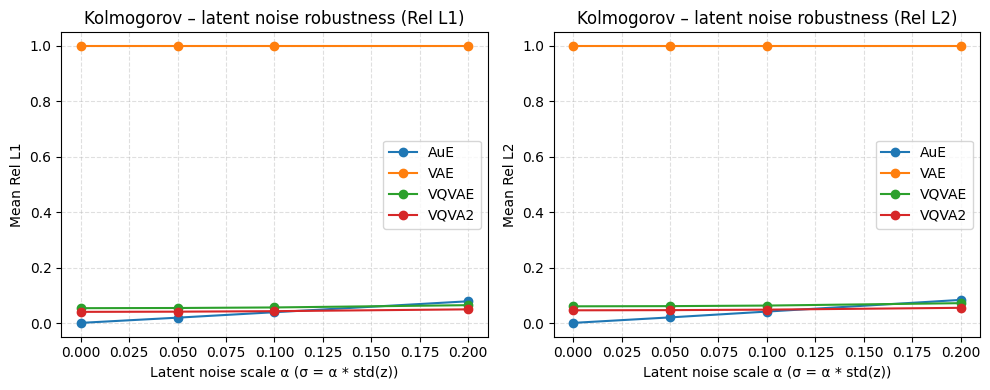

In [52]:
# Latent robustness: noise in encoder space

def latent_robustness_for_model(model_name,
                                X,
                                noise_scales=(0.0, 0.05, 0.1, 0.2),
                                batch_size=16):
    """
    X : torch tensor (N,1,128,128) on CPU, already scaled by DATA_SCALE.
    noise_scales: list of α; actual noise std = α * std(z_flat).
    Returns:
        dict with noise_scales -> (mean_relL1, mean_relL2)
    """
    print(f"\n=== Latent robustness – {model_name} ===")
    model = load_best_kolm_model(model_name)

    # 1) Encode full test set into latent Z
    model.eval()
    N = X.shape[0]
    z_list = []

    with torch.no_grad():
        for i in range(0, N, batch_size):
            xb = X[i:i+batch_size].to(device)
            z = encode_kolm_batch(model_name, model, xb)   # (B,C,H,W)
            z_list.append(z.cpu())

    Z = torch.cat(z_list, dim=0)   # (N, C, H, W)
    print("Latent Z shape:", Z.shape)

    # base stats
    z_flat = Z.view(Z.size(0), -1)
    z_std = z_flat.std().item()
    print(f"Global latent std: {z_std:.4e}")

    # 2) For each noise scale, add noise and decode
    metrics = {}
    X_ref = X.to(device)

    for alpha in noise_scales:
        sigma = alpha * z_std
        print(f"  Noise scale α = {alpha:.3f} → σ = {sigma:.4e}")

        relL1_all, relL2_all = [], []

        with torch.no_grad():
            for i in range(0, N, batch_size):
                z_batch = Z[i:i+batch_size].to(device)
                xb_ref  = X_ref[i:i+batch_size]

                if sigma > 0.0:
                    noise = torch.randn_like(z_batch) * sigma
                    z_noisy = z_batch + noise
                else:
                    z_noisy = z_batch

                xhat = decode_kolm_batch(model_name, model, z_noisy)  # (B,1,128,128)

                r1, r2 = rel_errors(xhat, xb_ref)
                relL1_all.append(r1.cpu())
                relL2_all.append(r2.cpu())

        relL1_mean = torch.cat(relL1_all).mean().item()
        relL2_mean = torch.cat(relL2_all).mean().item()
        metrics[alpha] = (relL1_mean, relL2_mean)
        print(f"    -> RelL1={relL1_mean:.6f}, RelL2={relL2_mean:.6f}")

    return metrics


# ---- Run for all four models ----
noise_scales = (0.0, 0.05, 0.1, 0.2)
latent_robustness_results = {}

for name in ["AuE", "VAE", "VQVAE", "VQVA2"]:
    latent_robustness_results[name] = latent_robustness_for_model(
        name,
        X_TEST,
        noise_scales=noise_scales,
        batch_size=16,
    )


print("\n=== Latent robustness summary (RelL1 / RelL2) ===")
header = "Model".ljust(8) + " | " + "  ".join(
    [f"α={a:0.2f}".ljust(20) for a in noise_scales]
)
print(header)
print("-" * len(header))

for name in ["AuE", "VAE", "VQVAE", "VQVA2"]:
    row = name.ljust(8) + " | "
    for a in noise_scales:
        r1, r2 = latent_robustness_results[name][a]
        row += f"L1={r1:.4f},L2={r2:.4f}  ".ljust(20)
    print(row)


alphas = list(noise_scales)

plt.figure(figsize=(10, 4))

# RelL1
plt.subplot(1, 2, 1)
for name in ["AuE", "VAE", "VQVAE", "VQVA2"]:
    vals = [latent_robustness_results[name][a][0] for a in alphas]
    plt.plot(alphas, vals, marker="o", label=name)
plt.xlabel("Latent noise scale α (σ = α * std(z))")
plt.ylabel("Mean Rel L1")
plt.title("Kolmogorov – latent noise robustness (Rel L1)")
plt.grid(True, which="both", linestyle="--", alpha=0.4)
plt.legend()

# RelL2
plt.subplot(1, 2, 2)
for name in ["AuE", "VAE", "VQVAE", "VQVA2"]:
    vals = [latent_robustness_results[name][a][1] for a in alphas]
    plt.plot(alphas, vals, marker="o", label=name)
plt.xlabel("Latent noise scale α (σ = α * std(z))")
plt.ylabel("Mean Rel L2")
plt.title("Kolmogorov – latent noise robustness (Rel L2)")
plt.grid(True, which="both", linestyle="--", alpha=0.4)
plt.legend()

plt.tight_layout()
plt.show()

/tmp/ipython-input-3739832141.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.86, 1])


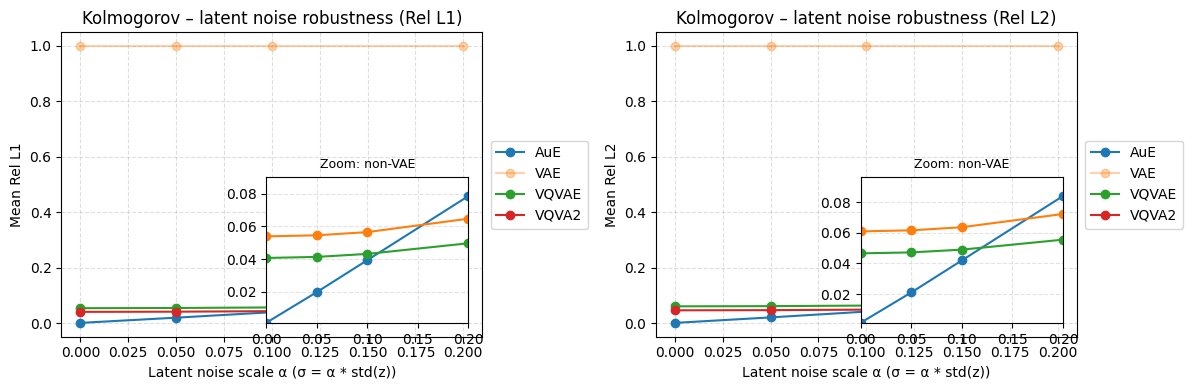

In [55]:
# Zoom version of plot (Latent robustness: noise in encoder space)
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

alphas = list(noise_scales)
models_all = ["AuE", "VAE", "VQVAE", "VQVA2"]
models_focus = ["AuE", "VQVAE", "VQVA2"]

def _get_vals(model, metric_idx):
    return [latent_robustness_results[model][a][metric_idx] for a in alphas]

def plot_with_zoom(metric_idx, y_label, title, ax):
    for name in models_all:
        vals = _get_vals(name, metric_idx)
        if name == "VAE":
            ax.plot_toggle = ax.plot(alphas, vals, marker="o", label=name, alpha=0.35, linewidth=1.5)
        else:
            ax.plot(alphas, vals, marker="o", label=name)

    ax.set_xlabel("Latent noise scale α (σ = α * std(z))")
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.grid(True, which="both", linestyle="--", alpha=0.4)

    ax.legend(loc="center left", bbox_to_anchor=(1.02, 0.5), borderaxespad=0.0)

    zax = inset_axes(ax, width="48%", height="48%", loc="lower right", borderpad=1.0)

    focus_vals = np.array([_get_vals(m, metric_idx) for m in models_focus]).ravel()
    y_min = max(0.0, float(focus_vals.min()) * 0.90)
    y_max = float(focus_vals.max()) * 1.15
    if y_max <= y_min:
        y_max = y_min + 1e-6

    for name in models_focus:
        zax.plot(alphas, _get_vals(name, metric_idx), marker="o")

    zax.set_xlim(min(alphas), max(alphas))
    zax.set_ylim(y_min, y_max)
    zax.grid(True, linestyle="--", alpha=0.35)
    zax.set_title("Zoom: non-VAE", fontsize=9)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
plot_with_zoom(0, "Mean Rel L1", "Kolmogorov – latent noise robustness (Rel L1)", ax1)
plot_with_zoom(1, "Mean Rel L2", "Kolmogorov – latent noise robustness (Rel L2)", ax2)

plt.tight_layout(rect=[0, 0, 0.86, 1])
plt.show()
